## Convenciones

Agregar las descripciones de las variables (a usar)

In [1]:
#Librerías para manejo de datos
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Otras librerías
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import scipy.stats as st

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Opcion 3 de item 1b
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

#Item 1d
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
plt.rcParams["figure.figsize"] = (24,14)
plt.rcParams.update({'font.size': 18})
df = pd.read_csv("/work/properati_argentina_2021.csv")

In [3]:
df.head(10)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell
5,F9tamlHF5c8kGM6XRTsCKQ==,2021-09-09,2022-01-27,2021-09-09,-34.859680,-56.195410,Montevideo,NaN,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,54.0,54.0,189900.0,USD,Apartamento - Prado
6,NqZ7NCaGZKarCdU/V0vHfw==,2021-09-09,2021-09-14,2021-09-09,NaN,NaN,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,Venta,Casa,5.0,3.0,294.0,254.0,249000.0,USD,Casa - Los Cardales
7,gRTl4HxCqiGIwGRq0r1oag==,2021-09-09,2022-01-05,2021-09-09,NaN,NaN,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,NaN,Venta,Casa,7.0,3.0,462.0,308.0,460000.0,USD,Casa - Los Cardales
8,Y8n0DpI7wgglQ6QISaTB4g==,2021-09-09,2021-09-10,2021-09-09,-34.901935,-56.183708,Montevideo,NaN,NaN,NaN,NaN,Alquiler,Departamento,5.0,2.0,60.0,60.0,26760.0,UYU,Apartamento - Cordón
9,HMt6tiEI+xILu5W6cjGdiw==,2021-09-09,2021-10-28,2021-09-09,-34.866268,-56.092273,Montevideo,NaN,NaN,NaN,NaN,Alquiler,Casa,5.0,2.0,70.0,70.0,19000.0,UYU,Casa - Carrasco Norte


In [4]:
df.tail()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
460149,EWHC/xcODFkeEA0+pPE6Rw==,2021-01-05,2021-01-08,2021-01-05,-34.599594,-58.588715,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,113.0,113.0,190000.0,USD,LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-
460150,txKUq0LjMaORjJQeeqTOfw==,2021-01-05,2021-11-01,2021-01-05,-34.582777,-58.545220,Bs.As. G.B.A. Zona Norte,General San Martín,Villa Lynch,NaN,NaN,Venta,Local comercial,NaN,NaN,11580.0,11580.0,3500000.0,USD,Nave Industrial - Villa Lynch
460151,E0zwHT18DX8AxhU22hXgng==,2021-01-05,2021-03-01,2021-01-05,NaN,NaN,Bs.As. G.B.A. Zona Norte,General San Martín,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,915.0,915.0,800000.0,USD,importante edificio comercial en tres plantas ...
460152,Ec4Tvy/WX5f6RgfaJf2FHQ==,2021-01-05,2021-11-28,2021-01-05,-33.226234,-60.331848,Santa Fe,Villa Constitución,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,NaN,15.0,NaN,NaN,Local - Villa Constitucion
460153,Y7KBafQ+e5noGh2Pio0xLg==,2021-01-05,9999-12-31,2021-01-05,-26.827938,-65.220708,Tucumán,San Miguel de Tucumán,NaN,NaN,NaN,Venta,Local comercial,1.0,NaN,243.0,133.0,160000.0,USD,Local - San Miguel De Tucumán


## Selección de datos

##### Removemos columnas que estamos seguros de que no se van a utilizar

In [5]:
df.drop(['id', 'start_date', 'end_date', 'created_on'], axis=1, inplace=True)

##### Filtramos la ubicación para quedarnos con las ubicaciones que están en Capital Federal únicamente

In [6]:
df_filtrado = df.query("place_l2 == 'Capital Federal'")

##### Verificamos que efectivamente exista solo Capital Federal

In [7]:
df_filtrado['place_l2'].unique()

array(['Capital Federal'], dtype=object)

##### Filtramos property_type por vivienda: Casa, Depto y PH

In [8]:
df_filtrado = df_filtrado.query("property_type == 'Casa' or property_type == 'PH' or property_type == 'Departamento'")
df_filtrado.property_type.unique()

array(['Casa', 'Departamento', 'PH'], dtype=object)

In [9]:
pd.crosstab(index=df_filtrado['property_type'], columns=df_filtrado['property_currency'], margins=True)

property_currency,ARS,USD,All
property_type,,,
Casa,281,4339,4620
Departamento,29485,86709,116194
PH,1140,9354,10494
All,30906,100402,131308


##### Filtramos por tipo de operación: venta

In [10]:
df_filtrado = df_filtrado.query("operation == 'Venta'")
df_filtrado['operation'].value_counts()

Venta    95543
Name: operation, dtype: int64

##### Filtramos y nos quedamos con las propiedades que tienen el precio en dólares

In [11]:
df_filtrado = df_filtrado[df_filtrado['property_currency'] == "USD"]
df_filtrado.property_currency.unique()

array(['USD'], dtype=object)

##### Luego de filtrar por tipo de operación y moneda, podemos eliminar estas columnas ya que tendrán un único valor

In [12]:
df_filtrado.drop(['operation', 'property_currency'], axis=1, inplace=True)

##### Dado que no hay información respecto a las columnas l5 y l6, revisamos que tipo de datos tienen

In [13]:
df_filtrado["place_l5"].value_counts()

Series([], Name: place_l5, dtype: int64)

In [14]:
df_filtrado["place_l6"].value_counts()

Series([], Name: place_l6, dtype: int64)

##### Como vemos que ambas columnas están vacías, podemos dropearlas del dataframe

In [15]:
#Hacemos la limpieza de todos los place_lx que no vamos a utilizar. Agregamos place_l2 dado que es en todos los casos Capital Federal
df_filtrado.drop(['place_l2', 'place_l5', 'place_l6'], axis=1, inplace=True)

##### Removemos registros duplicados

In [16]:
size_antes = len(df_filtrado)
df_filtrado = df_filtrado.drop_duplicates()
size_despues = len(df_filtrado)
print(f'Se eliminaron: {size_antes-size_despues} filas duplicadas')

Se eliminaron: 11270 filas duplicadas


In [17]:
#Reseteamos los indices
df_filtrado.reset_index(drop=True, inplace=True)

In [18]:
#Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).
df_train, df_test = train_test_split(df_filtrado,
                                     test_size=0.2, # proporcion 80/20
                                     random_state=2) #semilla random

## Ejercicio 1a: exploración inicial

### Tipo de variable

In [19]:
df_filtrado.dtypes

latitud                     float64
longitud                    float64
place_l3                     object
place_l4                     object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_title               object
dtype: object

### Variables Cuantitativas

In [20]:
#variables cuantitativas, media
df_filtrado.mean()

latitud                        -34.591415
longitud                       -58.451345
property_rooms                   2.812947
property_bedrooms                2.010473
property_surface_total         107.124794
property_surface_covered        87.755494
property_price              214555.131588
dtype: float64

In [21]:
# variables cuantitativas, mediana
df_filtrado.median()

latitud                        -34.596207
longitud                       -58.439400
property_rooms                   3.000000
property_bedrooms                2.000000
property_surface_total          65.000000
property_surface_covered        57.000000
property_price              140000.000000
dtype: float64

In [22]:
# variables cuantitativas, q1
df_filtrado.quantile(0.25)

latitud                       -34.616561
longitud                      -58.466969
property_rooms                  2.000000
property_bedrooms               1.000000
property_surface_total         45.000000
property_surface_covered       40.000000
property_price              95000.000000
Name: 0.25, dtype: float64

In [23]:
# variables cuantitativas, q3
df_filtrado.quantile(0.75)

latitud                        -34.577595
longitud                       -58.409168
property_rooms                   4.000000
property_bedrooms                3.000000
property_surface_total         103.000000
property_surface_covered        87.000000
property_price              230000.000000
Name: 0.75, dtype: float64

In [24]:
# variables cuantitativas, moda
df_filtrado.mode()

,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.604538,-58.424956,Palermo,Palermo Hollywood,Departamento,3.0,1.0,50.0,40.0,110000.0,Departamento - Palermo


### Variables Cualitativas: cantidad de valores posibles, y frecuencias de cada uno.

Análisis de la variable place_l3 (ciudades) como un gráfico de barras, comparando su frecuencia

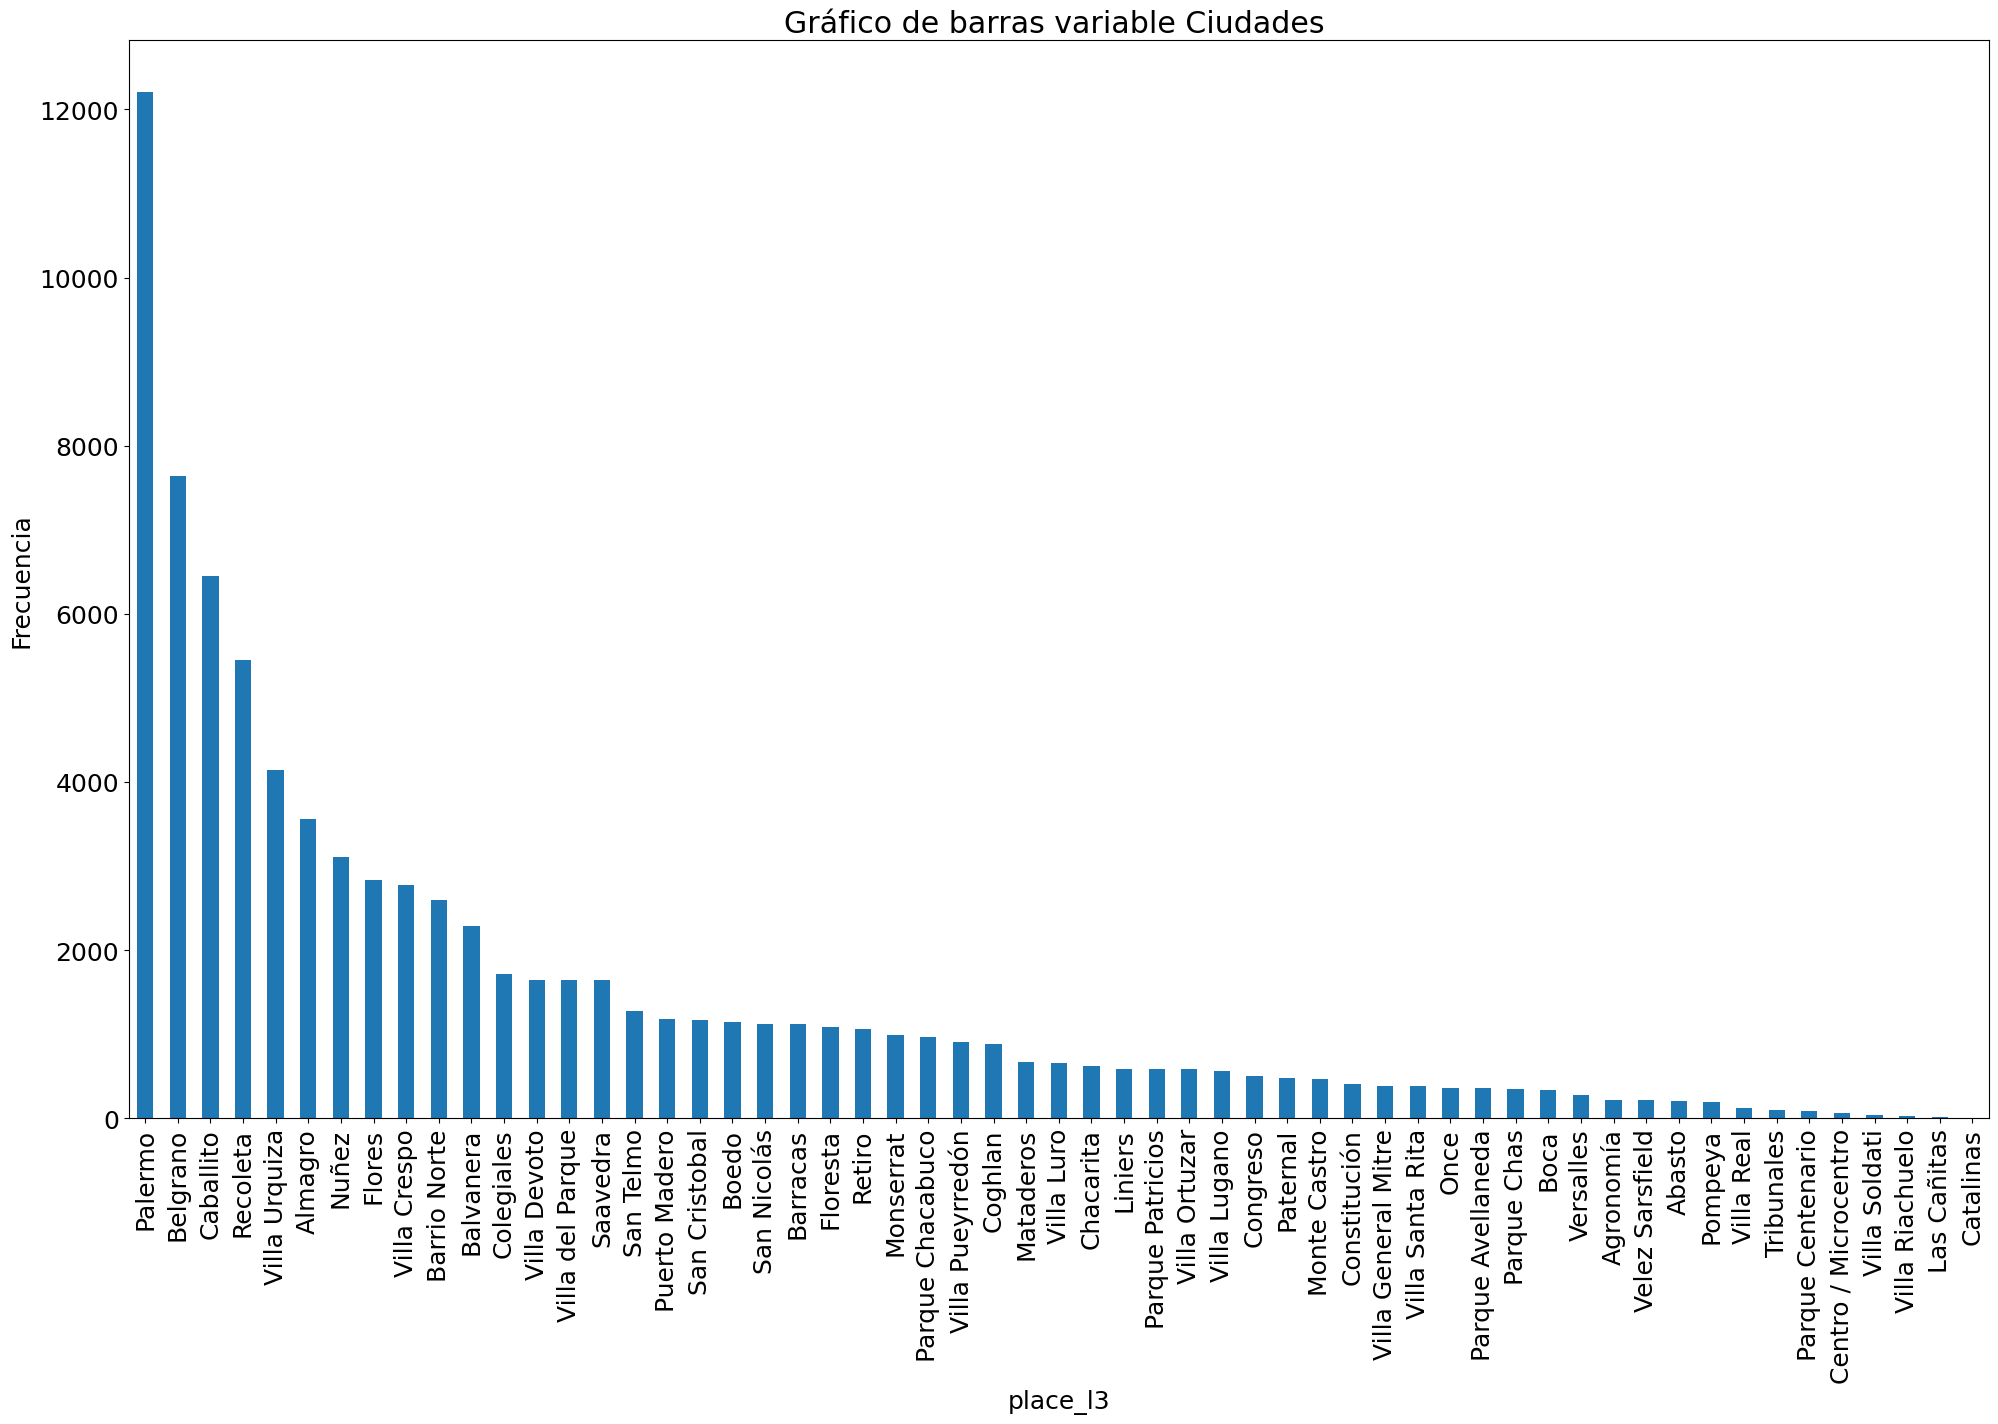

In [25]:
grafico_ciudades = df_filtrado['place_l3'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras variable Ciudades " , xlabel="place_l3" , ylabel="Frecuencia") 

Gráfico de barras de los barrios, agrupando los barrios menos frecuentes (desde el 5) como "Otros".

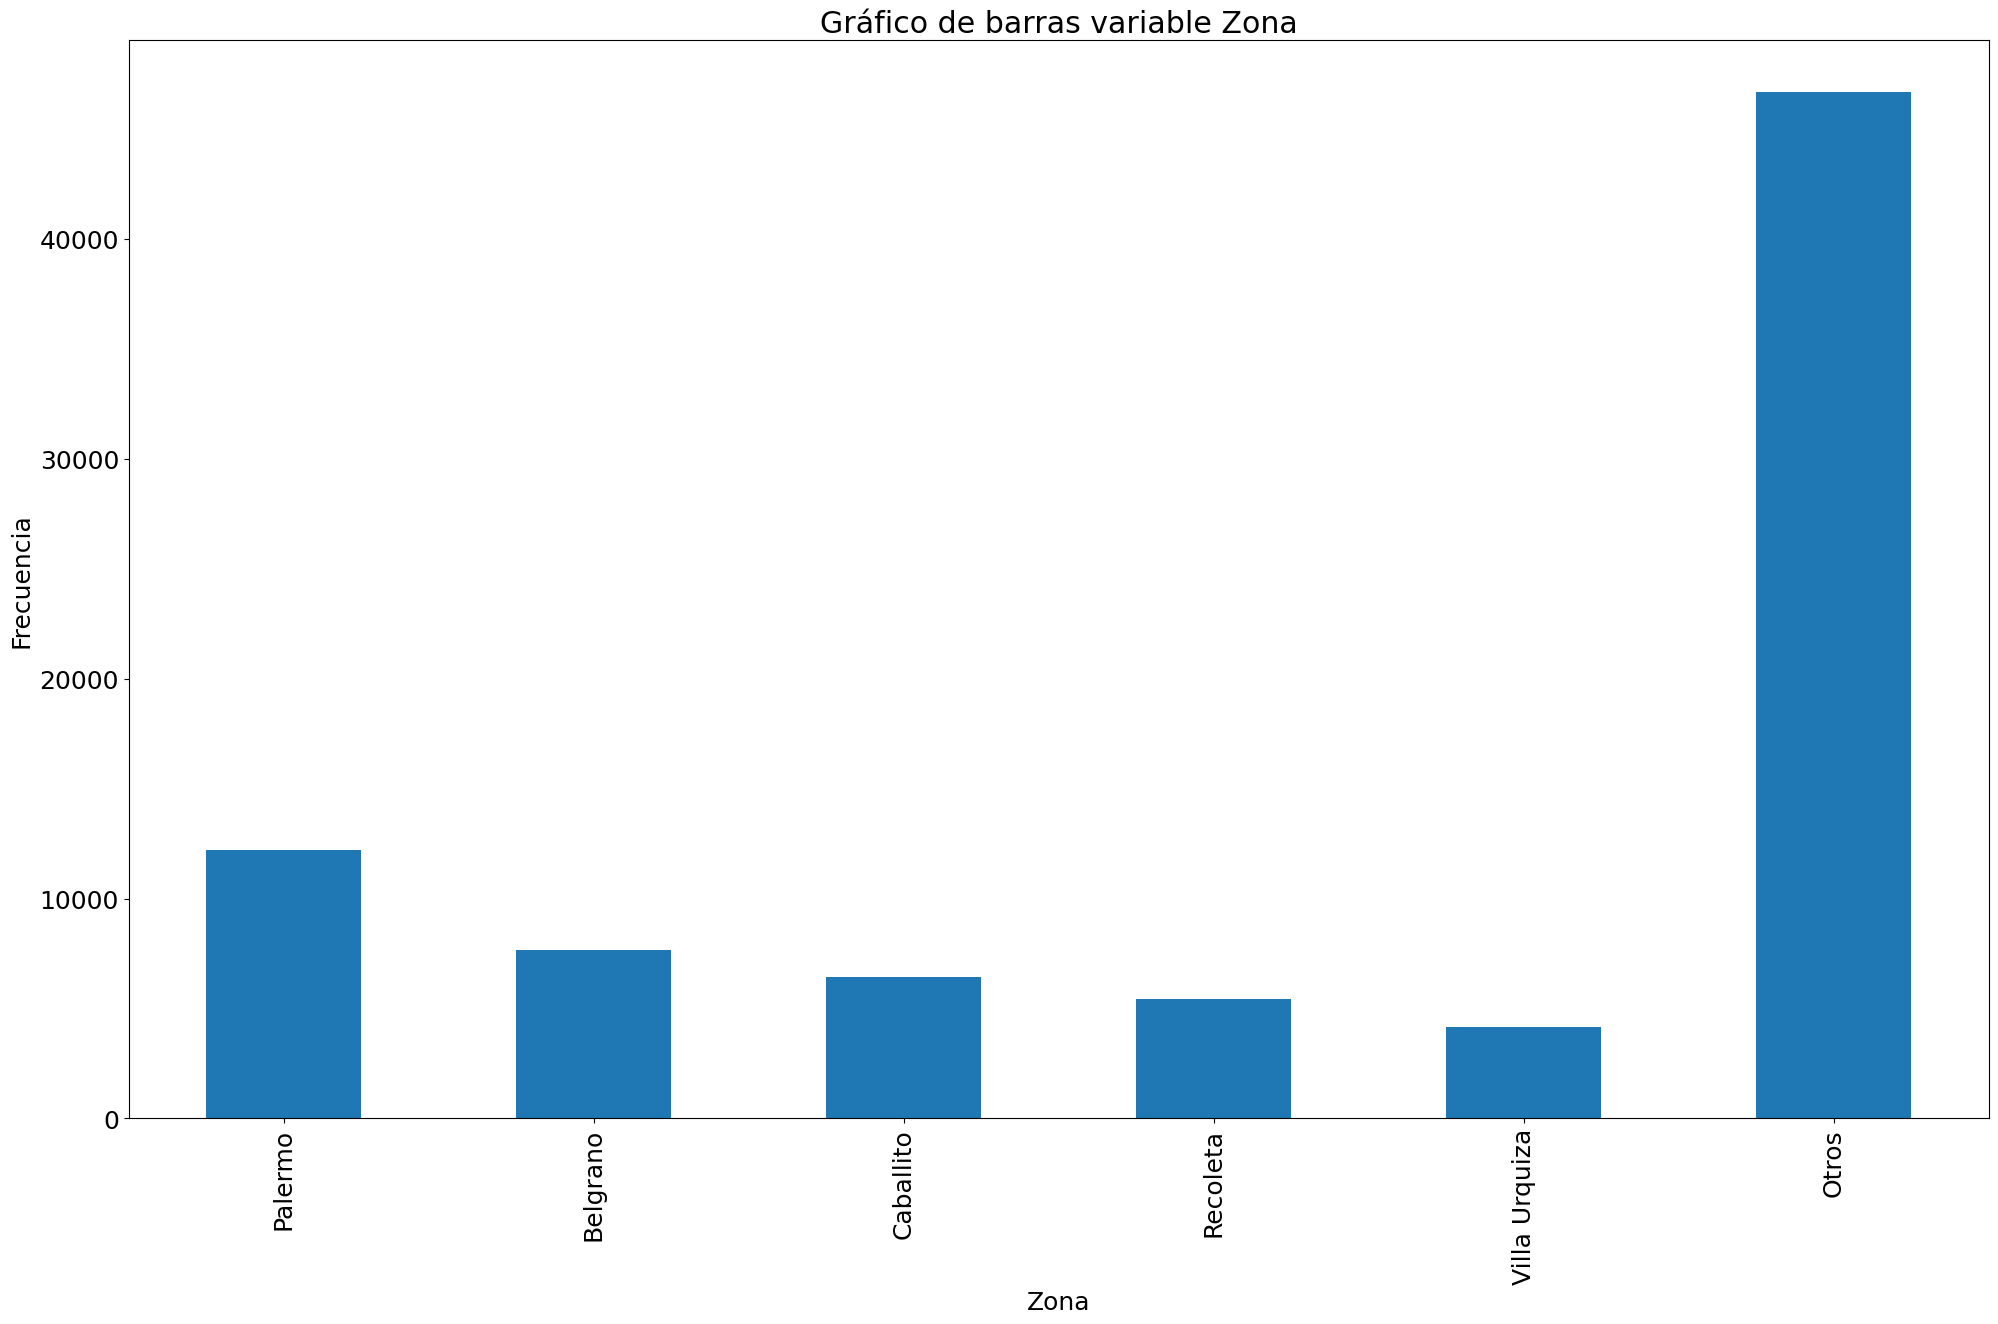

In [26]:
datos_ciudades = df_filtrado['place_l3'].value_counts()[:5]
datos_ciudades['Otros'] = df_filtrado['place_l3'].value_counts()[5:].sum()
grafico_ciudades = datos_ciudades.plot.bar(alpha=1 , title="Gráfico de barras variable Zona" , xlabel="Zona" , ylabel="Frecuencia") 

In [27]:
df_filtrado["place_l4"].value_counts()

Palermo Hollywood    1310
Palermo Chico         831
Palermo Soho          704
Palermo Viejo         120
Name: place_l4, dtype: int64

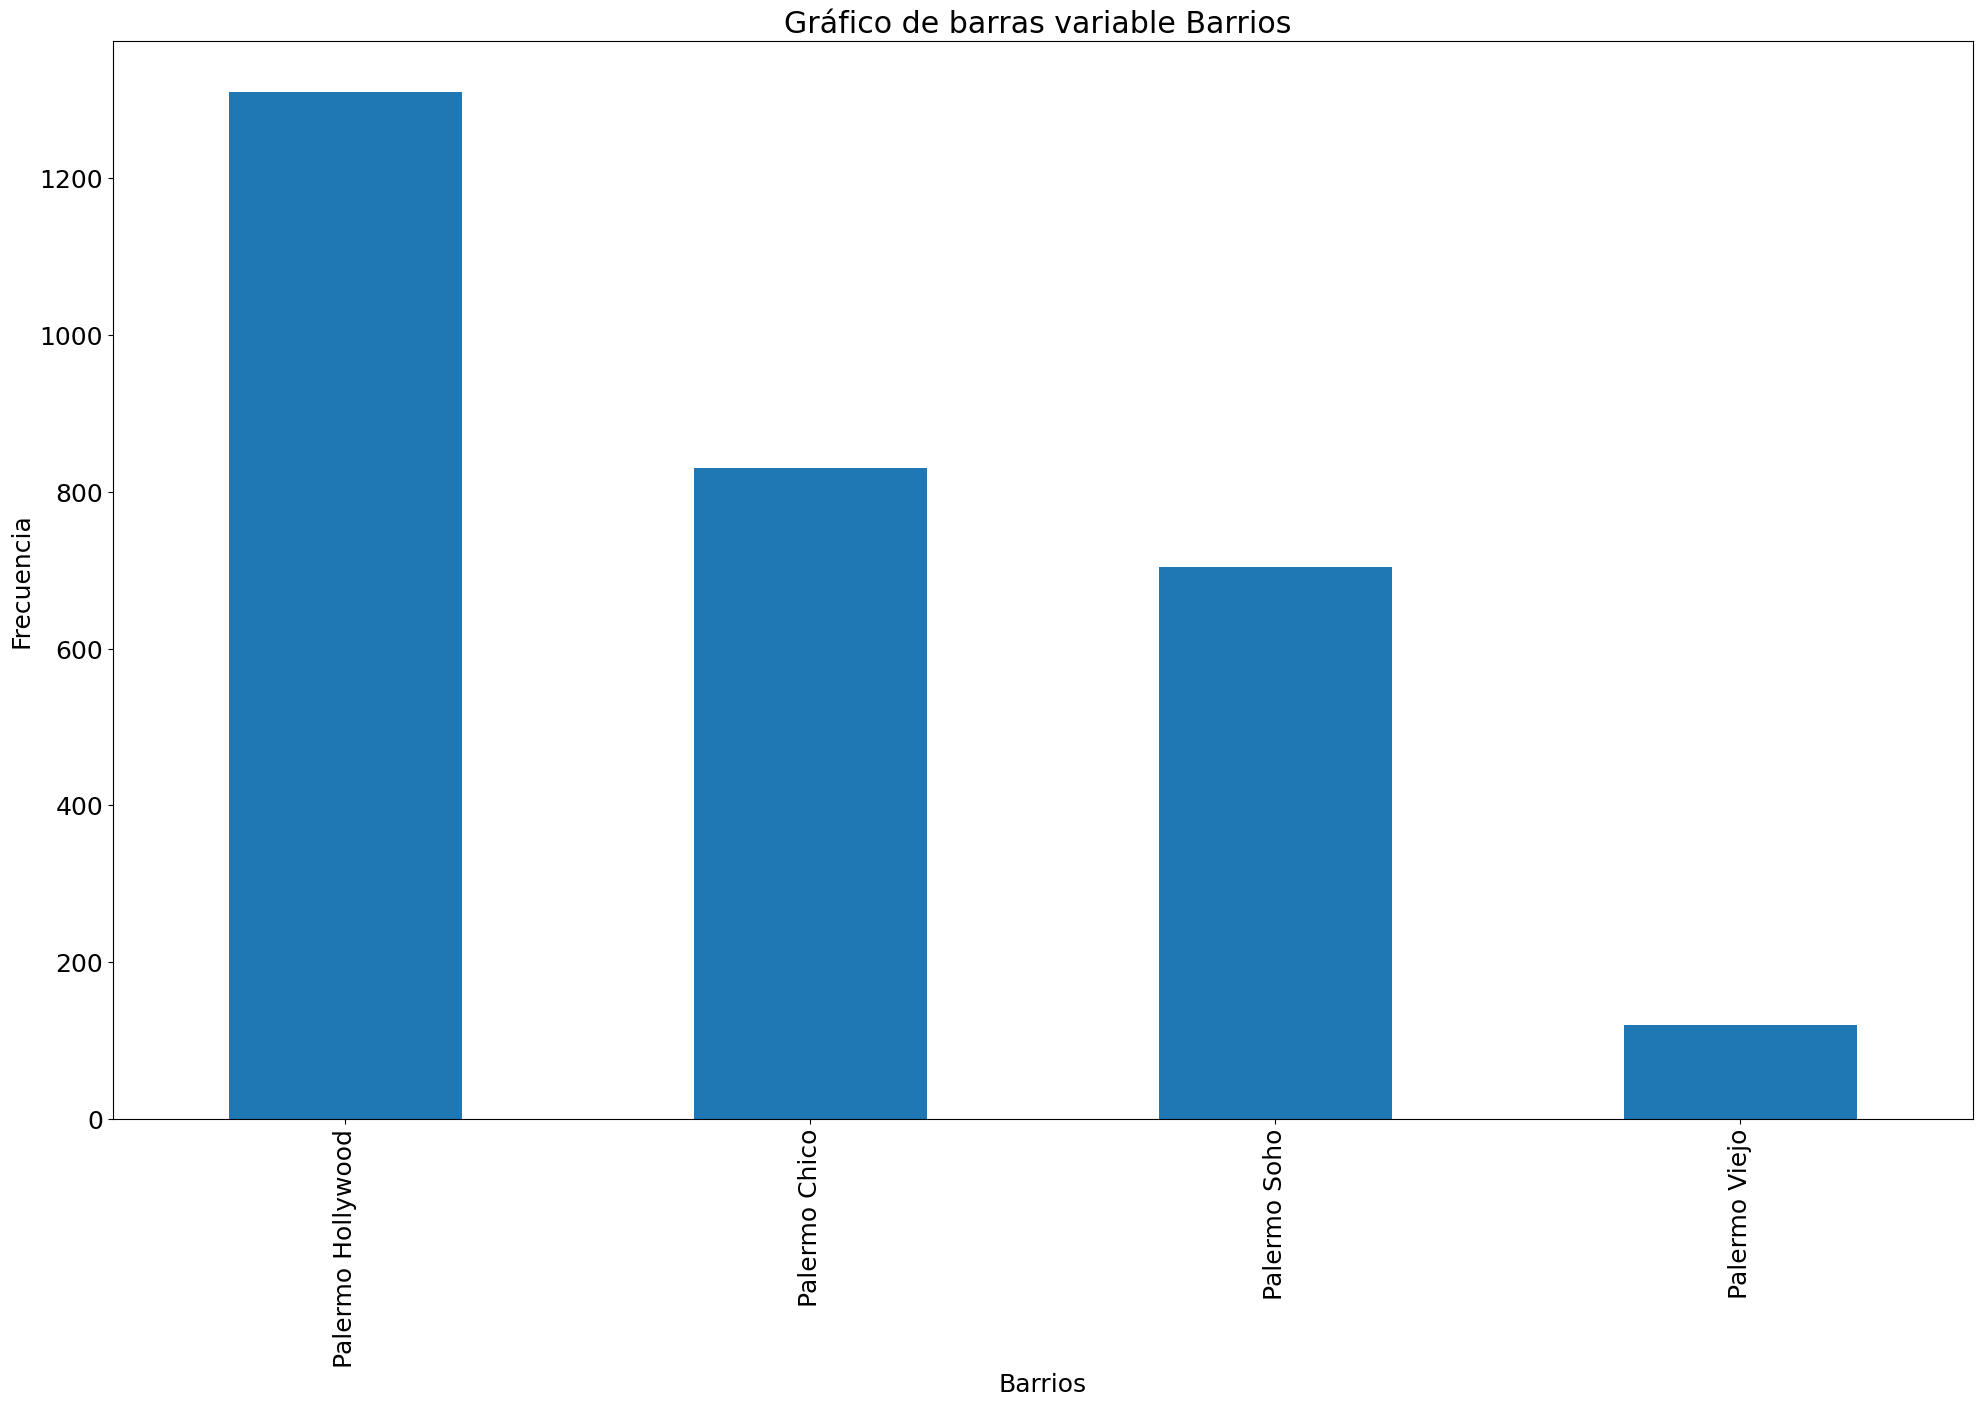

In [28]:
grafico_barrios = df_filtrado['place_l4'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras variable Barrios " , xlabel="Barrios" , ylabel="Frecuencia") 

In [29]:
df_filtrado["property_type"].value_counts()

Departamento    70777
PH               8425
Casa             3777
Name: property_type, dtype: int64

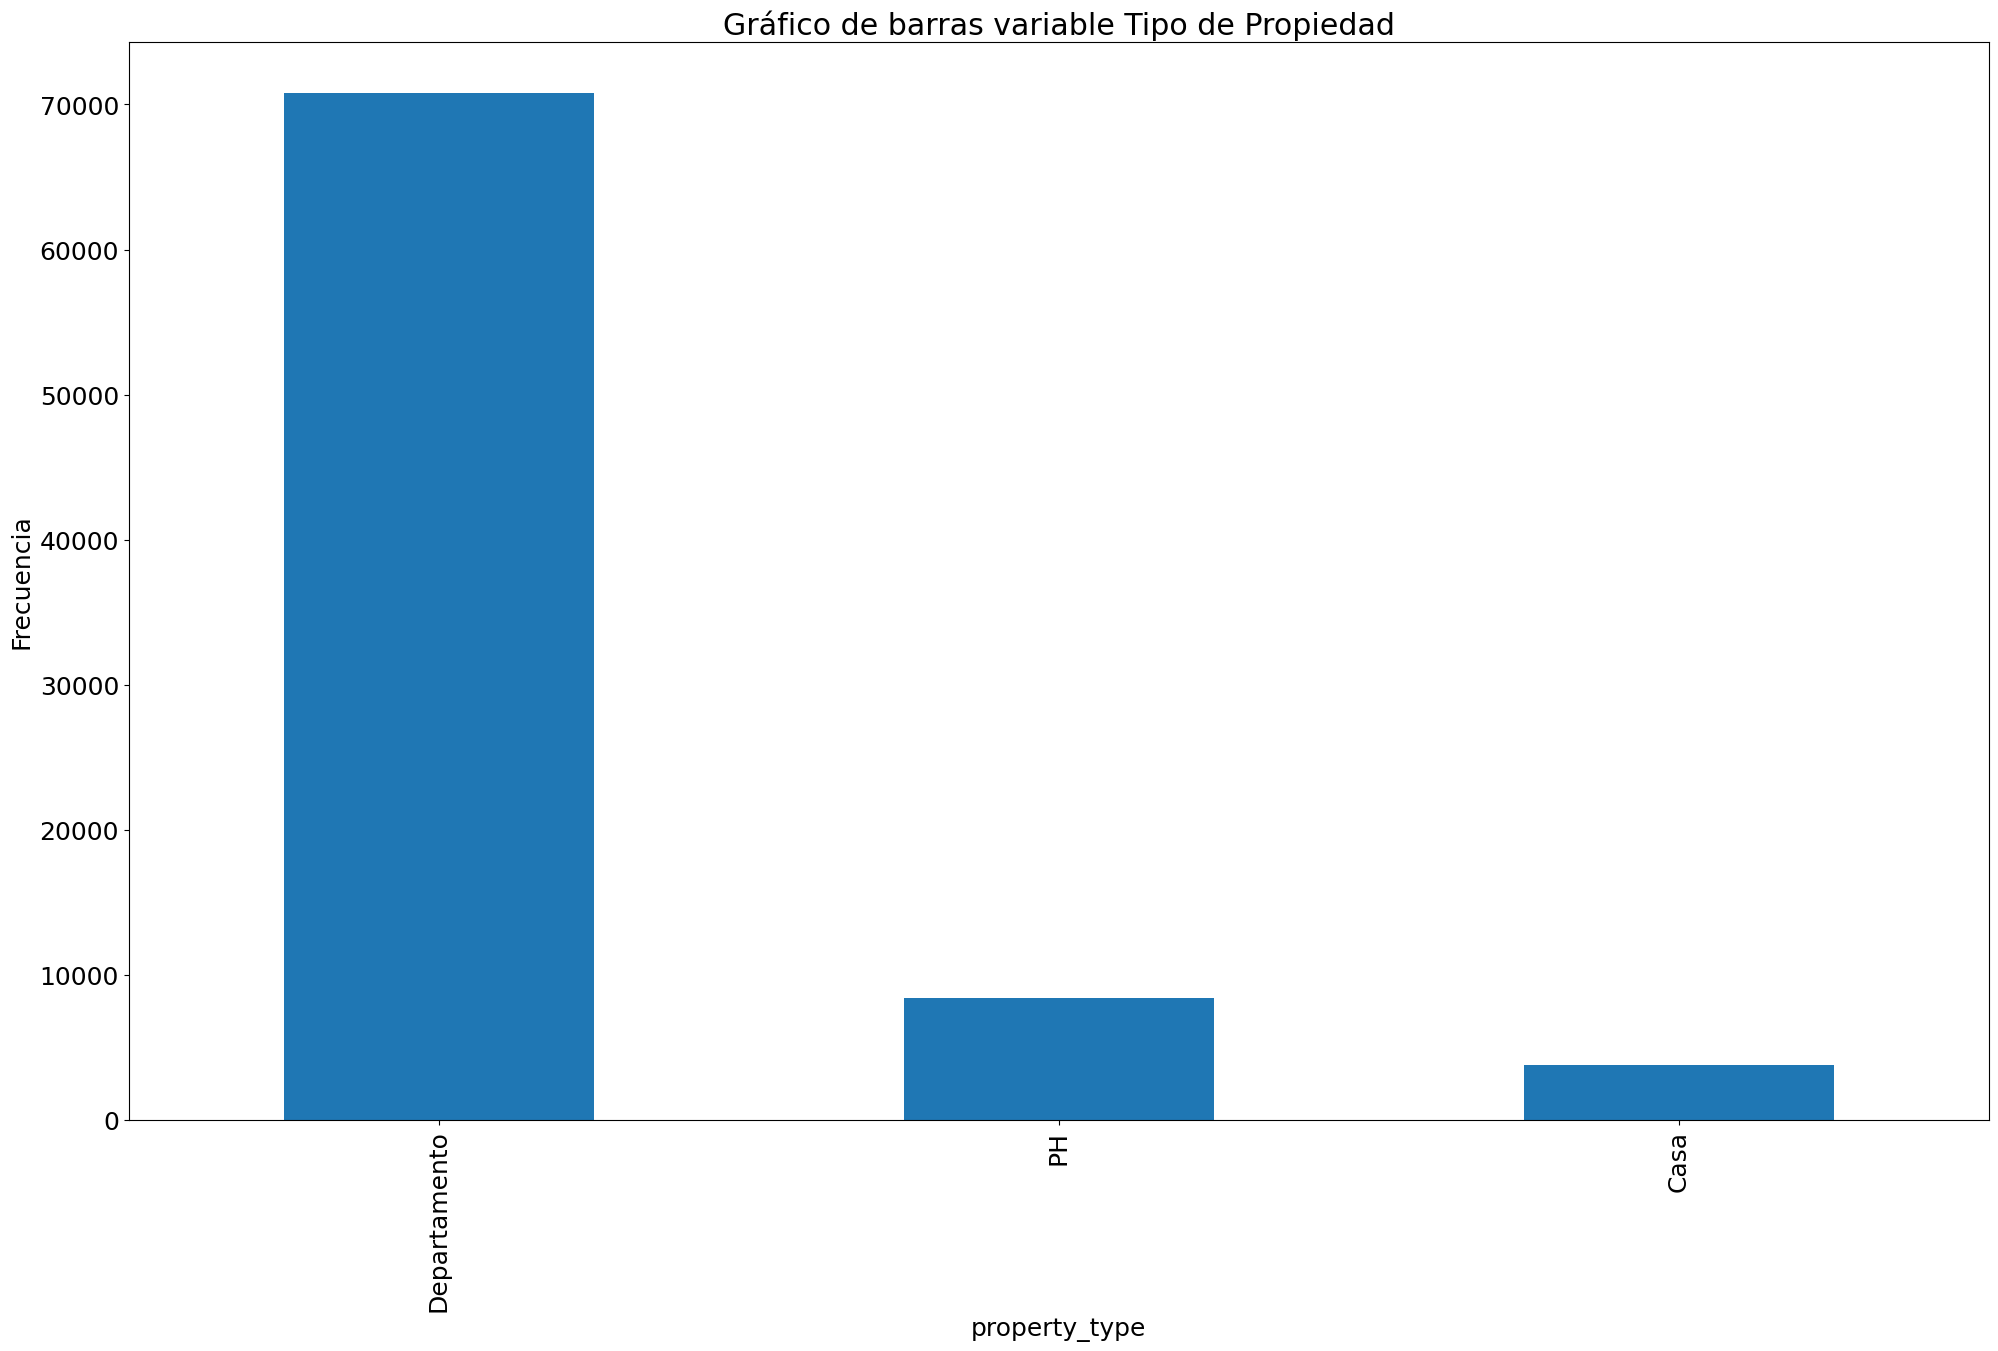

In [30]:
grafico_propiedades = df_filtrado['property_type'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras variable Tipo de Propiedad" , xlabel="property_type" , ylabel="Frecuencia") 

In [31]:
df_filtrado["property_title"].value_counts()

Departamento - Palermo                                1169
Departamento - Recoleta                               1149
Departamento - Belgrano                               1006
Departamento - Caballito                               837
Departamento - Barrio Norte                            554
                                                      ... 
3 Ambientes con Amplio Balcòn Vista Abierta              1
Venta Departamento 2 Amb. Barracas                       1
4 AMB. C/DEP PB FONDO PARQUIZADO Y QUINCHO LINIERS       1
DEPARTAMENTO 3 AMB EN VENTA EN PATERNAL AL FRENTE        1
VENTA DEPARTAMENTO 3 AMBIENTES - CONGRESO                1
Name: property_title, Length: 55704, dtype: int64

In [32]:
df_filtrado["property_title"].value_counts().size

55704

Se observa que hay 55784 diferentes títulos publicados, por lo que se mostrarán los 9 más frecuentes y los demás serán agrupados como otros

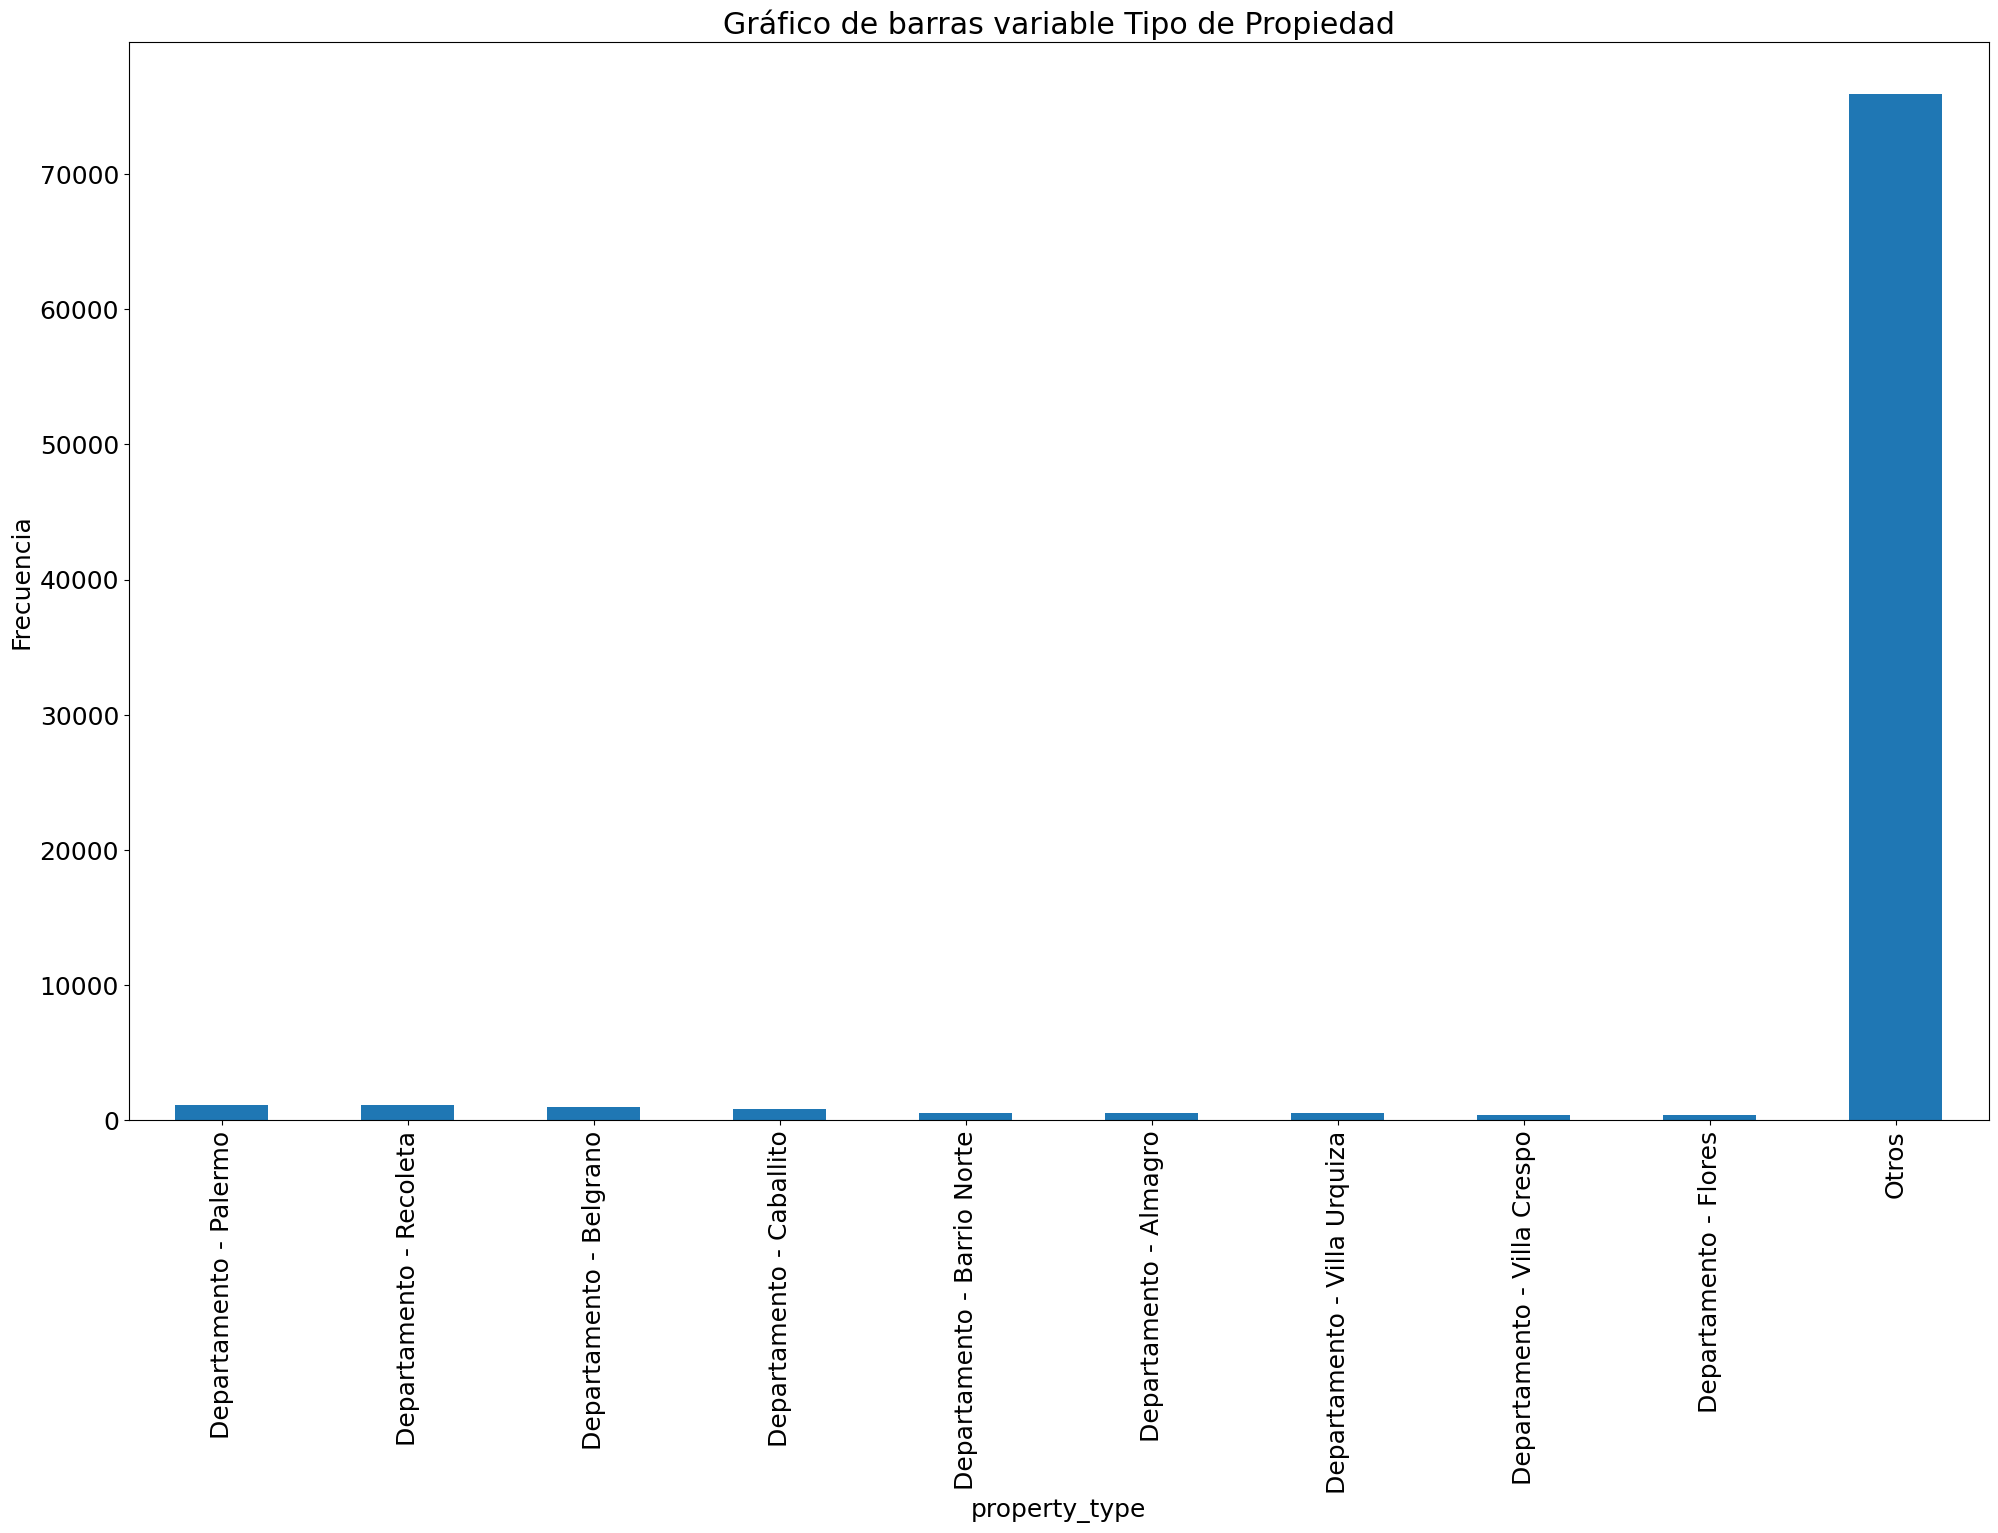

In [33]:
titulo_propiedades = df_filtrado['property_title'].value_counts()[:9]
titulo_propiedades['Otros'] = df_filtrado['property_title'].value_counts()[10:].sum()
grafico_titulo_propiedades = titulo_propiedades.plot.bar(alpha=1 , title="Gráfico de barras variable Tipo de Propiedad" , xlabel="property_type" , ylabel="Frecuencia") 

### Realizar un análisis gráfico de las distribuciones de las variables

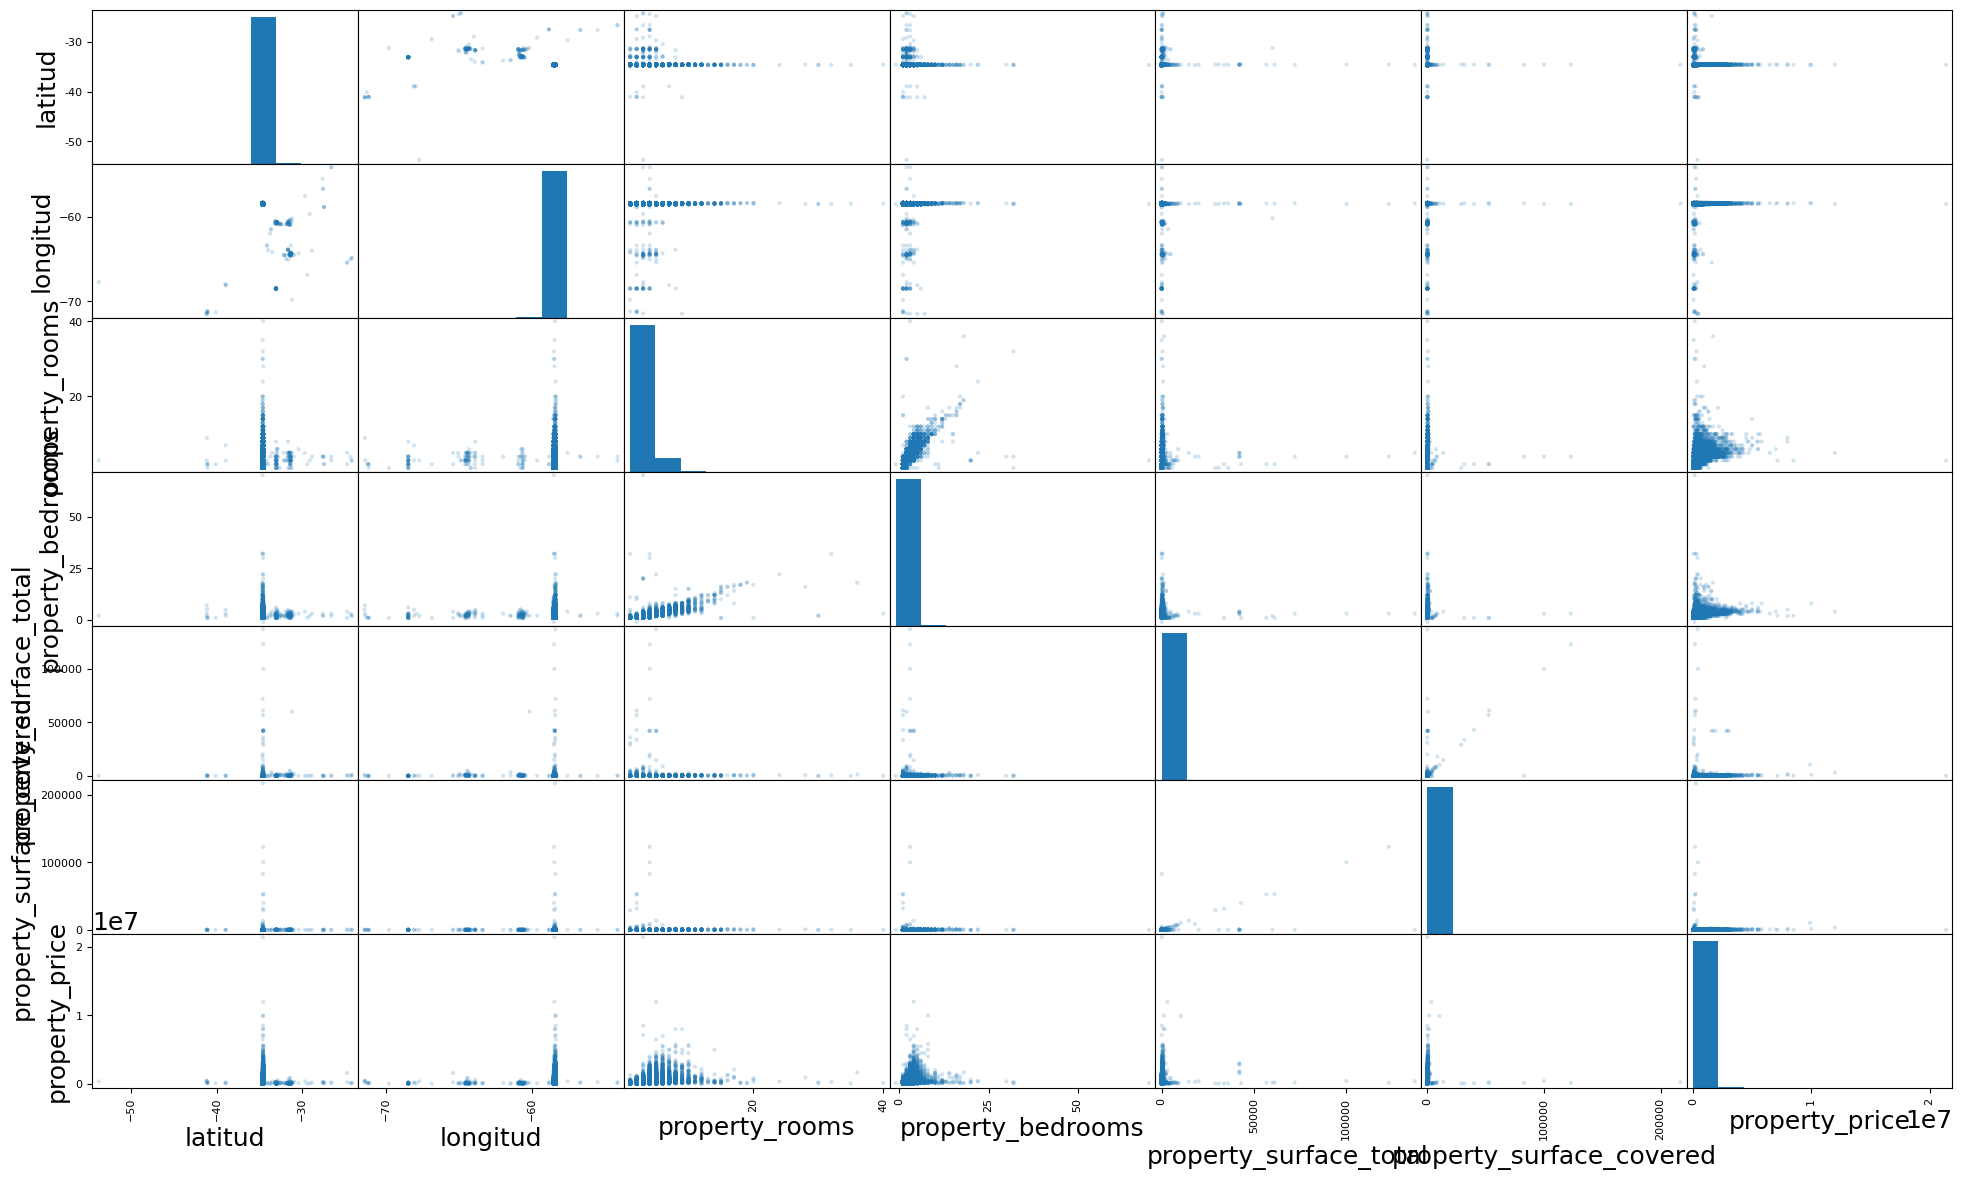

In [34]:
columns=df_filtrado.columns.tolist()
ds_scatter_matrix=df_filtrado[columns].copy()
scatter_matrix(ds_scatter_matrix, alpha=0.2);

### Analizar las correlaciones existentes entre las variables

Para el análisis de las correlaciones entre variables, se optó por el uso de la matriz de correlación. Además de un heatmap complementario con dichos valores, que es más atractivo visualmente dado que los colores permiten a simple vista ver las mayores correlaciones.

In [35]:
df_filtrado.drop(['latitud', 'longitud'],axis=1).corr()

,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
property_rooms,1.000000,0.867578,0.066408,0.068980,0.478752
property_bedrooms,0.867578,1.000000,0.062602,0.067832,0.429152
property_surface_total,0.066408,0.062602,1.000000,0.629900,0.083683
property_surface_covered,0.068980,0.067832,0.629900,1.000000,0.050081
property_price,0.478752,0.429152,0.083683,0.050081,1.000000


<AxesSubplot:>

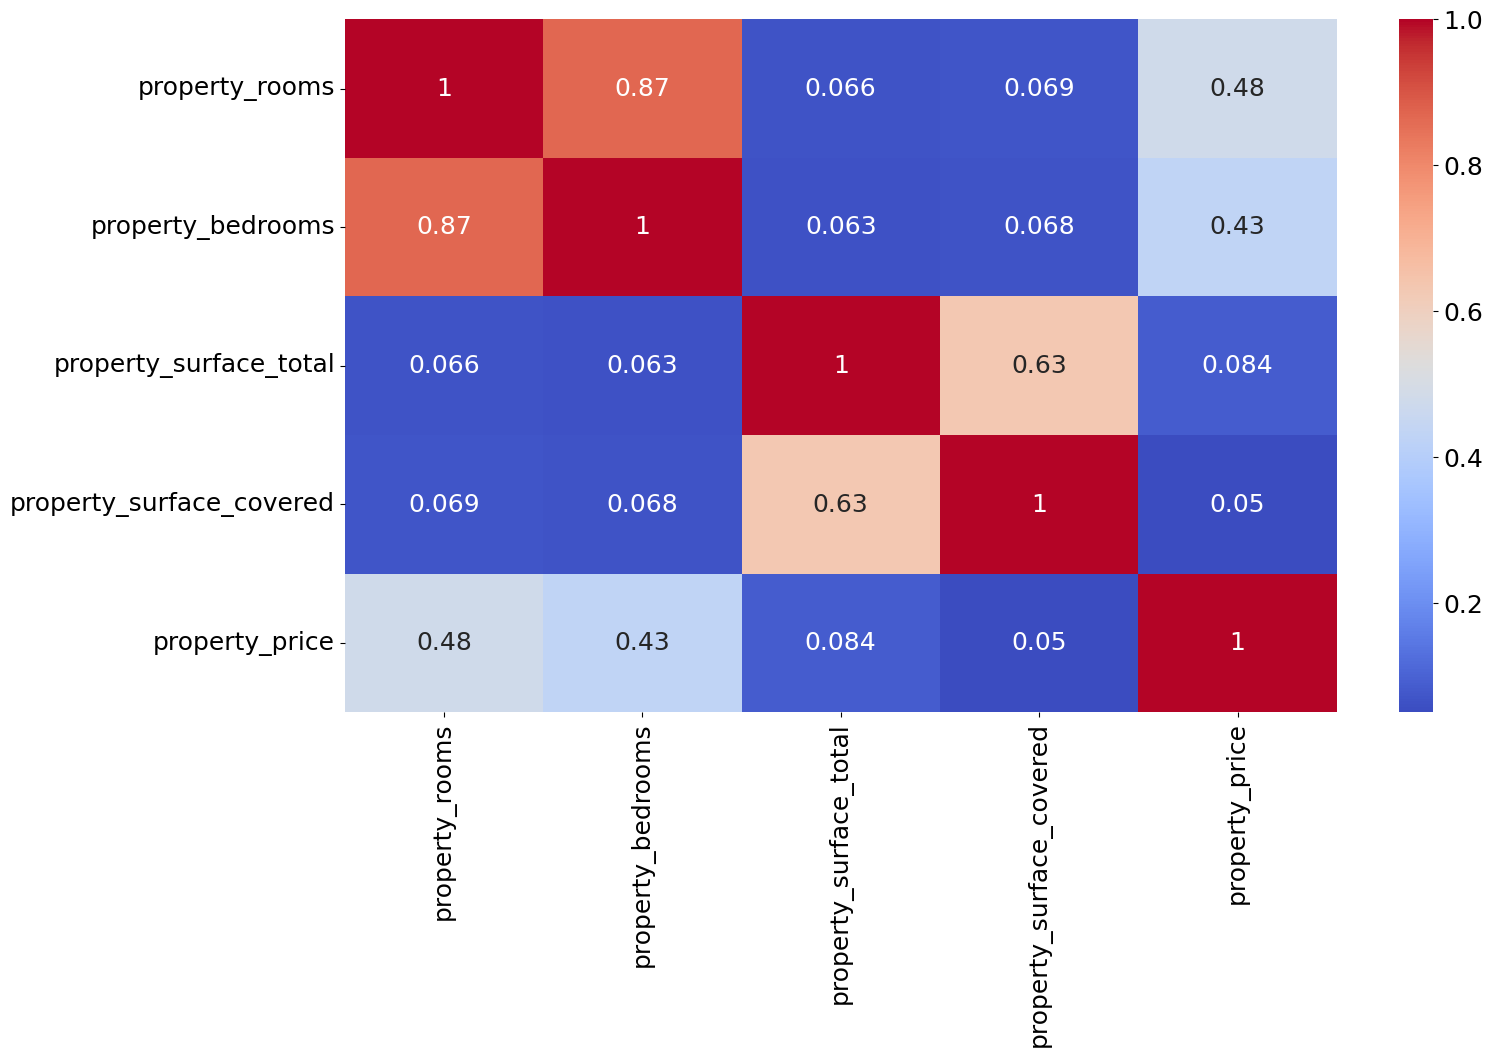

In [36]:

plt.figure(figsize = (16,9))
sns.heatmap(df_filtrado.drop(['latitud', 'longitud'], axis=1).corr(), annot = True, cmap='coolwarm')

Se observa que hay una fuerte relacion entre la cantidad de habitaciones y ambientes disponibles en una propiedad. Asi como tambien, como es predecible, la superficie cubierta, y la total cubierta estan relacionadas entre si, aunque no tanto como en la relacion entre habitaciones y ambientes.

### Conclusiones sobre los datos

En conclusión de las variables cualitativas la mayor frecuencia de inmobiliario en venta son departamentos, mayormente ubicados en Palermo, dentro del barrio Palermo Hollywood.


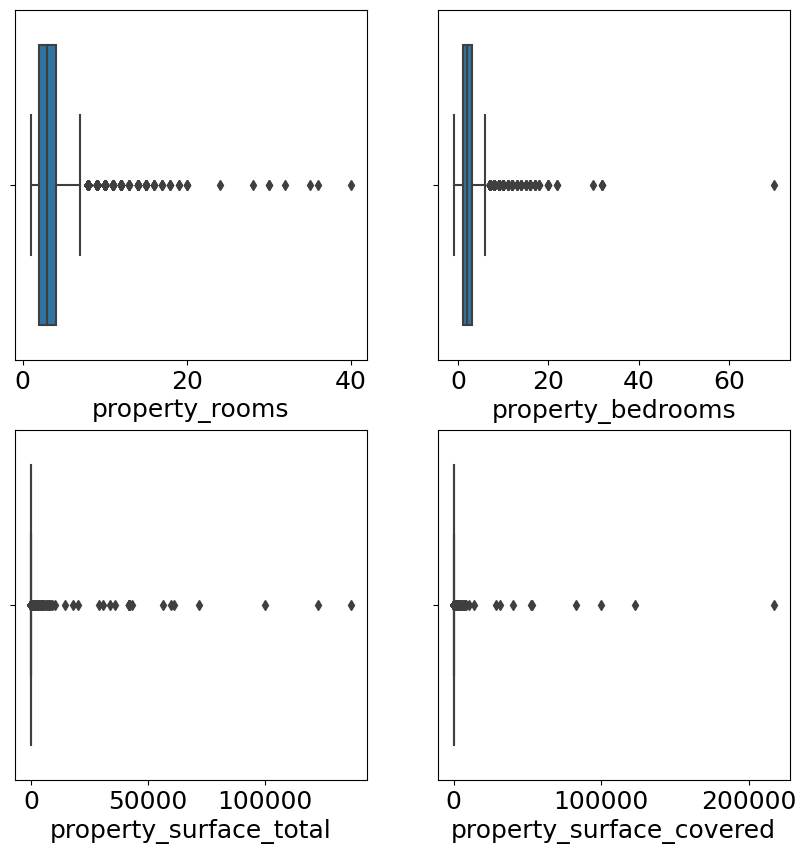

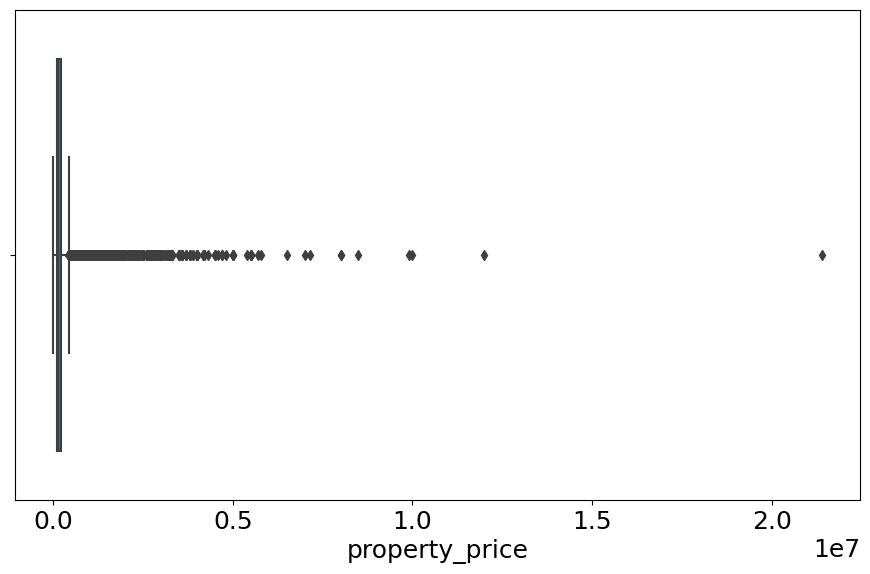

In [37]:
plt.figure(figsize=(10,10))
      
plt.subplot(221)
sns.boxplot(x="property_rooms", data=df_filtrado)
  
plt.subplot(222)
sns.boxplot(x="property_bedrooms", data=df_filtrado)
  
plt.subplot(223)
sns.boxplot(x="property_surface_total", data=df_filtrado)
  
plt.subplot(224)
sns.boxplot(x="property_surface_covered", data=df_filtrado)

plt.show()

plt.subplot(221)
sns.boxplot(x="property_price", data=df_filtrado)
plt.show()

Se puede ver que los distintos valores en las columnas contienen outliers por lo que la media, la mediana y los cuartiles pueden ser valores falsos.

Por ultimo con las correlaciones podemos ver que hay una bastante relacion entre la cantidad de habitaciones y ambientes disponibles en una propiedad, así como también hay una relación considerablemente alta con superficie cubierta y la superficie total.

## Ejercicio 1b: Preprocesamiento

In [38]:
filas_totales=df_filtrado.shape[0]
print(df_filtrado.isna().sum()/filas_totales*100)

latitud                      3.872064
longitud                     3.872064
place_l3                     0.478434
place_l4                    96.426807
property_type                0.000000
property_rooms               1.162945
property_bedrooms           11.860832
property_surface_total       5.130214
property_surface_covered     3.484014
property_price               0.000000
property_title               0.000000
dtype: float64


### Análisis de datos faltantes a nivel de fila

In [39]:
df_filas_nan = df_filtrado[df_filtrado.isna().any(axis=1)]
len(df_filas_nan)

81088

Se observan que hay 81088 filas con datos faltantes

In [40]:
(len(df_filas_nan)/len(df_filtrado))*100


97.72111016040202

De los cuales representan el 97.72% de las observaciones totales del dataset

In [41]:
#filas_muy_faltantes = filas_faltantes[filas_faltantes > 34]
#filas_muy_faltantes.size/filas_faltantes.size*100
# Filtramos filas con 4 o más valores nulos
df_filas_nan_4 = df_filas_nan.dropna(thresh=df_filas_nan.shape[1]-4)
(len(df_filas_nan_4)/len(df_filas_nan))*100

99.75582083662195

Además, se observa que menos del 1% de dichas filas con campos faltantes, tienen más del 33% de sus campos con datos faltantes, que representarían más de 4 campos.

<AxesSubplot:title={'center':'Gráfico de barras variables faltantes por filas'}, xlabel='Variables', ylabel='Porcentaje'>

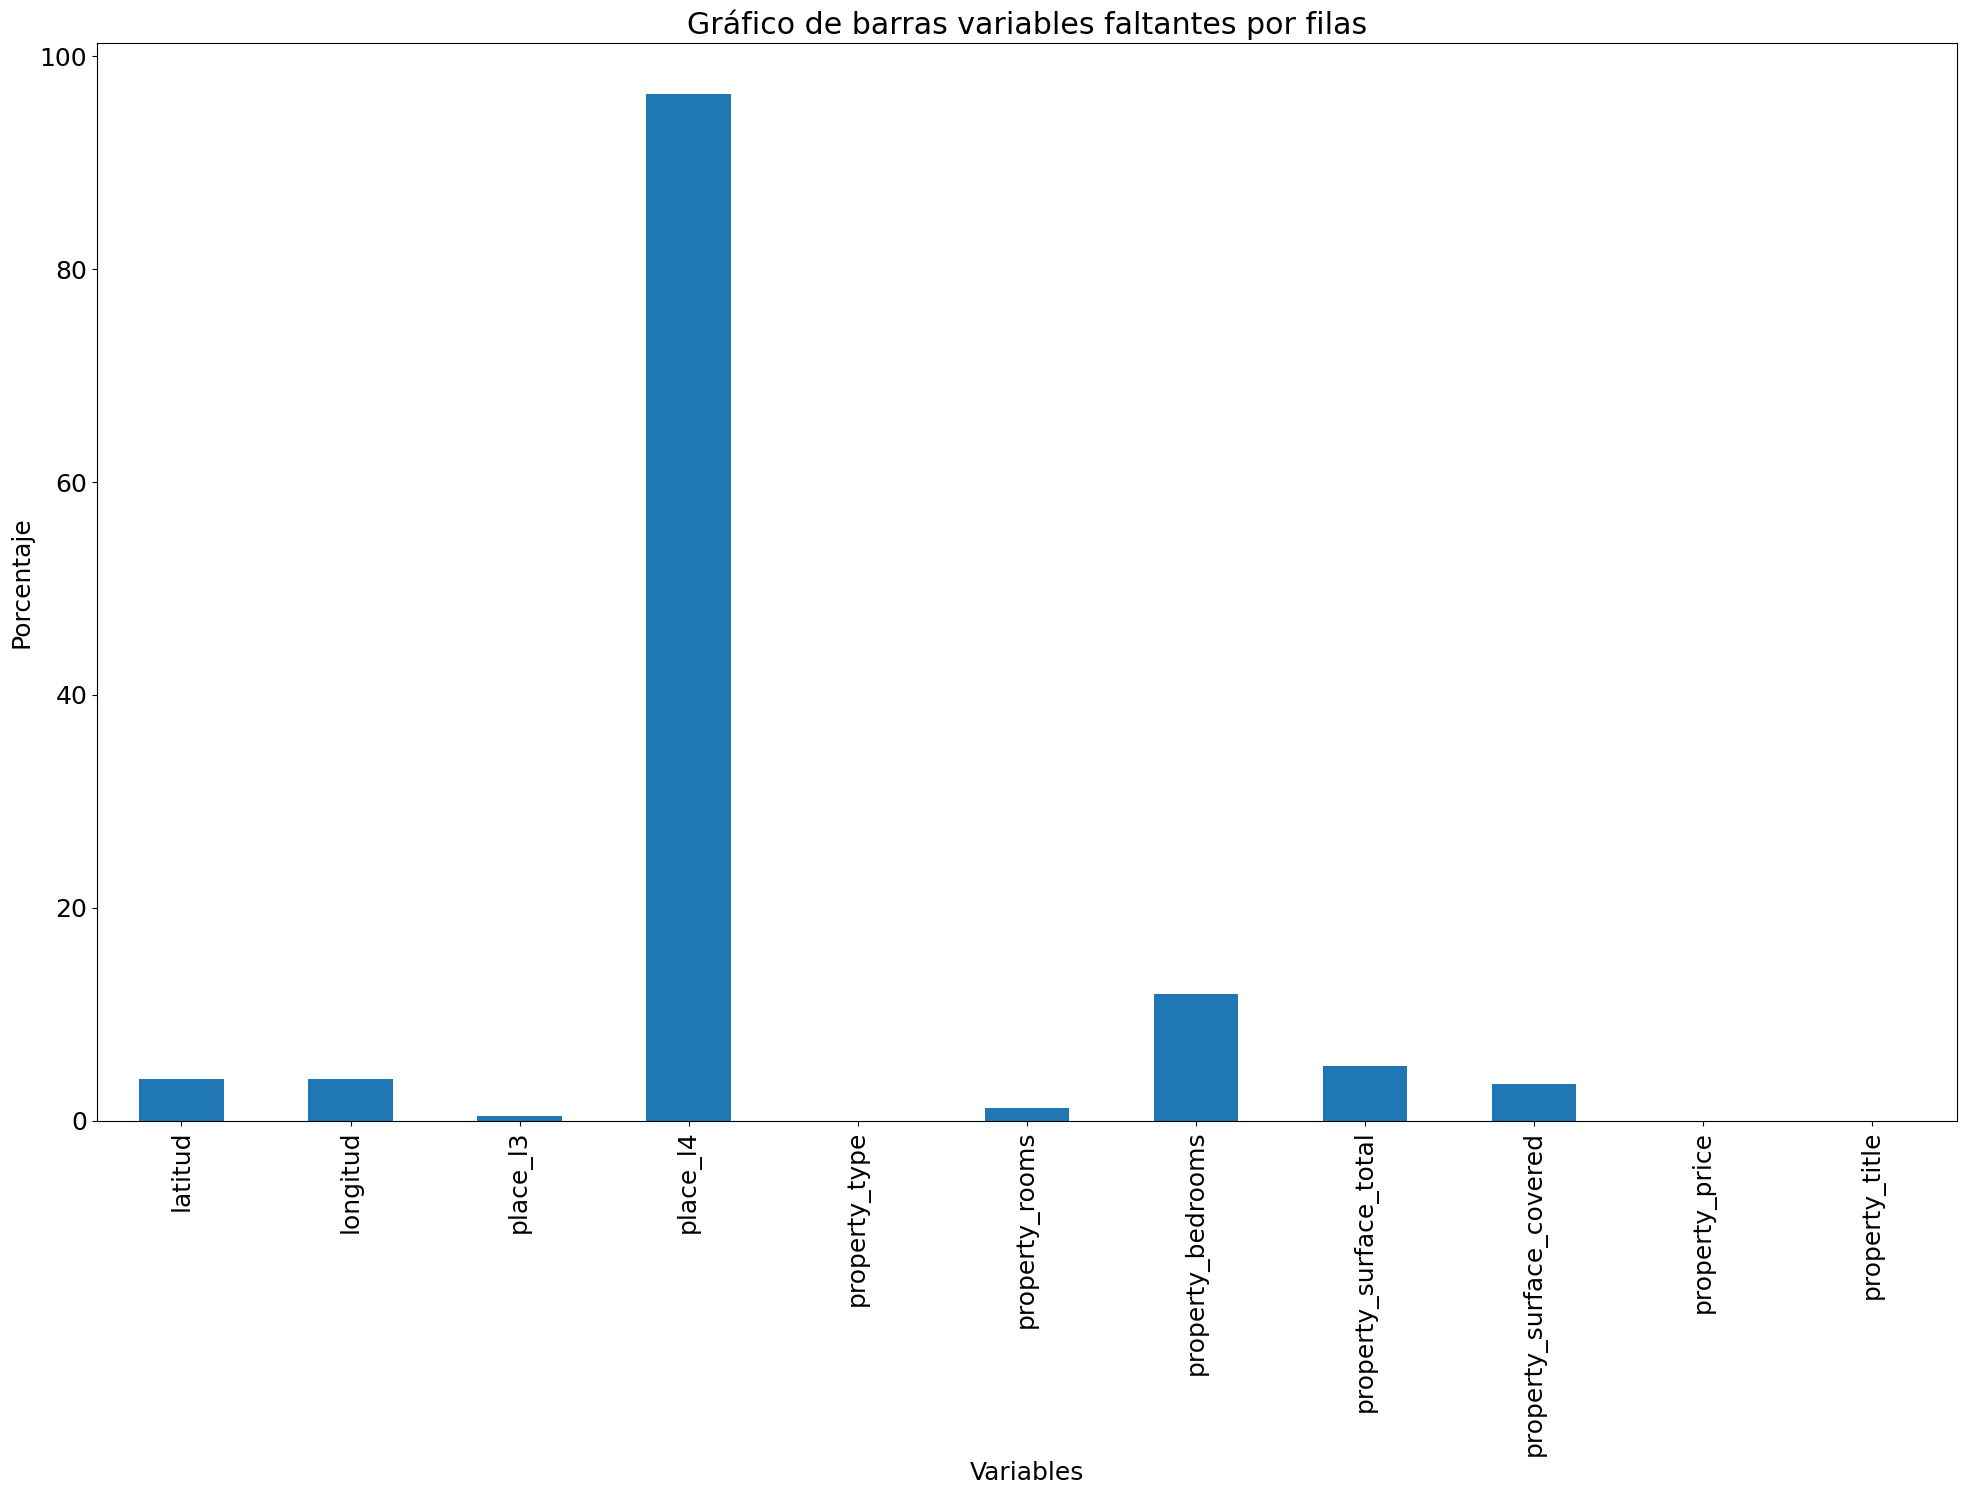

In [42]:
#Gráfico
(df_filtrado.isna().sum()/filas_totales*100).plot.bar(alpha=1 , title="Gráfico de barras variables faltantes por filas" , xlabel="Variables" , ylabel="Porcentaje")

Con este gráfico se puede observar que al menos 70.000 filas tienen un 8% de datos nulos

### Analisis de datos faltantes a nivel de columna

In [43]:
columnas_totales=df_filtrado.shape[0]
columnas_faltantes = df_filtrado.isnull().sum(axis=0)/columnas_totales*100
columnas_faltantes = columnas_faltantes[columnas_faltantes > 0]
columnas_faltantes.size


8

Se observan que hay 8 columnas con datos faltantes.

In [44]:
columnas_faltantes.size/df_filtrado.shape[1]*100

72.72727272727273

El 66,67% de las columnas totales del dataset

In [45]:
columnas_muy_faltantes = columnas_faltantes[columnas_faltantes > 34]
columnas_muy_faltantes.size/columnas_faltantes.size*100

12.5

El 12,5% de las columnas con datos faltantes tiene mas del 33% de sus campos con datos faltantes. 

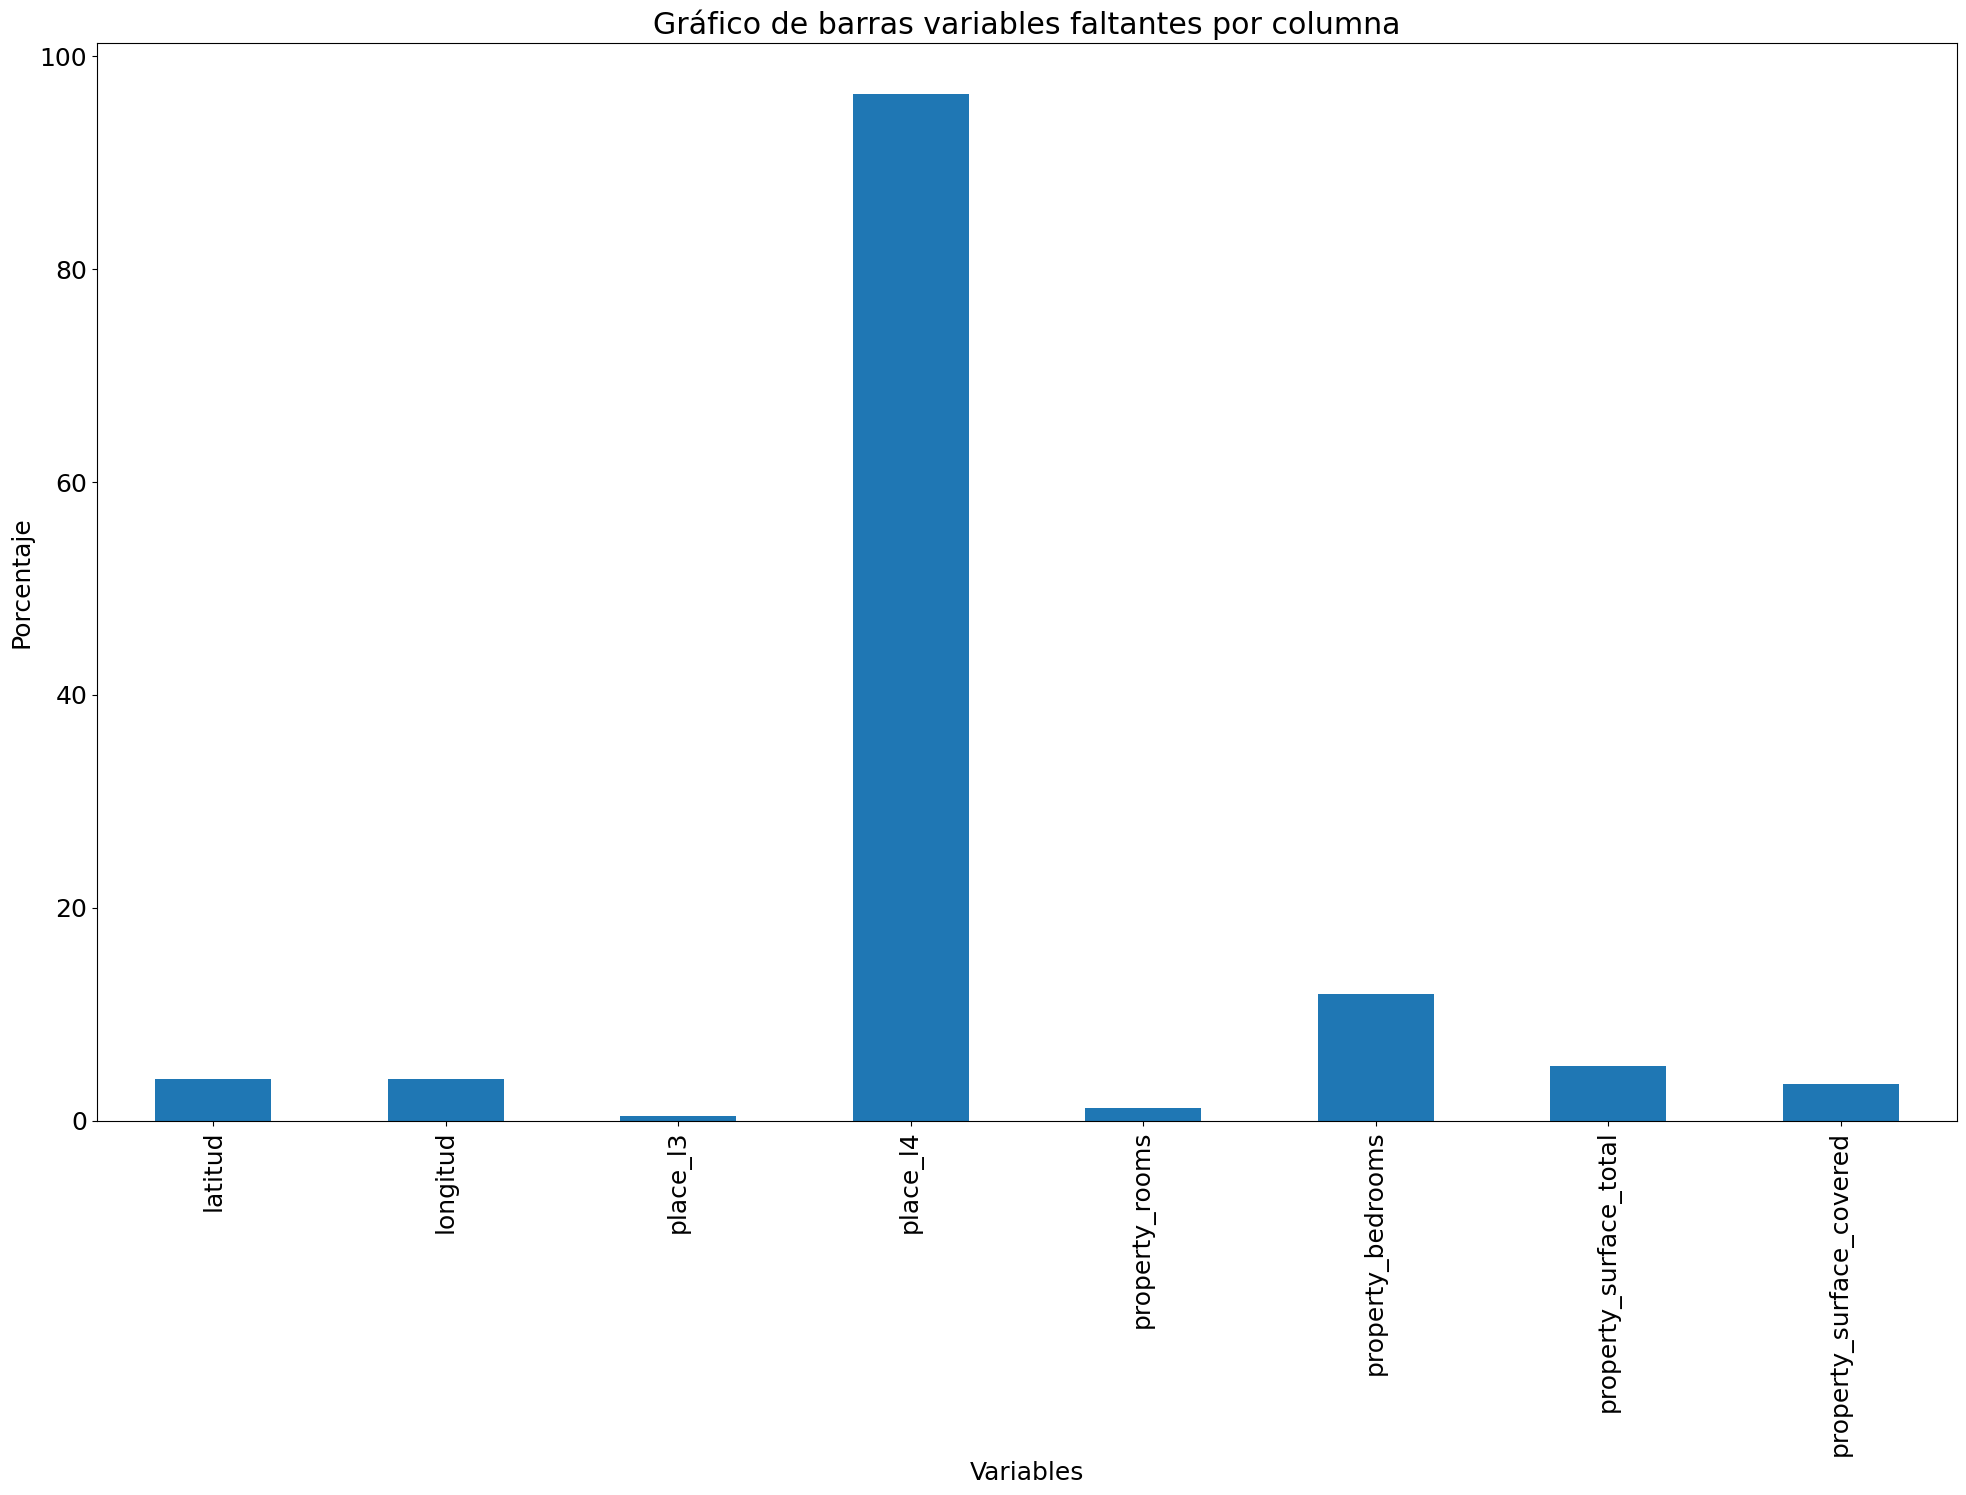

In [46]:
#Gráfico

grafico_col_faltantes = columnas_faltantes.plot.bar(alpha=1 , title="Gráfico de barras variables faltantes por columna" , xlabel="Variables" , ylabel="Porcentaje") 

Gracias a este gráfico podemos saber que la columna con más datos faltantes es 'place_l4'

### Estrategias para reparar valores faltantes

Opción 0: eliminarlos del dataset

In [47]:
df_eliminar_nans_0 =  df_filtrado.copy()
df_eliminar_nans_0.dropna(inplace=True)
df_eliminar_nans_0.shape
df_eliminar_nans_0.isnull().sum()

latitud                     0
longitud                    0
place_l3                    0
place_l4                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_title              0
dtype: int64

In [48]:
df_eliminar_nans_0.shape[0]/df_filtrado.shape[0]*100

2.2788898395979706

Se observa que de esta forma, al eliminar todas las filas con NA's, sobrevivió sólo menos del 3% de las observaciones originales.

Opción 1: tratar los NaNs como su propia categoria o valor

In [49]:
df_eliminar_nans_1=df_filtrado.copy()
df_eliminar_nans_1['latitud'] =df_eliminar_nans_1['latitud'].fillna(999999999) #999999999 = no existe
df_eliminar_nans_1['longitud'] = df_eliminar_nans_1['longitud'].fillna(999999999)
df_eliminar_nans_1['place_l4'] = df_eliminar_nans_1['place_l4'].fillna("Barrio no existe")
df_eliminar_nans_1['place_l3'] = df_eliminar_nans_1['place_l3'].fillna("Ciudad no existe")
df_eliminar_nans_1['property_rooms'] = df_eliminar_nans_1['property_rooms'].fillna(-1) #-1 para decir que esta vacío
df_eliminar_nans_1['property_bedrooms'] = df_eliminar_nans_1['property_bedrooms'].fillna(-1)
df_eliminar_nans_1['property_surface_total'] = df_eliminar_nans_1['property_surface_total'].fillna(-1)
df_eliminar_nans_1['property_surface_covered'] = df_eliminar_nans_1['property_surface_covered'].fillna(-1)
df_eliminar_nans_1.isnull().sum()


latitud                     0
longitud                    0
place_l3                    0
place_l4                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
property_title              0
dtype: int64

Se categorizan latitud y longitud con 999999999 para entender que es una variable que no existe en el dataset

Luego 'place_l3' y 'place_l4' son modificados con la categoría "Barrio/ciudad no existen" 

Finalmente los valores 'property' se modifican creando la categoría -1 por lo mismo mencionado

Opción 2: completar usando información de esa columna (Univariadas)

In [50]:
df_eliminar_nans_2 = df_filtrado.copy()

# completar con la mediana, promedio, moda o constante

# Devuelve el valor de imputacion de las tres estrategias para esa columna
def mostrat_estrategias(df, nombre_col, k=99):
    _df = df[[nombre_col]].copy()
    s = df[nombre_col]

    _df['mediana'] = s.fillna(s.median())
    _df['media'] = s.fillna(s.mean())
    _df['moda'] = s.fillna(s.mode()[0])
    _df['constante'] = k

    return _df[s.isna()]

# ejemplo utilizando columna property_bedrooms
mostrat_estrategias(df_eliminar_nans_2, 'property_bedrooms', 99)

,property_bedrooms,mediana,media,moda,constante
37,NaN,2.0,2.010473,1.0,99
39,NaN,2.0,2.010473,1.0,99
47,NaN,2.0,2.010473,1.0,99
50,NaN,2.0,2.010473,1.0,99
56,NaN,2.0,2.010473,1.0,99
...,...,...,...,...,...
82933,NaN,2.0,2.010473,1.0,99
82939,NaN,2.0,2.010473,1.0,99
82945,NaN,2.0,2.010473,1.0,99
82967,NaN,2.0,2.010473,1.0,99


Opción 3: completar usando info de las demas columnas (Multivariadas)

In [51]:
columnas = ['place_l3','latitud', 'longitud', 'property_bedrooms','property_rooms', 'property_surface_total', 
            'property_surface_covered']
df_eliminar_nans_3=df_filtrado[columnas].copy()
df_eliminar_nans_3['place_l3'] = df_eliminar_nans_3['place_l3'].fillna("Ciudad no existe")

# Creo diccionario asignandole a cada ciudad (valor) una clave numerica aplicando el método Label Encoder
class_mapping_ciudad = {label:idx for idx, label in enumerate(np.unique(df_eliminar_nans_3['place_l3']))}
class_mapping_ciudad['Ciudad no existe'] = np.nan # reemplazo en el df 'Ciudad no existe' por nan

# Cabio los valores por sus claves numericas asociadas
df_eliminar_nans_3['place_l3'] = df_eliminar_nans_3['place_l3'].map(class_mapping_ciudad)

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, 
                        min_value = [df_eliminar_nans_3['place_l3'].min(), -np.inf, -np.inf,-np.inf, -np.inf, -np.inf, -np.inf],
                        max_value = [df_eliminar_nans_3['place_l3'].max(), np.inf, np.inf,np.inf, np.inf, np.inf, np.inf],
                        verbose=0, random_state=0)
df_eliminar_nans_3[:] = imp.fit_transform(df_eliminar_nans_3)

# Vuelvo a pasar a string
inv_class_mapping_ciudad = {v:k for k, v in class_mapping_ciudad.items()}

df_eliminar_nans_3['place_l3'] = df_eliminar_nans_3['place_l3'].astype(int).map(inv_class_mapping_ciudad)

df_eliminar_nans_3.isna().sum()

place_l3                    0
latitud                     0
longitud                    0
property_bedrooms           0
property_rooms              0
property_surface_total      0
property_surface_covered    0
dtype: int64

Se observa que ninguna columna tiene valores faltantes

In [52]:
df_eliminar_nans_3.head()

,place_l3,latitud,longitud,property_bedrooms,property_rooms,property_surface_total,property_surface_covered
0,Palermo,-34.589971,-58.459118,3.0,4.0,171.000000,133.0
1,Boca,-34.637319,-58.361124,2.0,3.0,58.000000,55.0
2,Boca,-34.628647,-58.361871,3.0,4.0,70.000000,70.0
3,Once,-34.610027,-58.401934,2.0,4.0,135.313113,104.0
4,Boedo,-34.631621,-58.416825,2.0,4.0,106.403032,73.0


Y que además la variable categórica place_l3 se mantuvo categórica luego de la transformación.

- Elegimos la opción 3, Multivariadas, debido a que utiliza datos ya presentes en el dataset, lo que permite reemplazar los datos faltantes por una prediccion basada en los analisis y observaciones en simultaneo de mas de una variable. Este método es fácil de implementar asi como tambien es efectivo, pudiendo aumentar la cantidad de iteraciones necesarias si creemos necesario mejorar la precision de nuestros resultados. 

### Comparación de distribuciones de cada atributo reparado con distribución previa a la imputación de los datos faltantes

In [79]:
df_previo_eliminar = df_filtrado.copy()
df_filtrado[['place_l3','latitud', 'longitud', 'property_rooms','property_bedrooms', 'property_surface_total', 
            'property_surface_covered']] = df_eliminar_nans_3
#df_filtrado.drop(['place_l4'], axis=1, inplace=True)
#df_filtrado.to_csv("properati_argentina_2021_filtrado.csv")

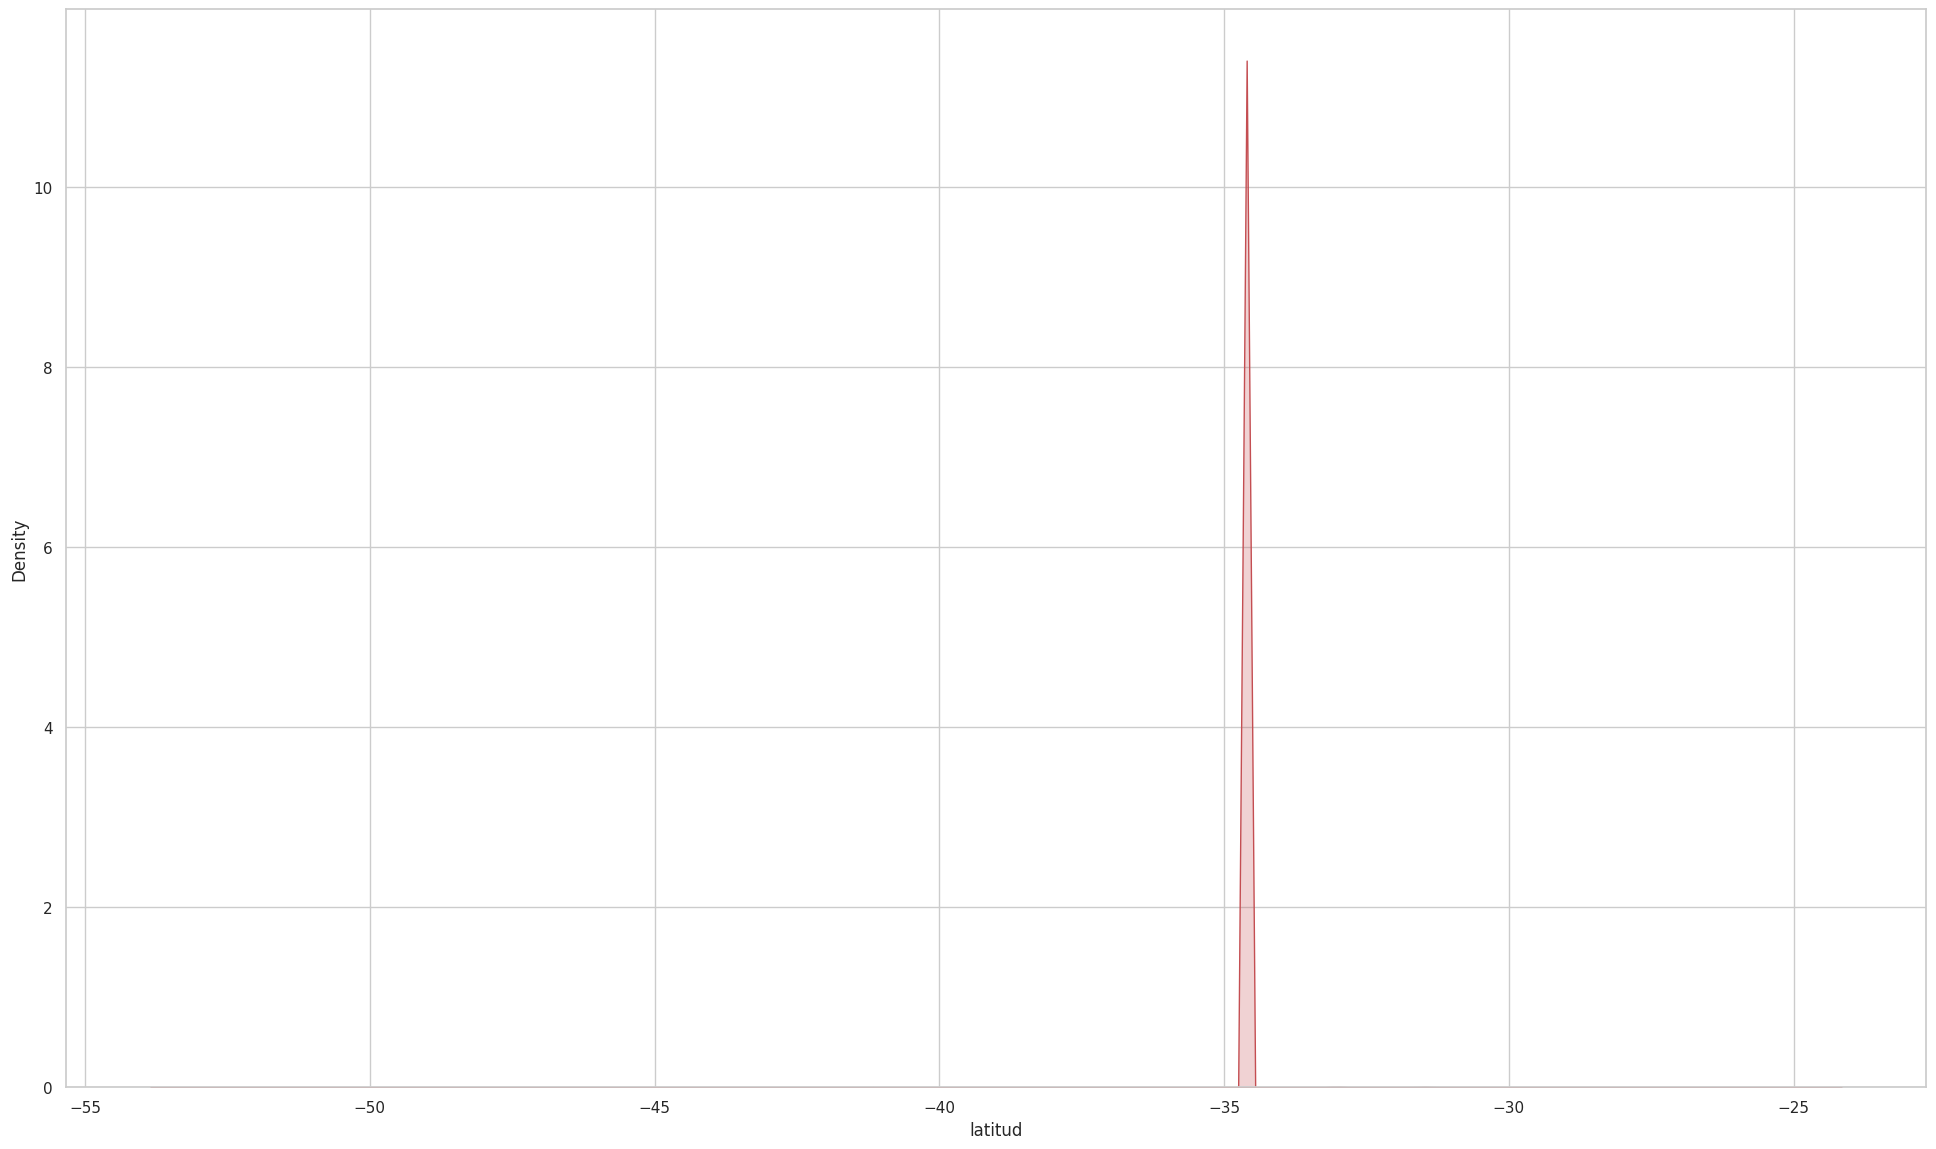

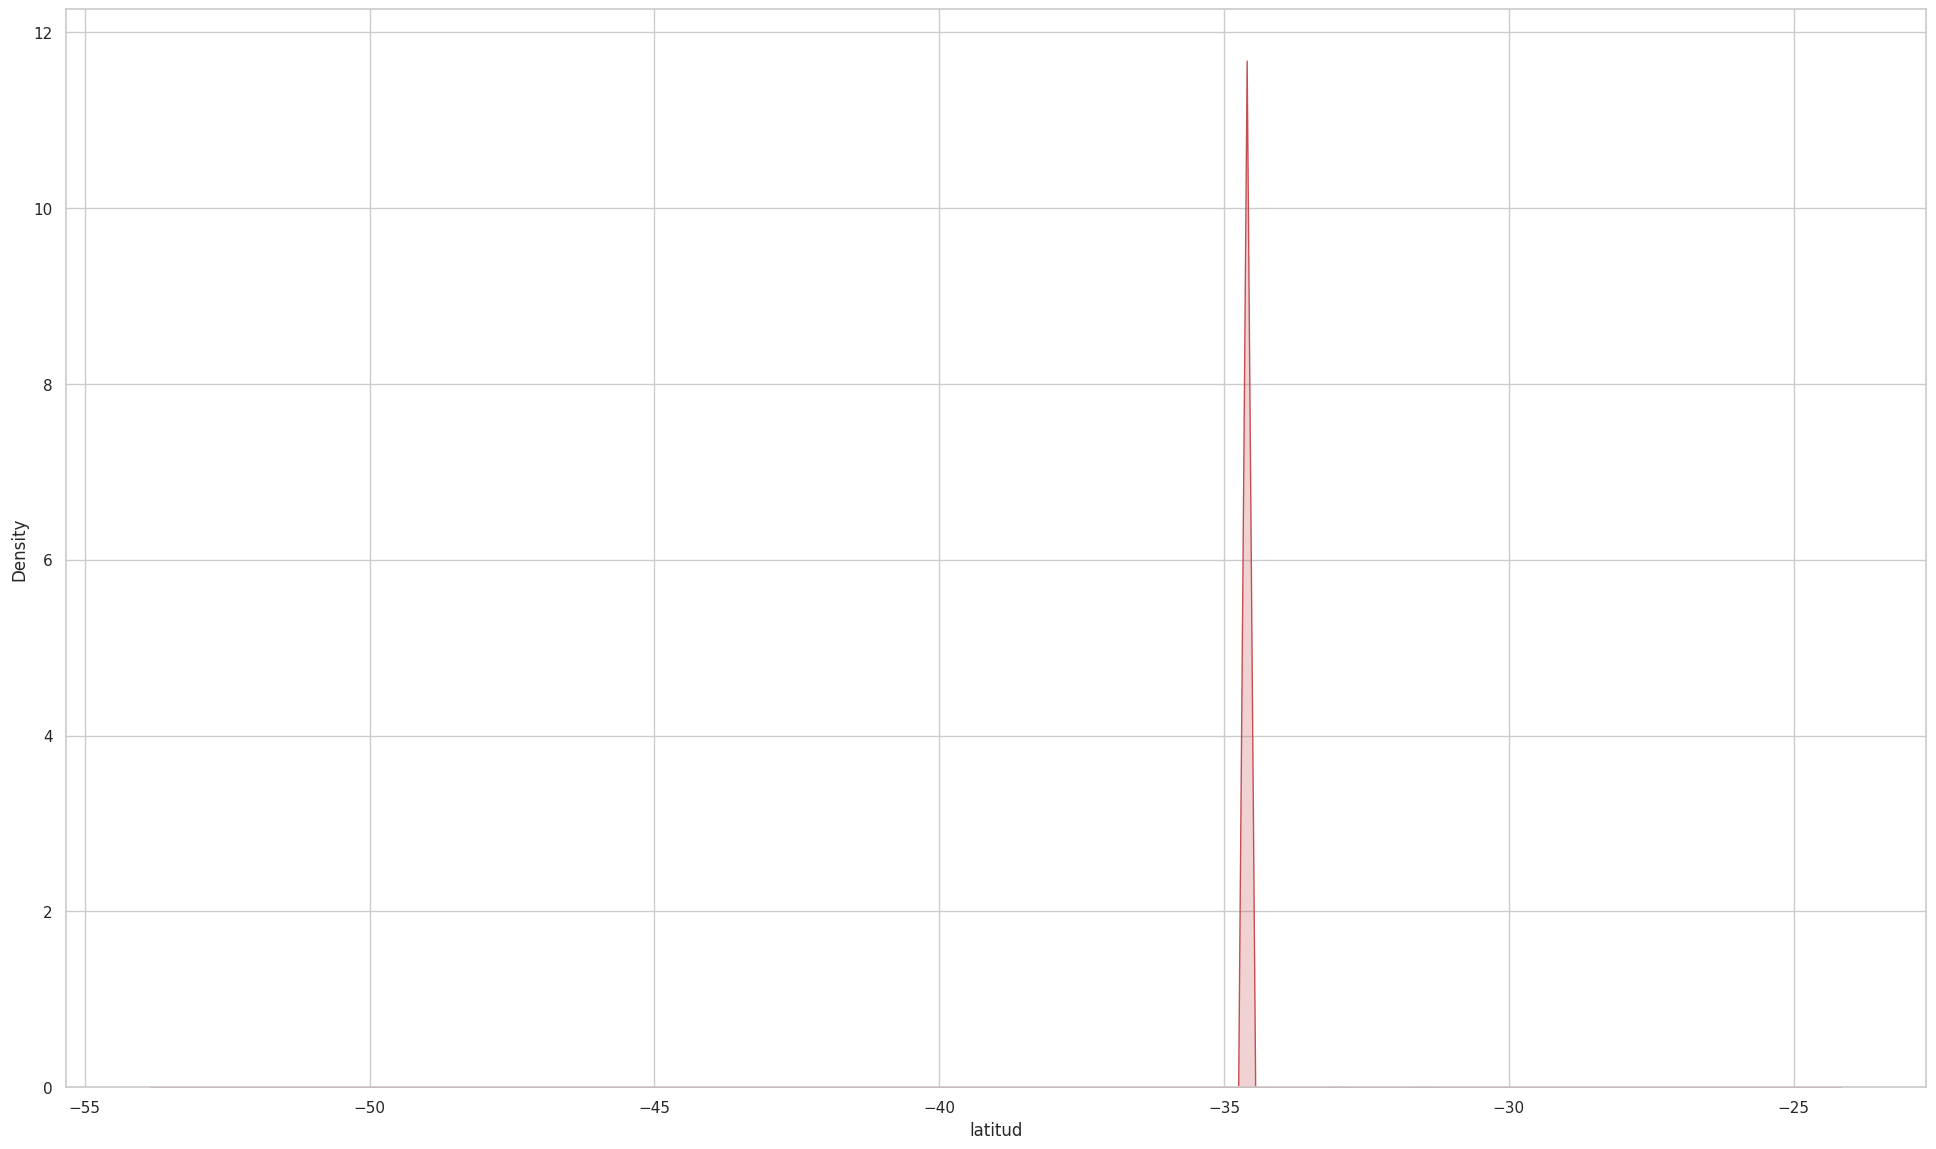

In [54]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['latitud'], shade=True, color="r")
plt.show()

fig = sns.kdeplot(df_filtrado['latitud'], shade=True, color="r")
plt.show()

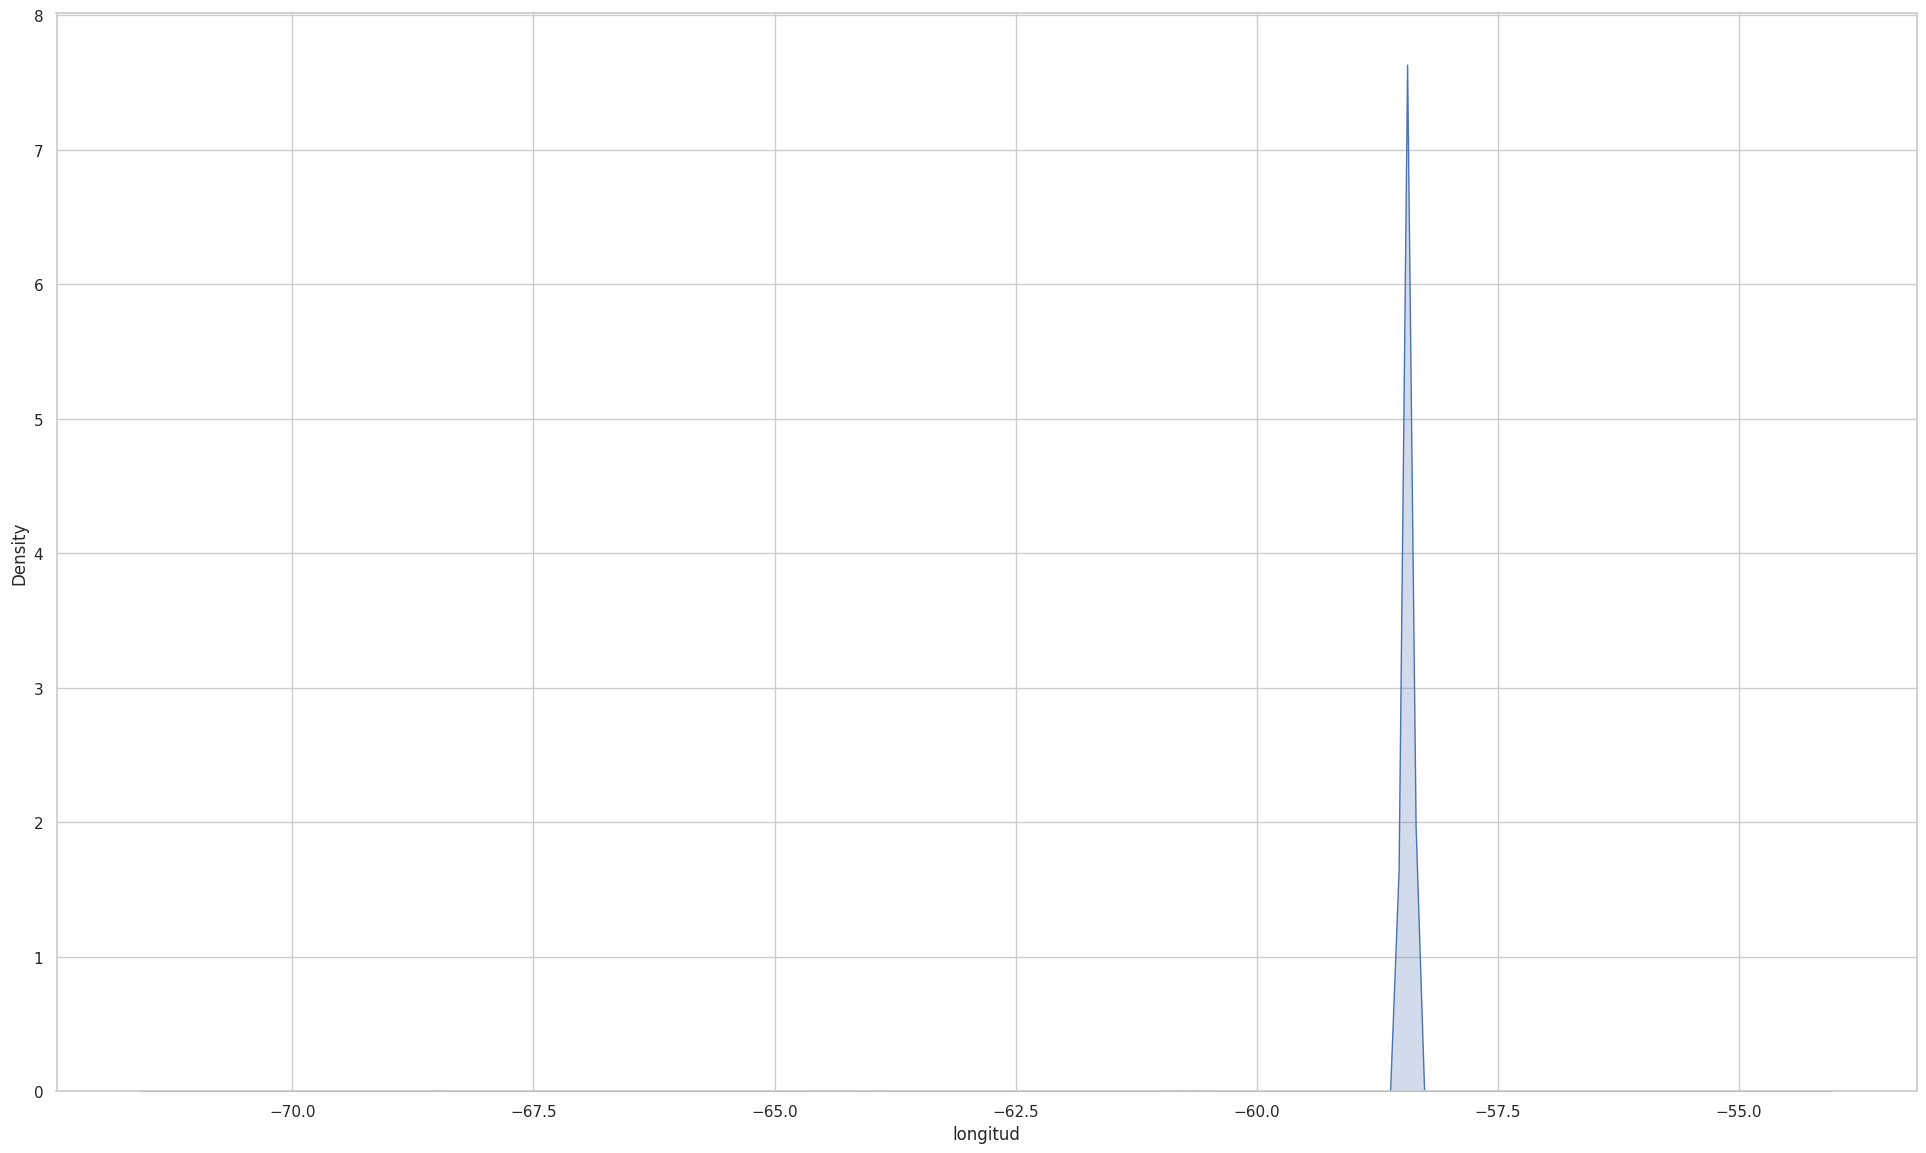

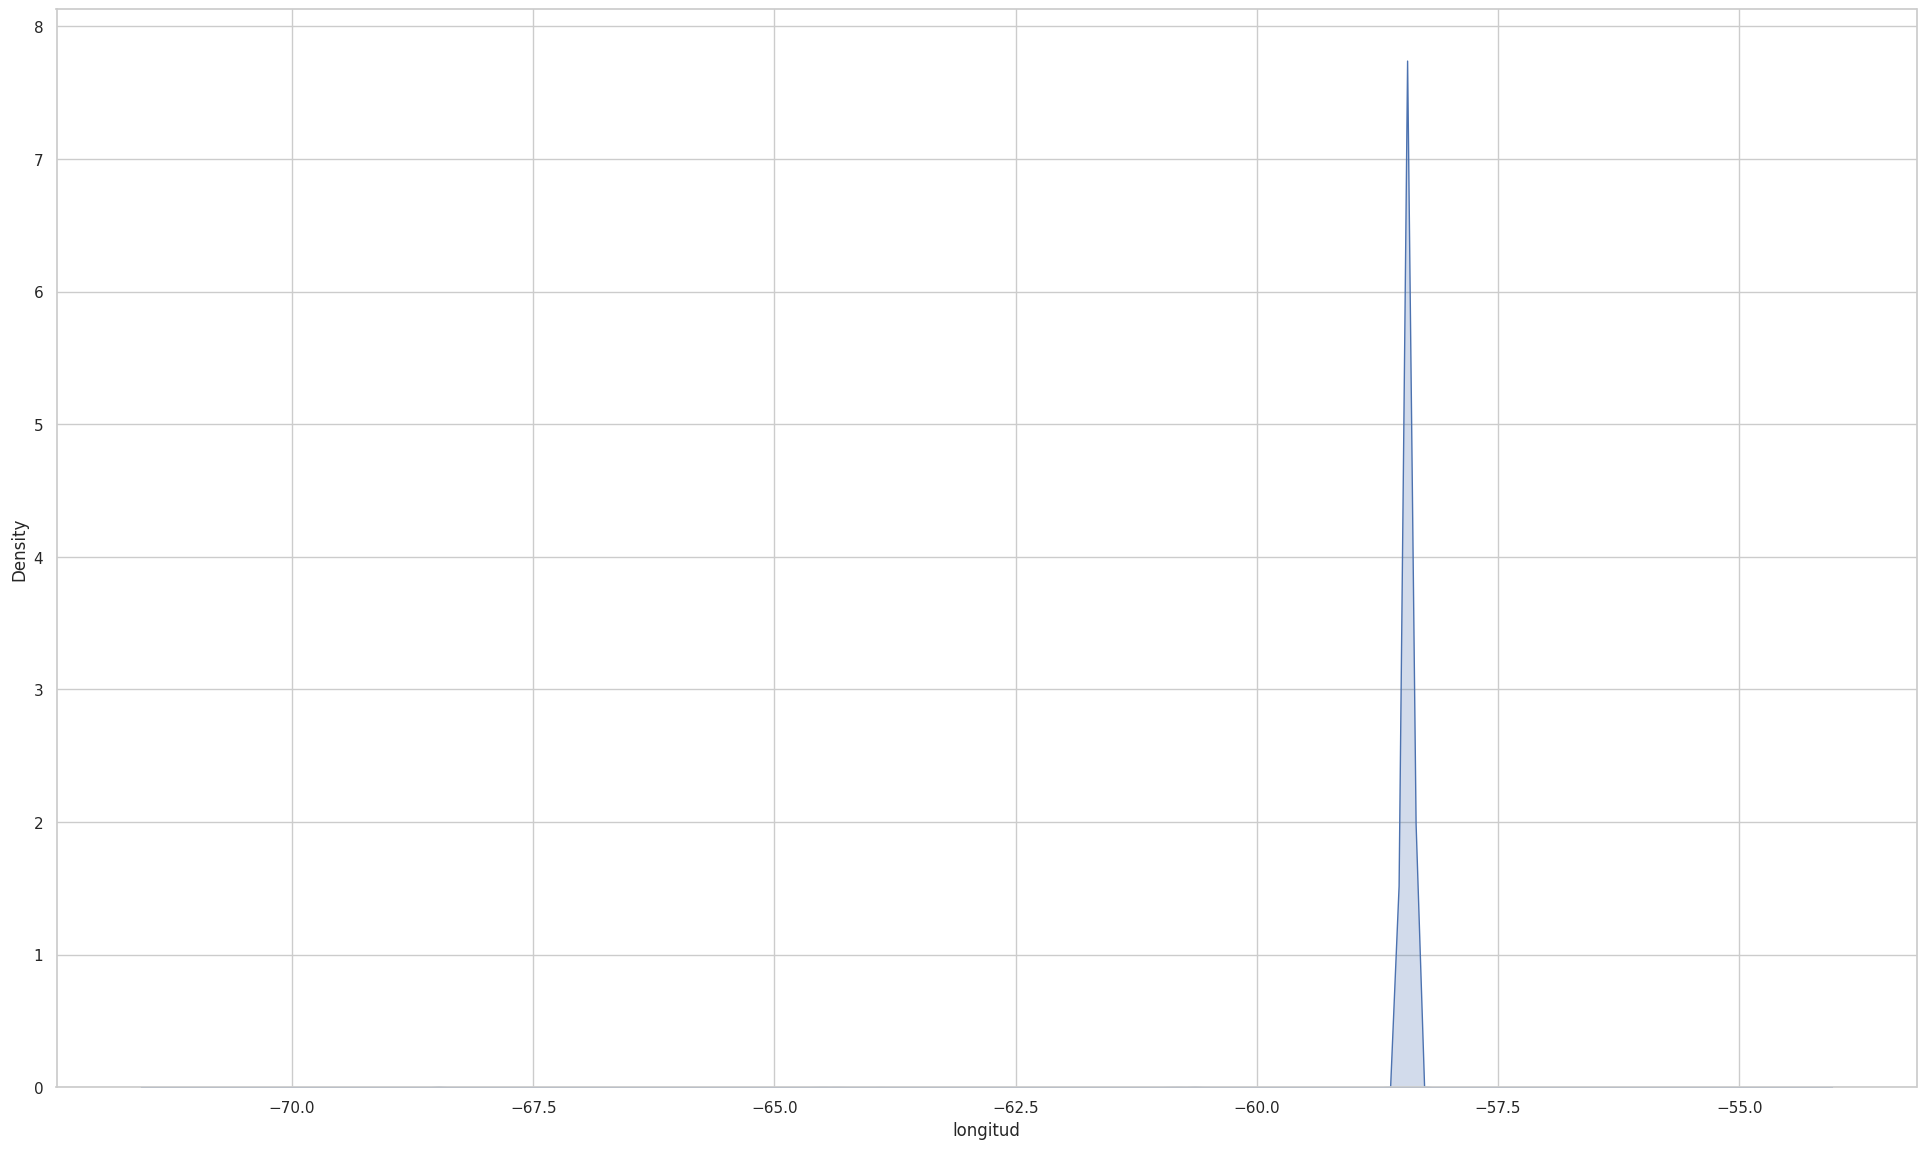

In [55]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['longitud'], shade=True, color="b")
plt.show()

fig = sns.kdeplot(df_filtrado['longitud'], shade=True, color="b")
plt.show()

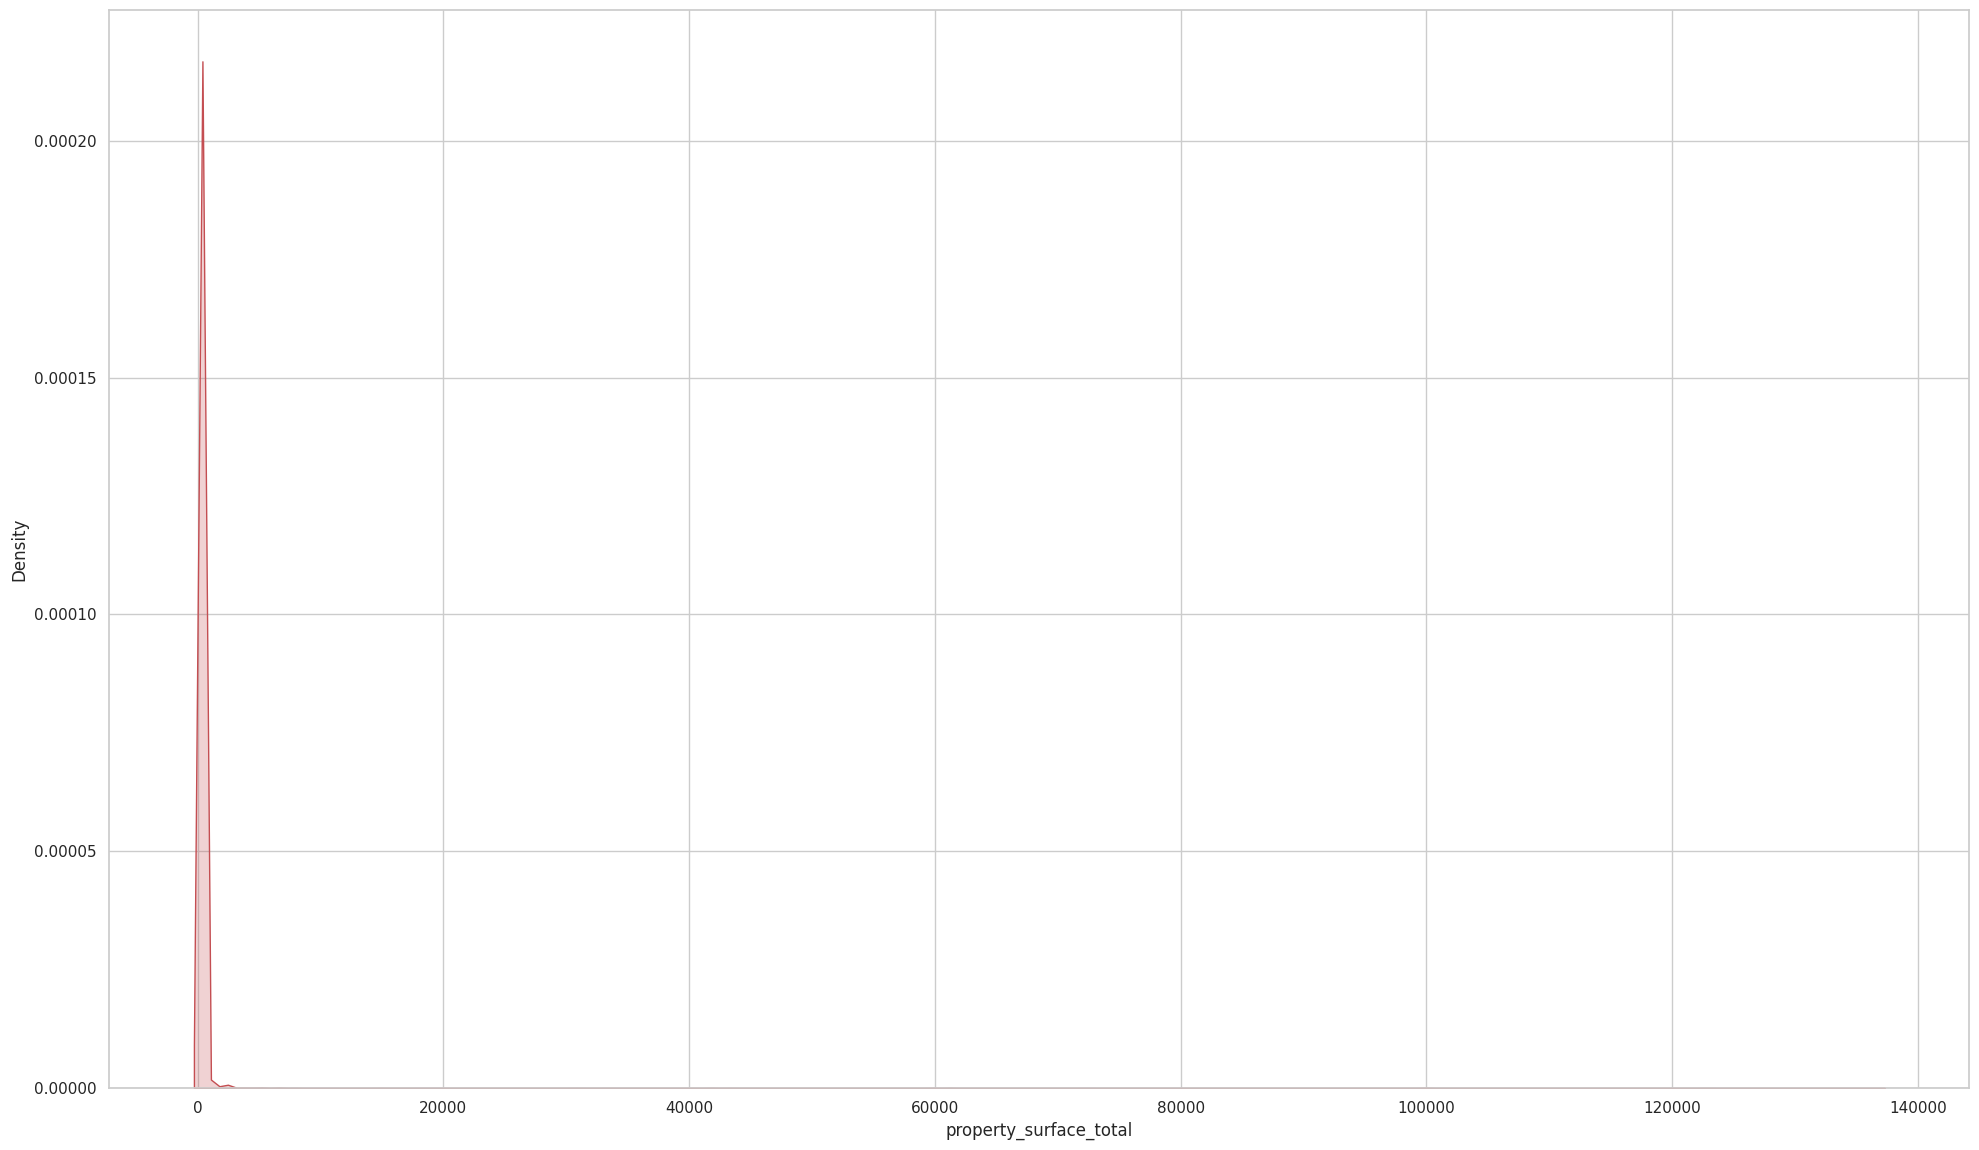

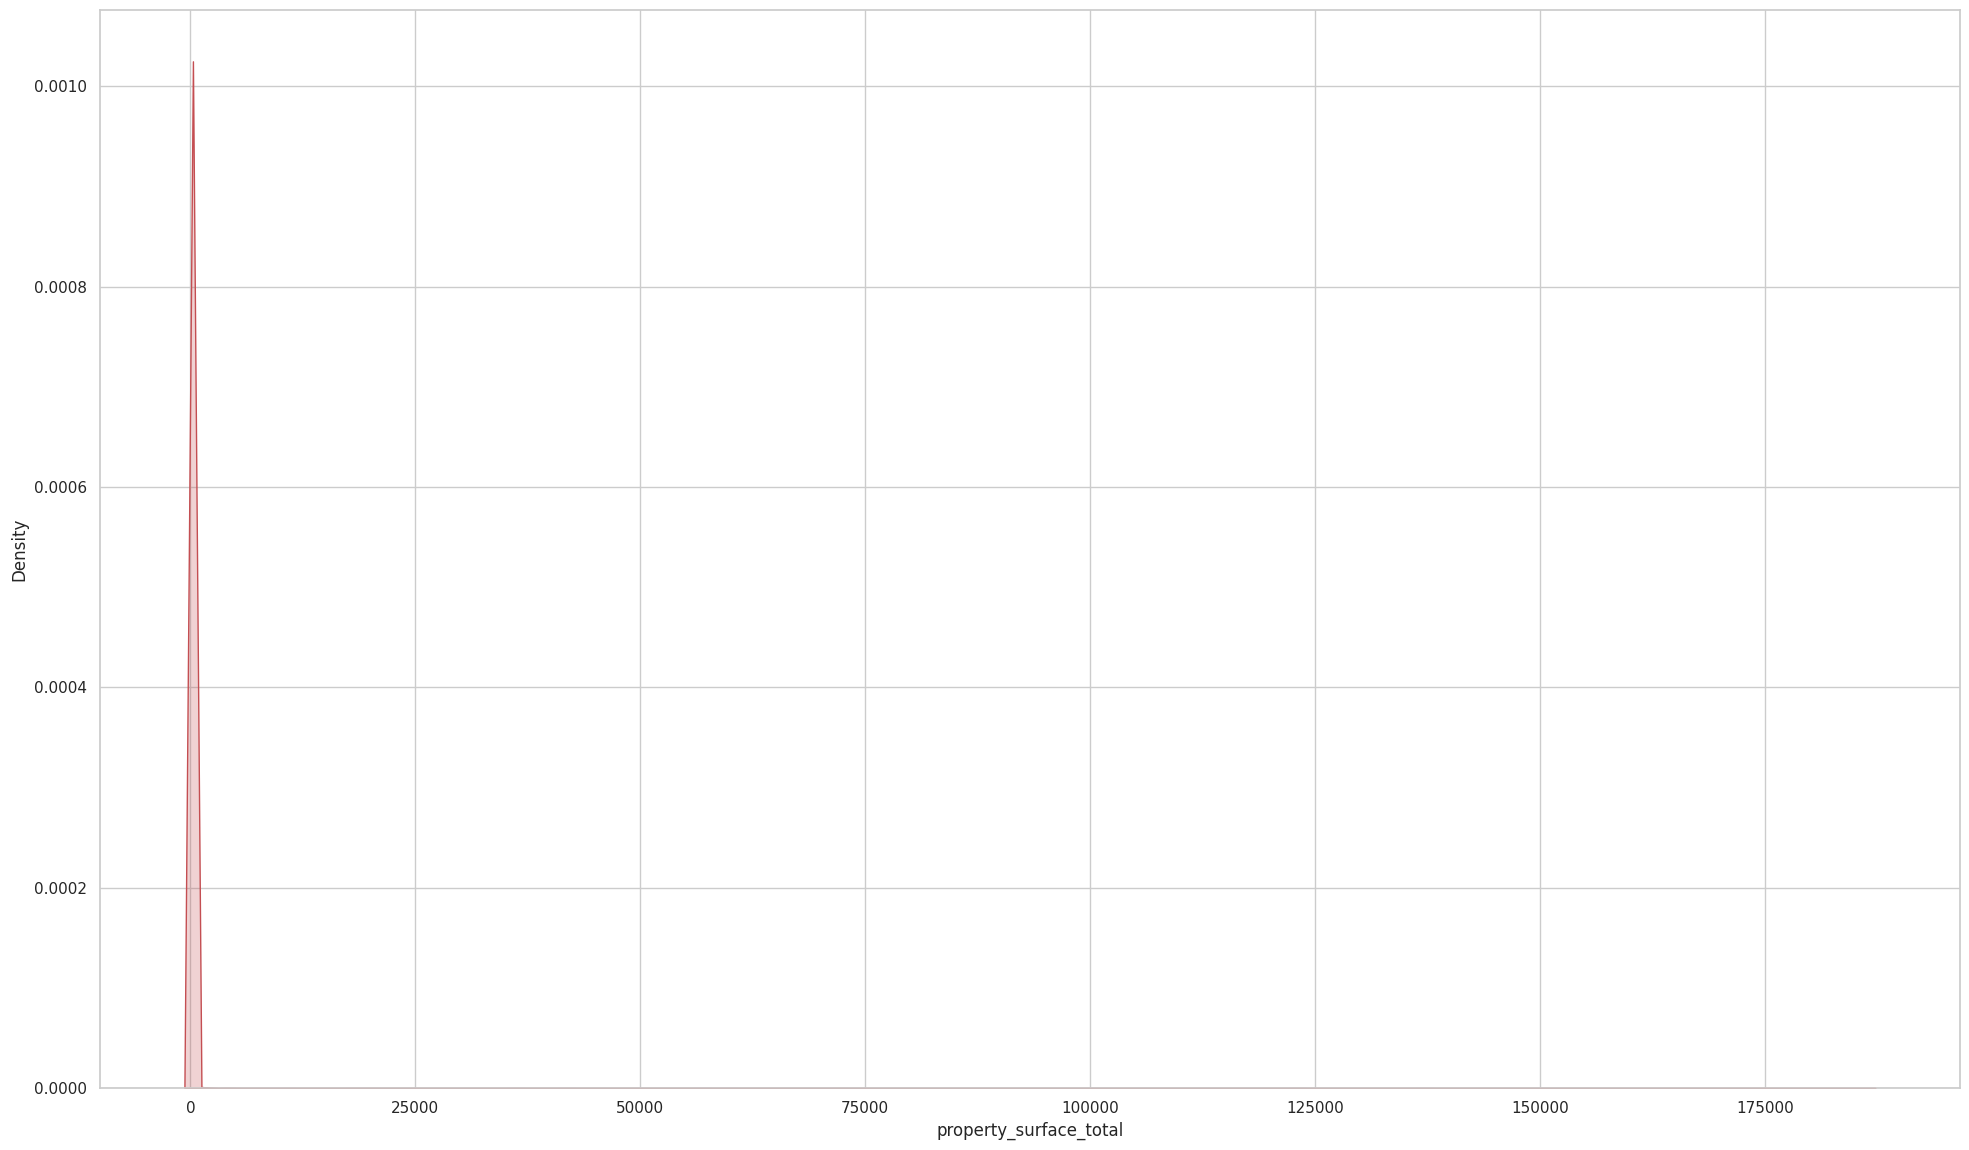

In [56]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['property_surface_total'], shade=True, color="r")
plt.show()

fig = sns.kdeplot(df_filtrado['property_surface_total'], shade=True, color="r")
plt.show()


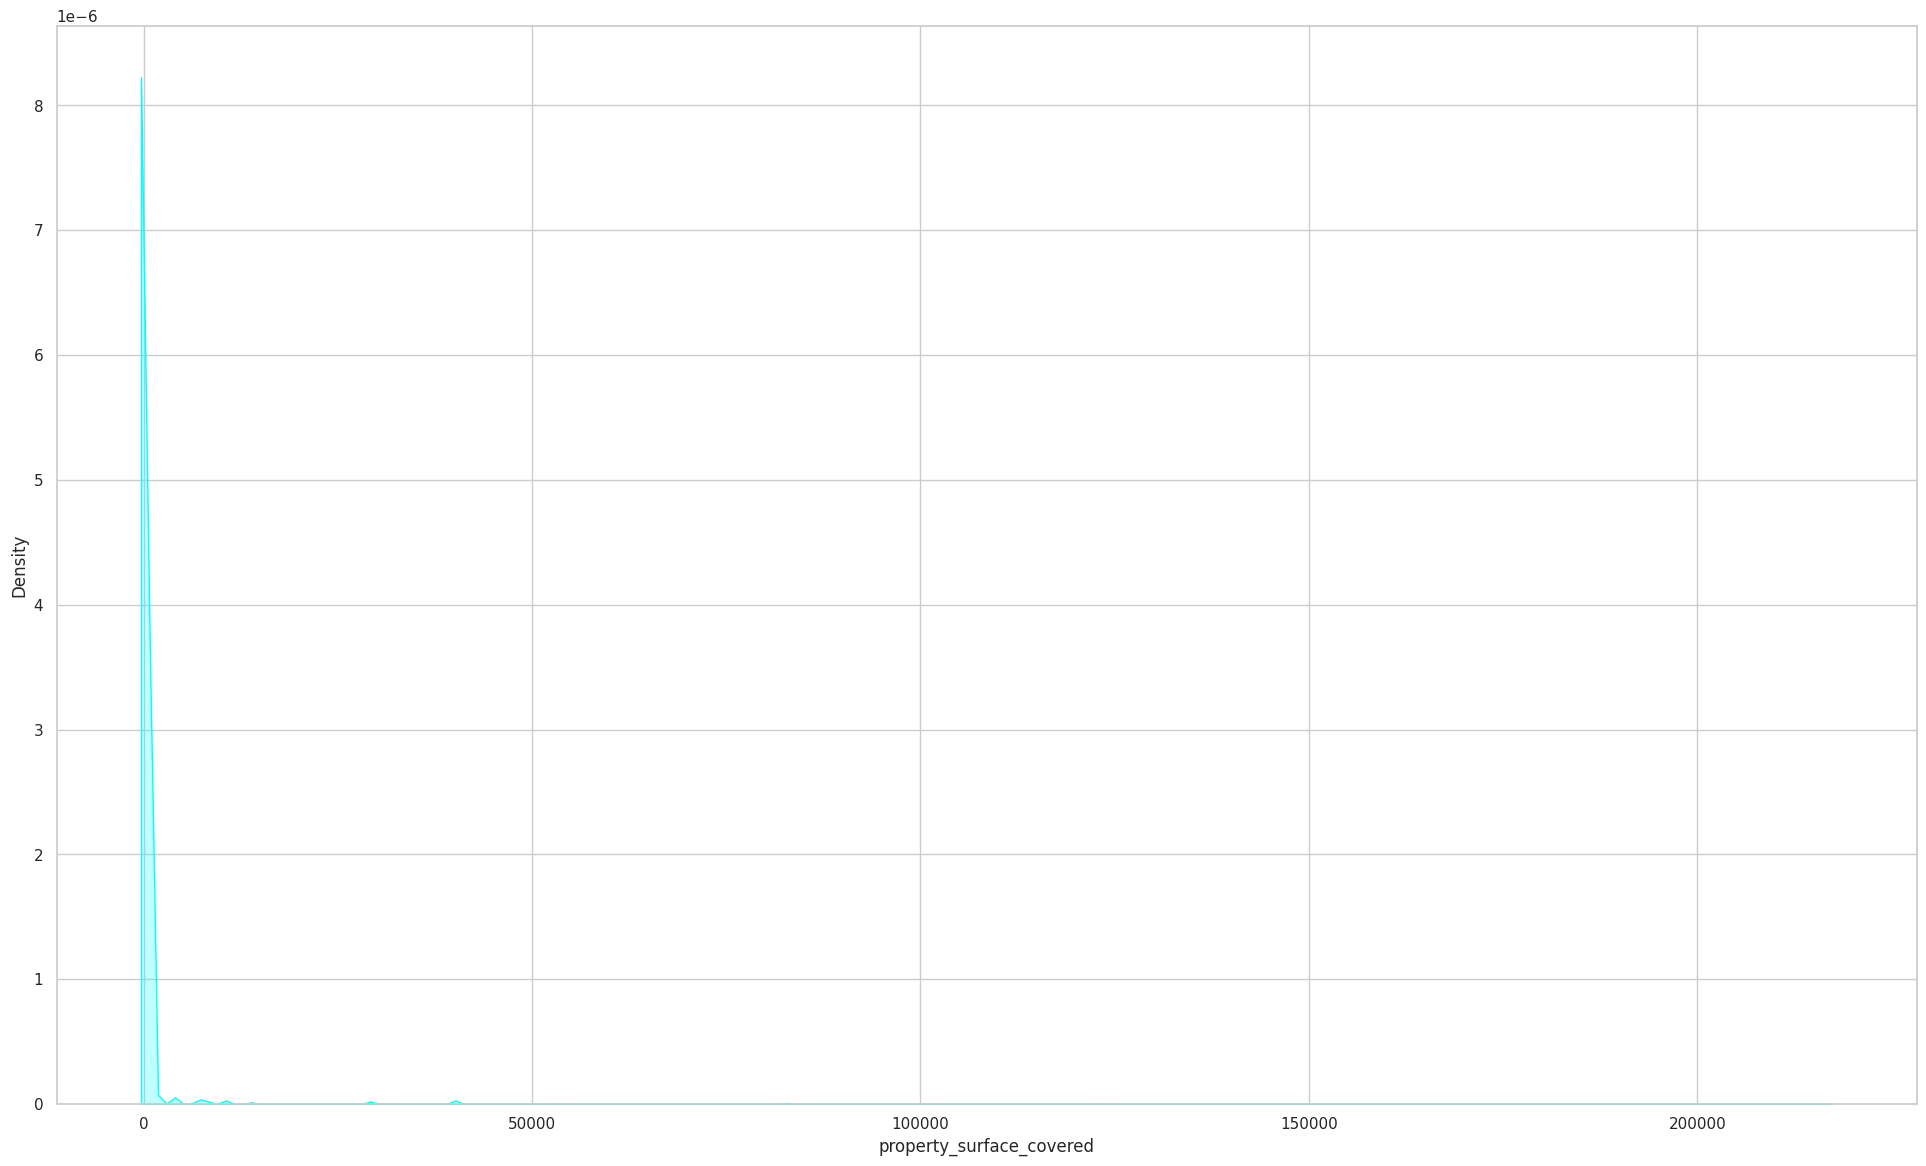

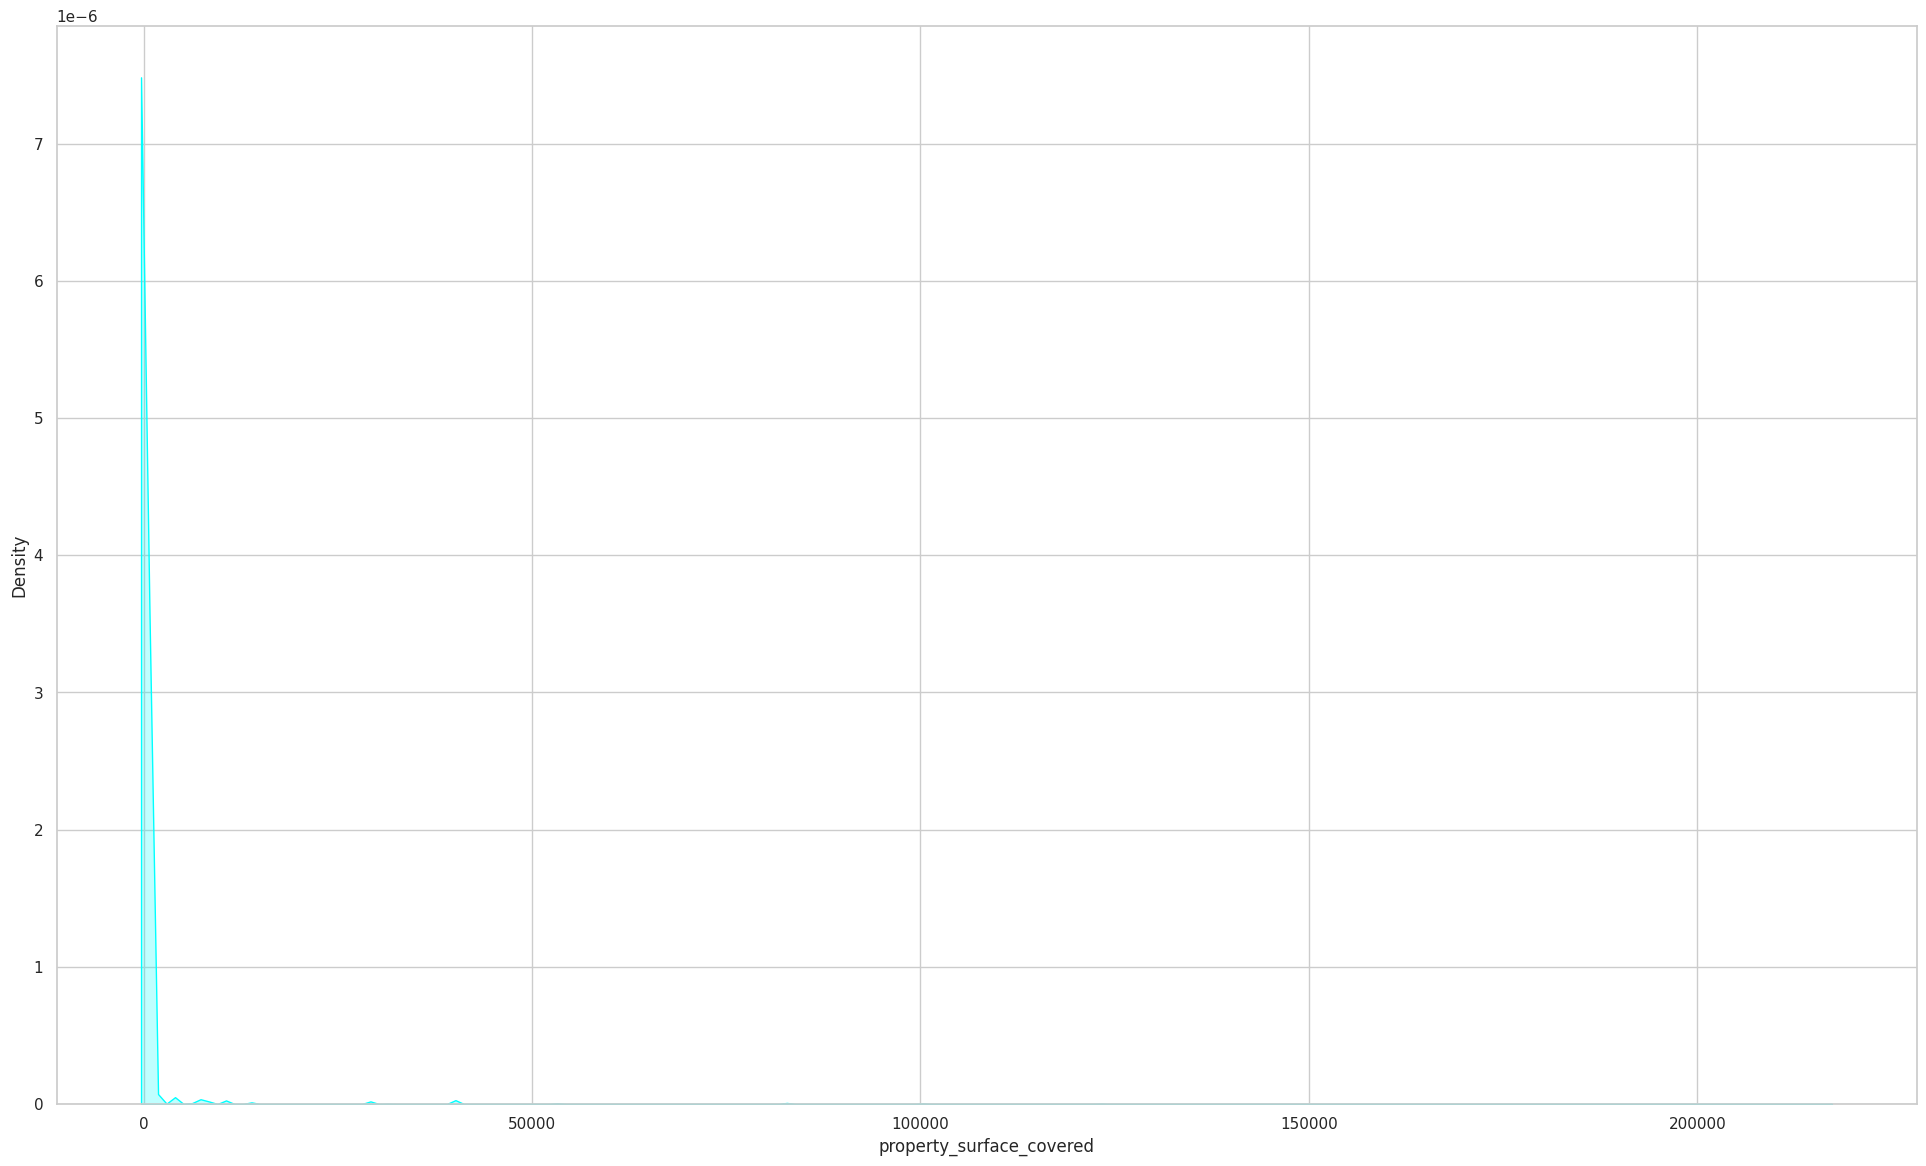

In [57]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['property_surface_covered'], shade=True, color="aqua")
plt.show()

fig = sns.kdeplot(df_filtrado['property_surface_covered'], shade=True, color="aqua")
plt.show()

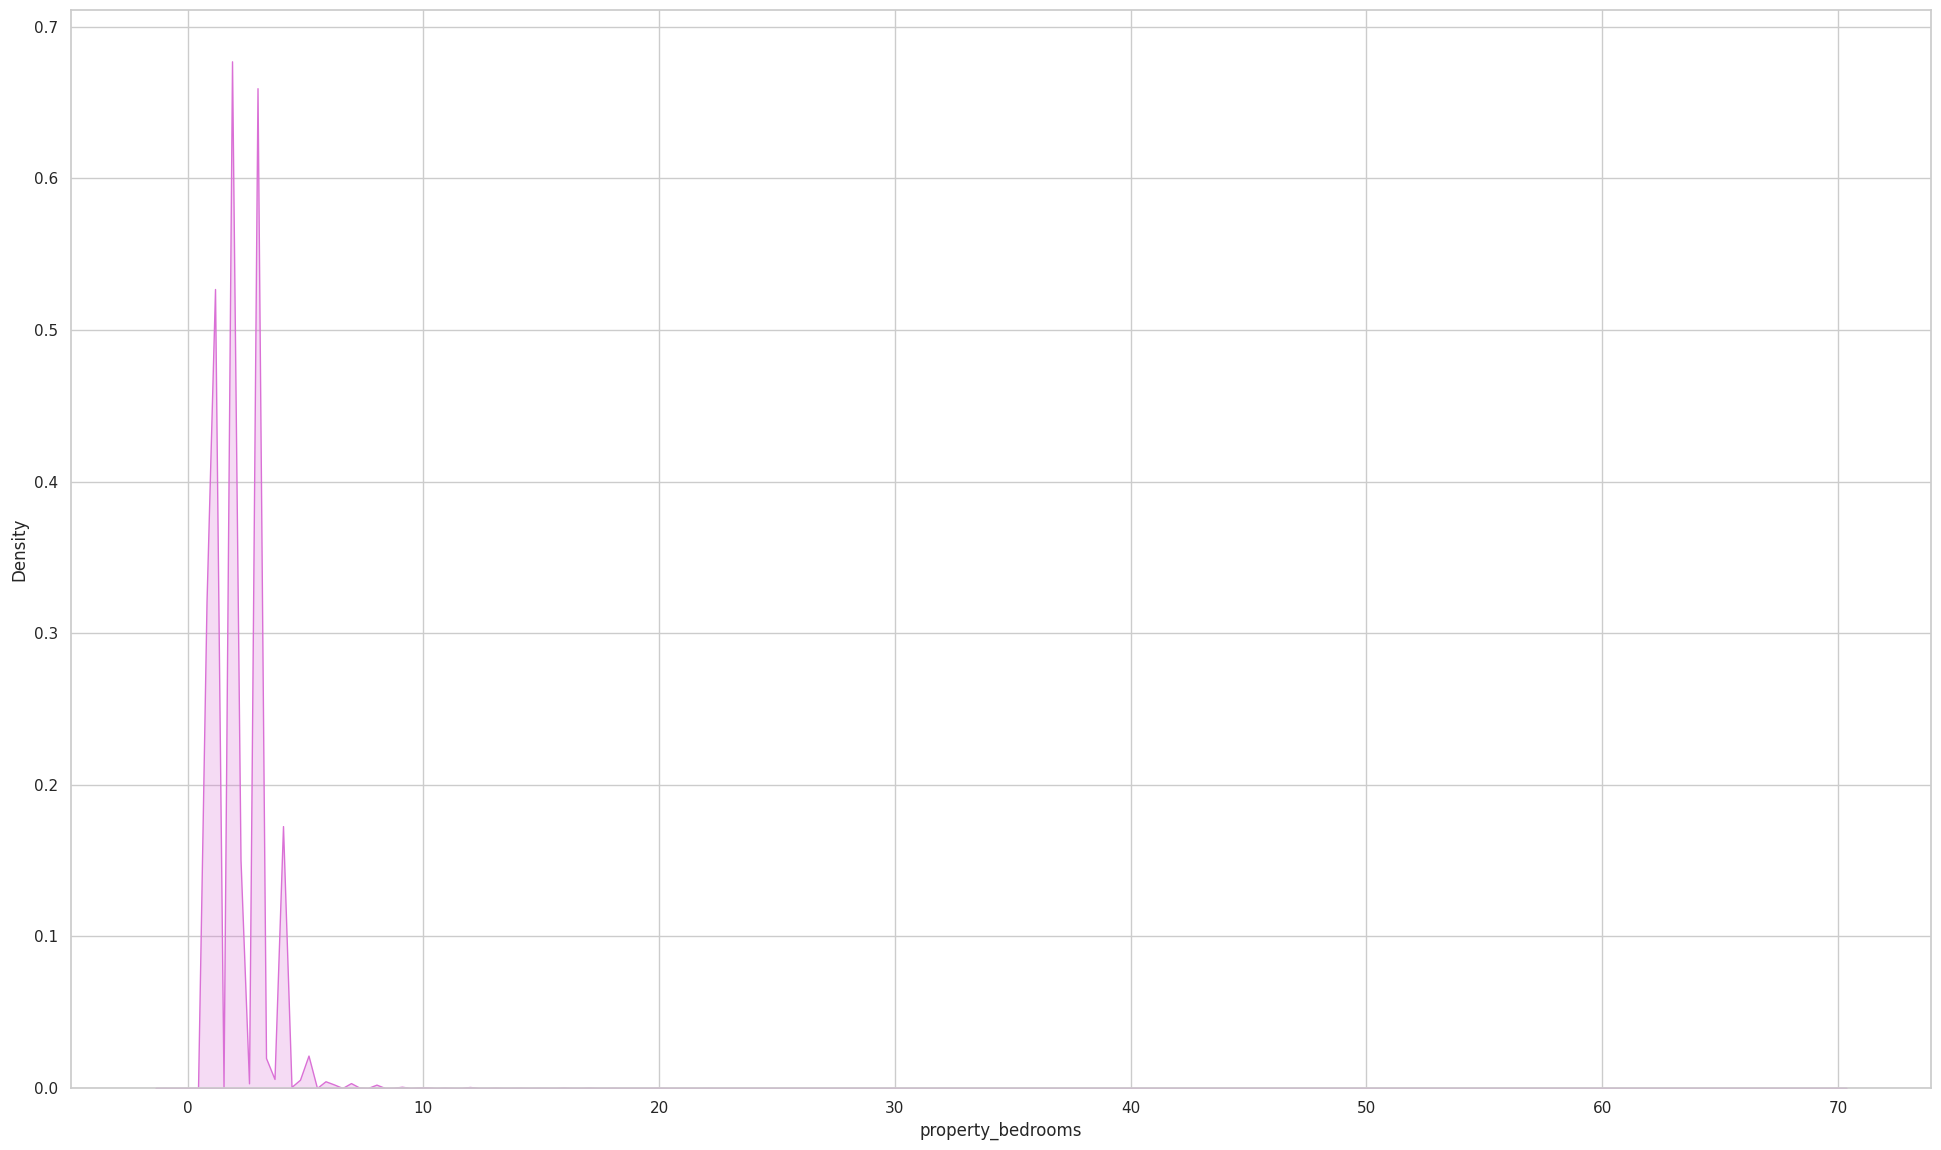

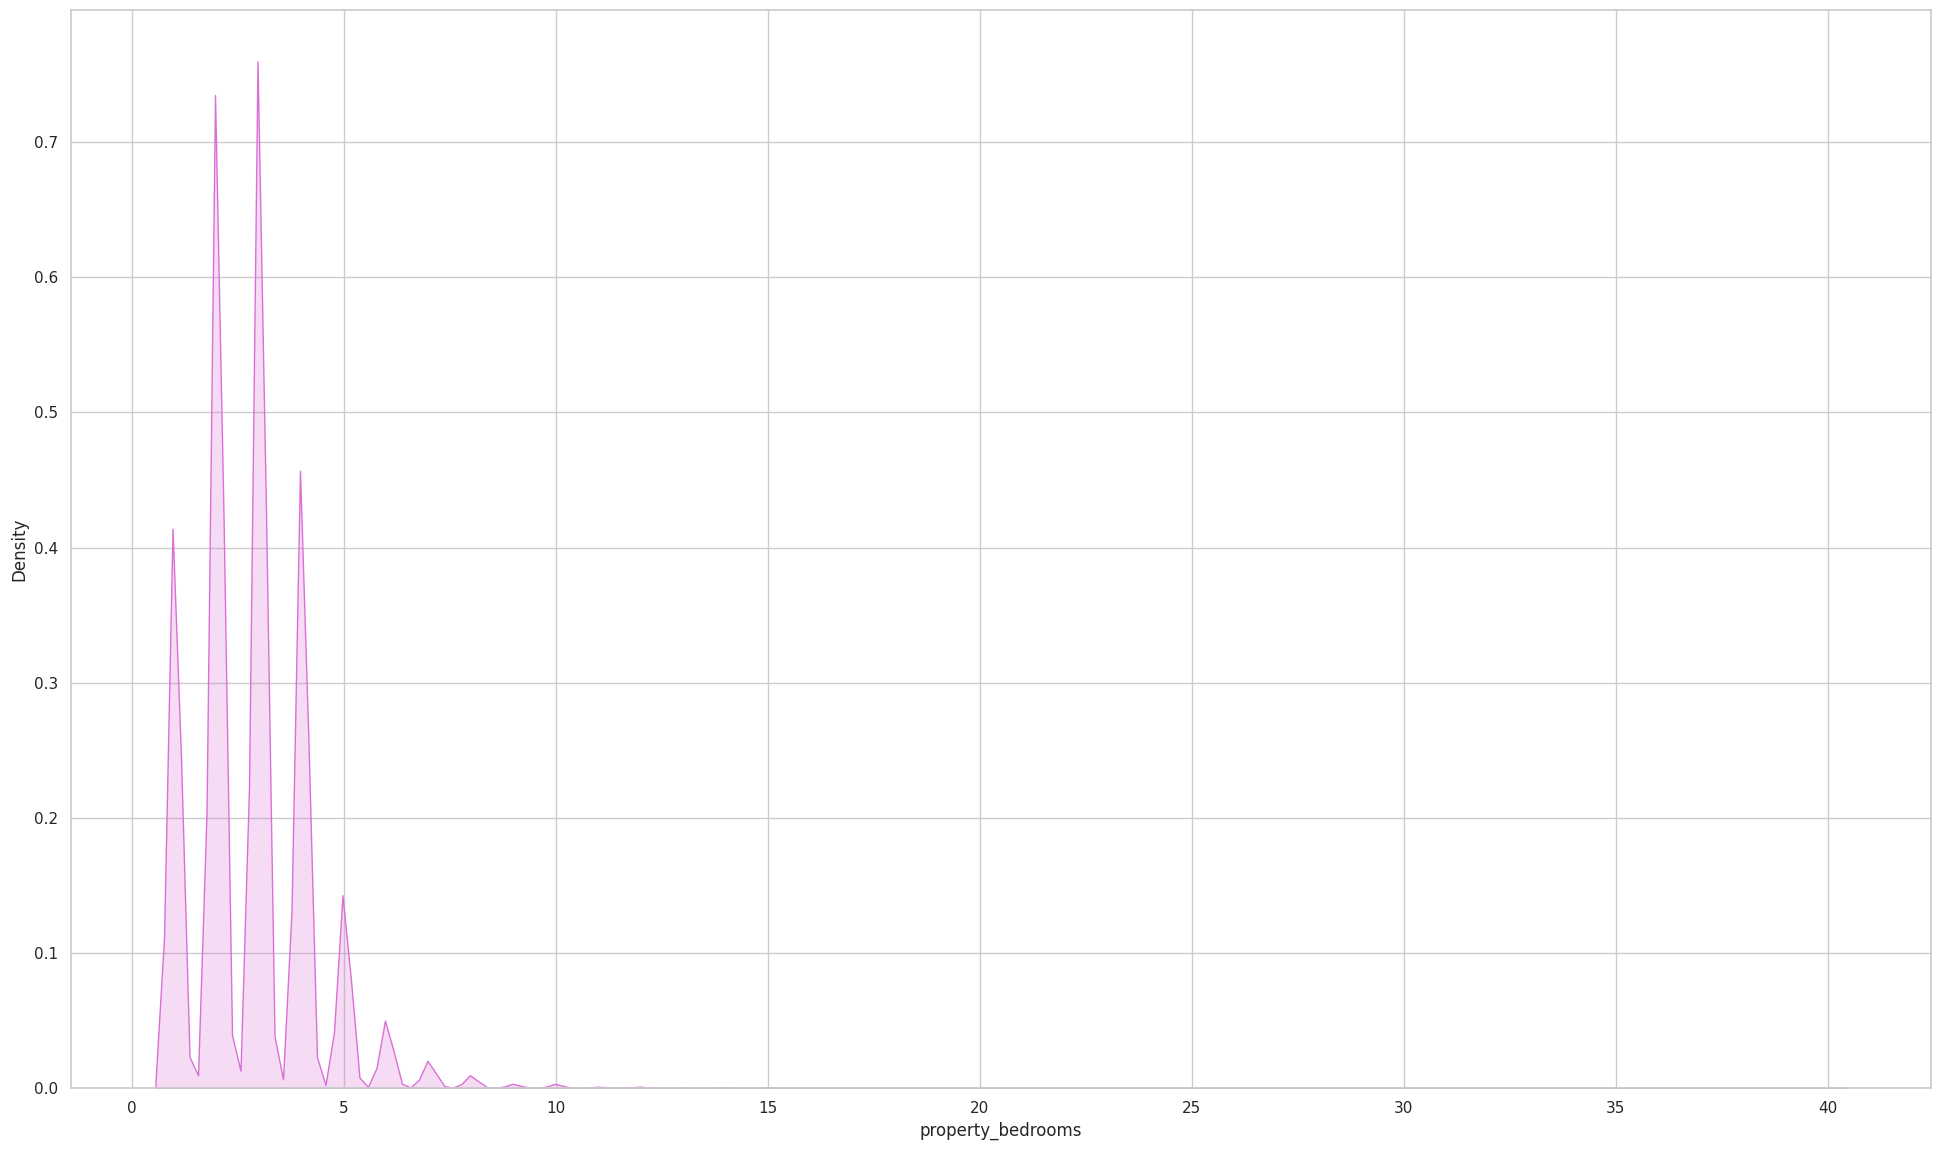

In [58]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['property_bedrooms'], shade=True, color="orchid")
plt.show()

fig = sns.kdeplot(df_filtrado['property_bedrooms'], shade=True, color="orchid")
plt.show()

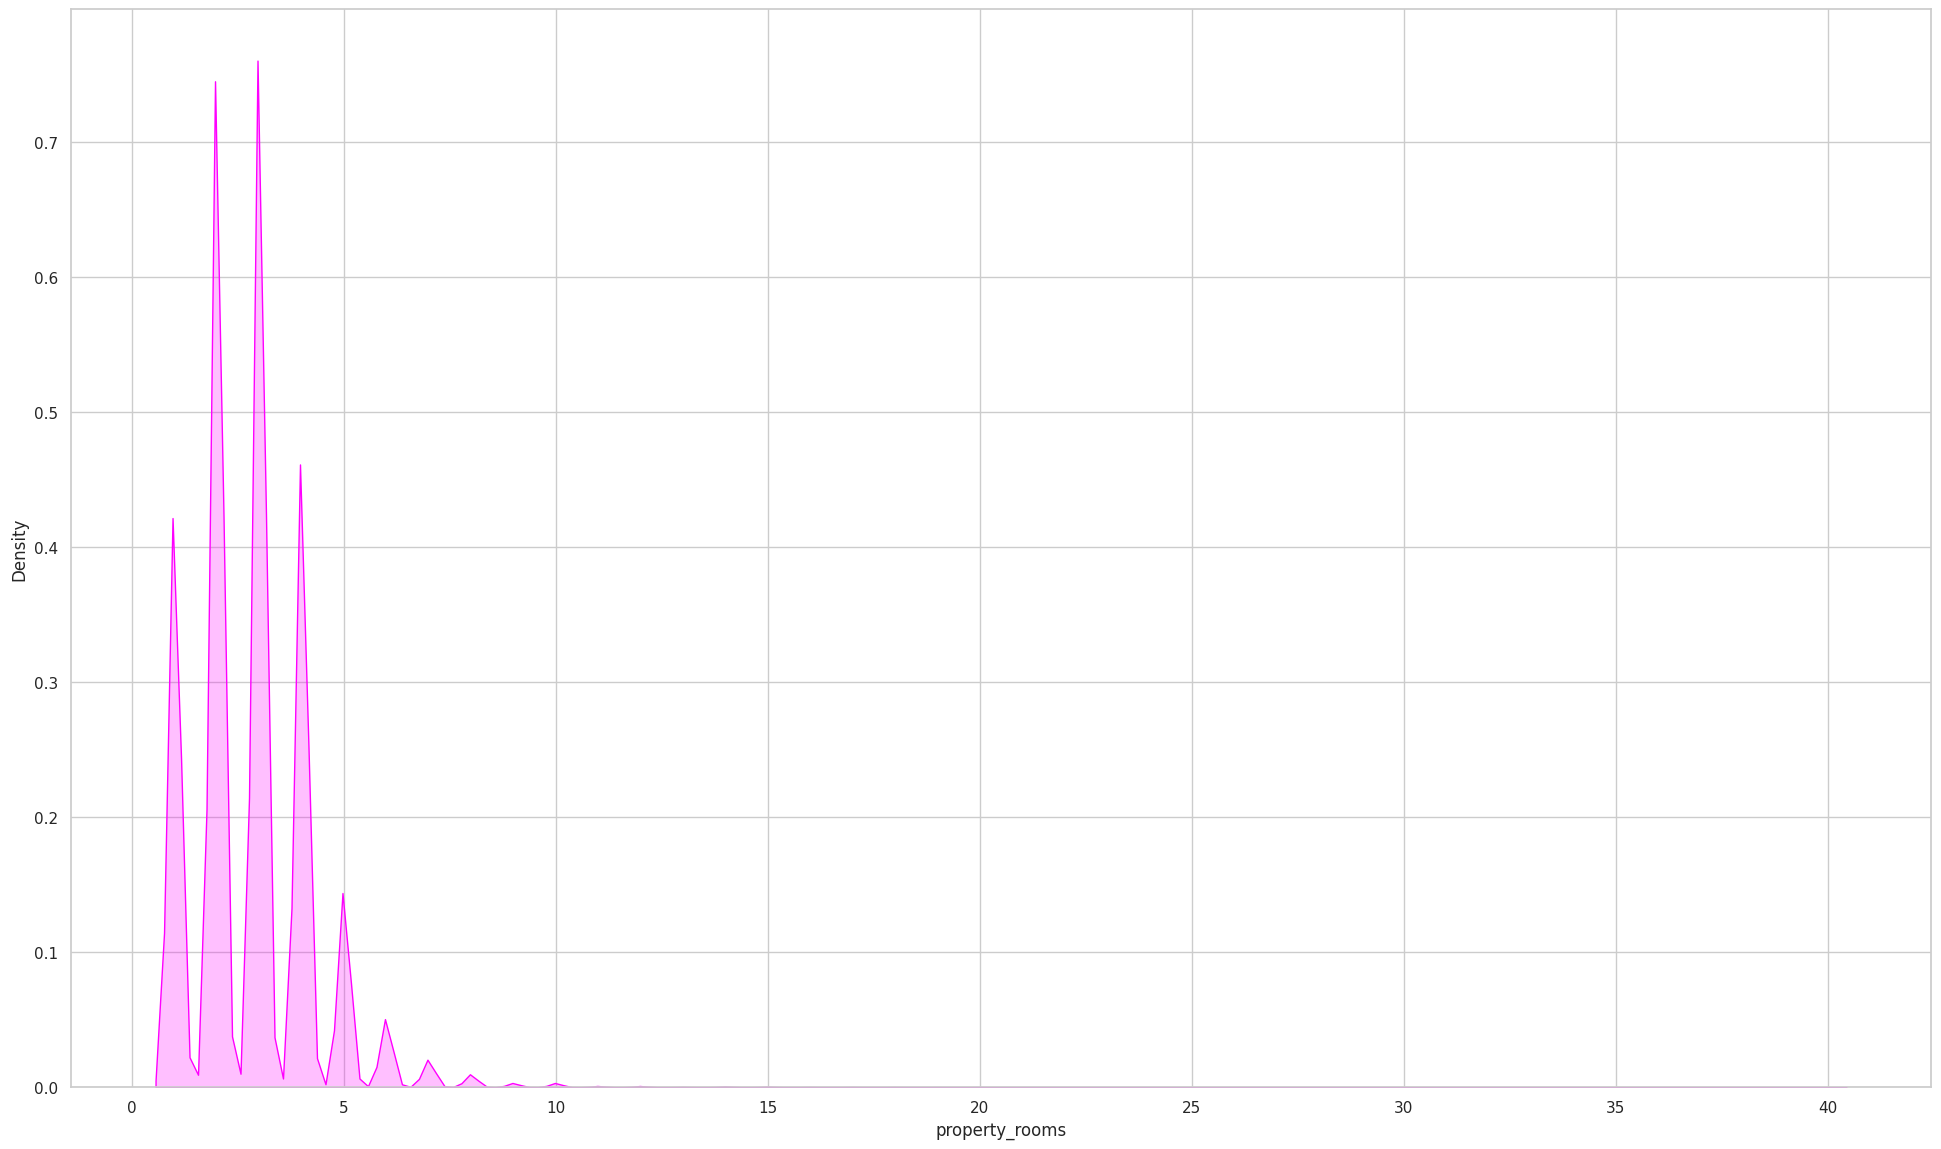

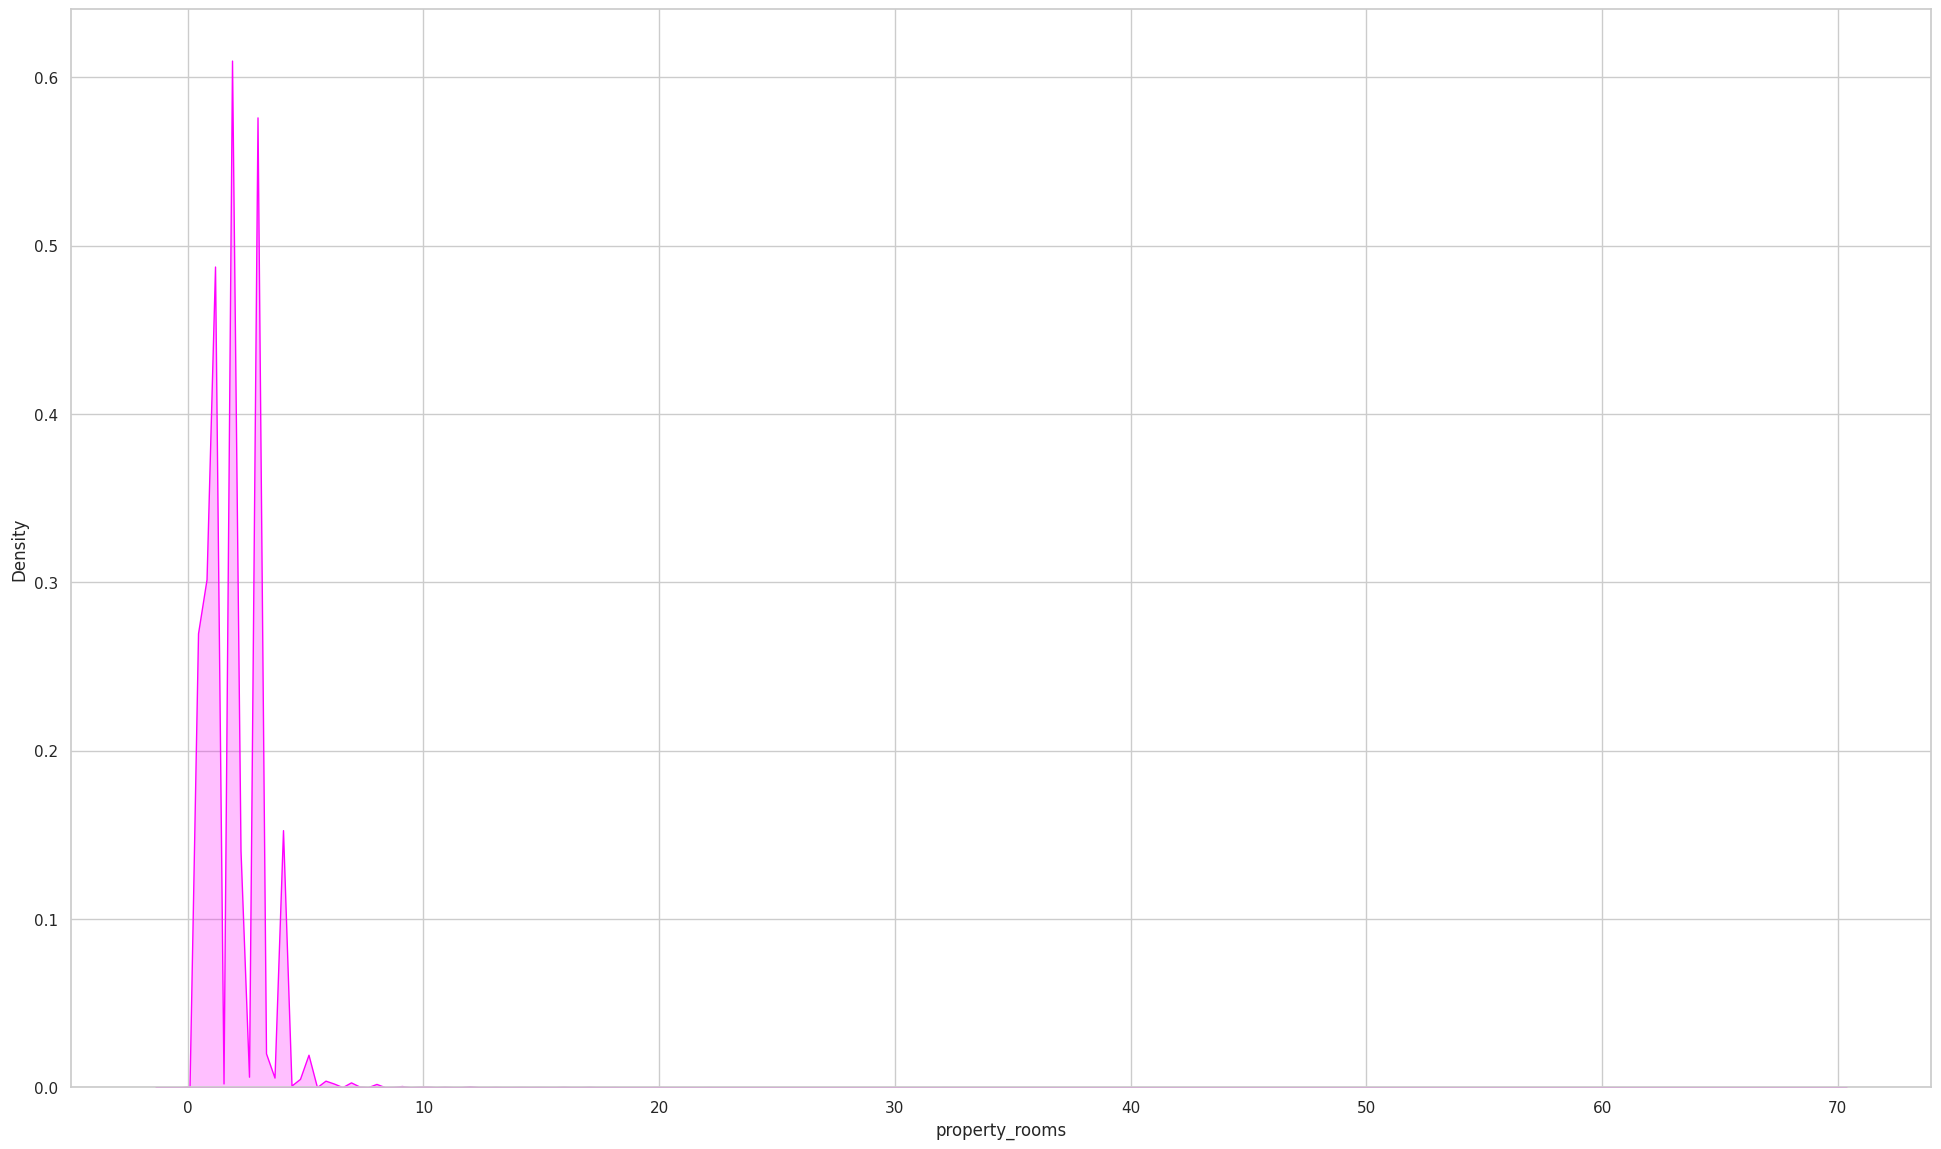

In [59]:
sns.set(style="whitegrid")

fig = sns.kdeplot(df_previo_eliminar['property_rooms'], shade=True, color="magenta")
plt.show()

fig = sns.kdeplot(df_filtrado['property_rooms'], shade=True, color="magenta")
plt.show()

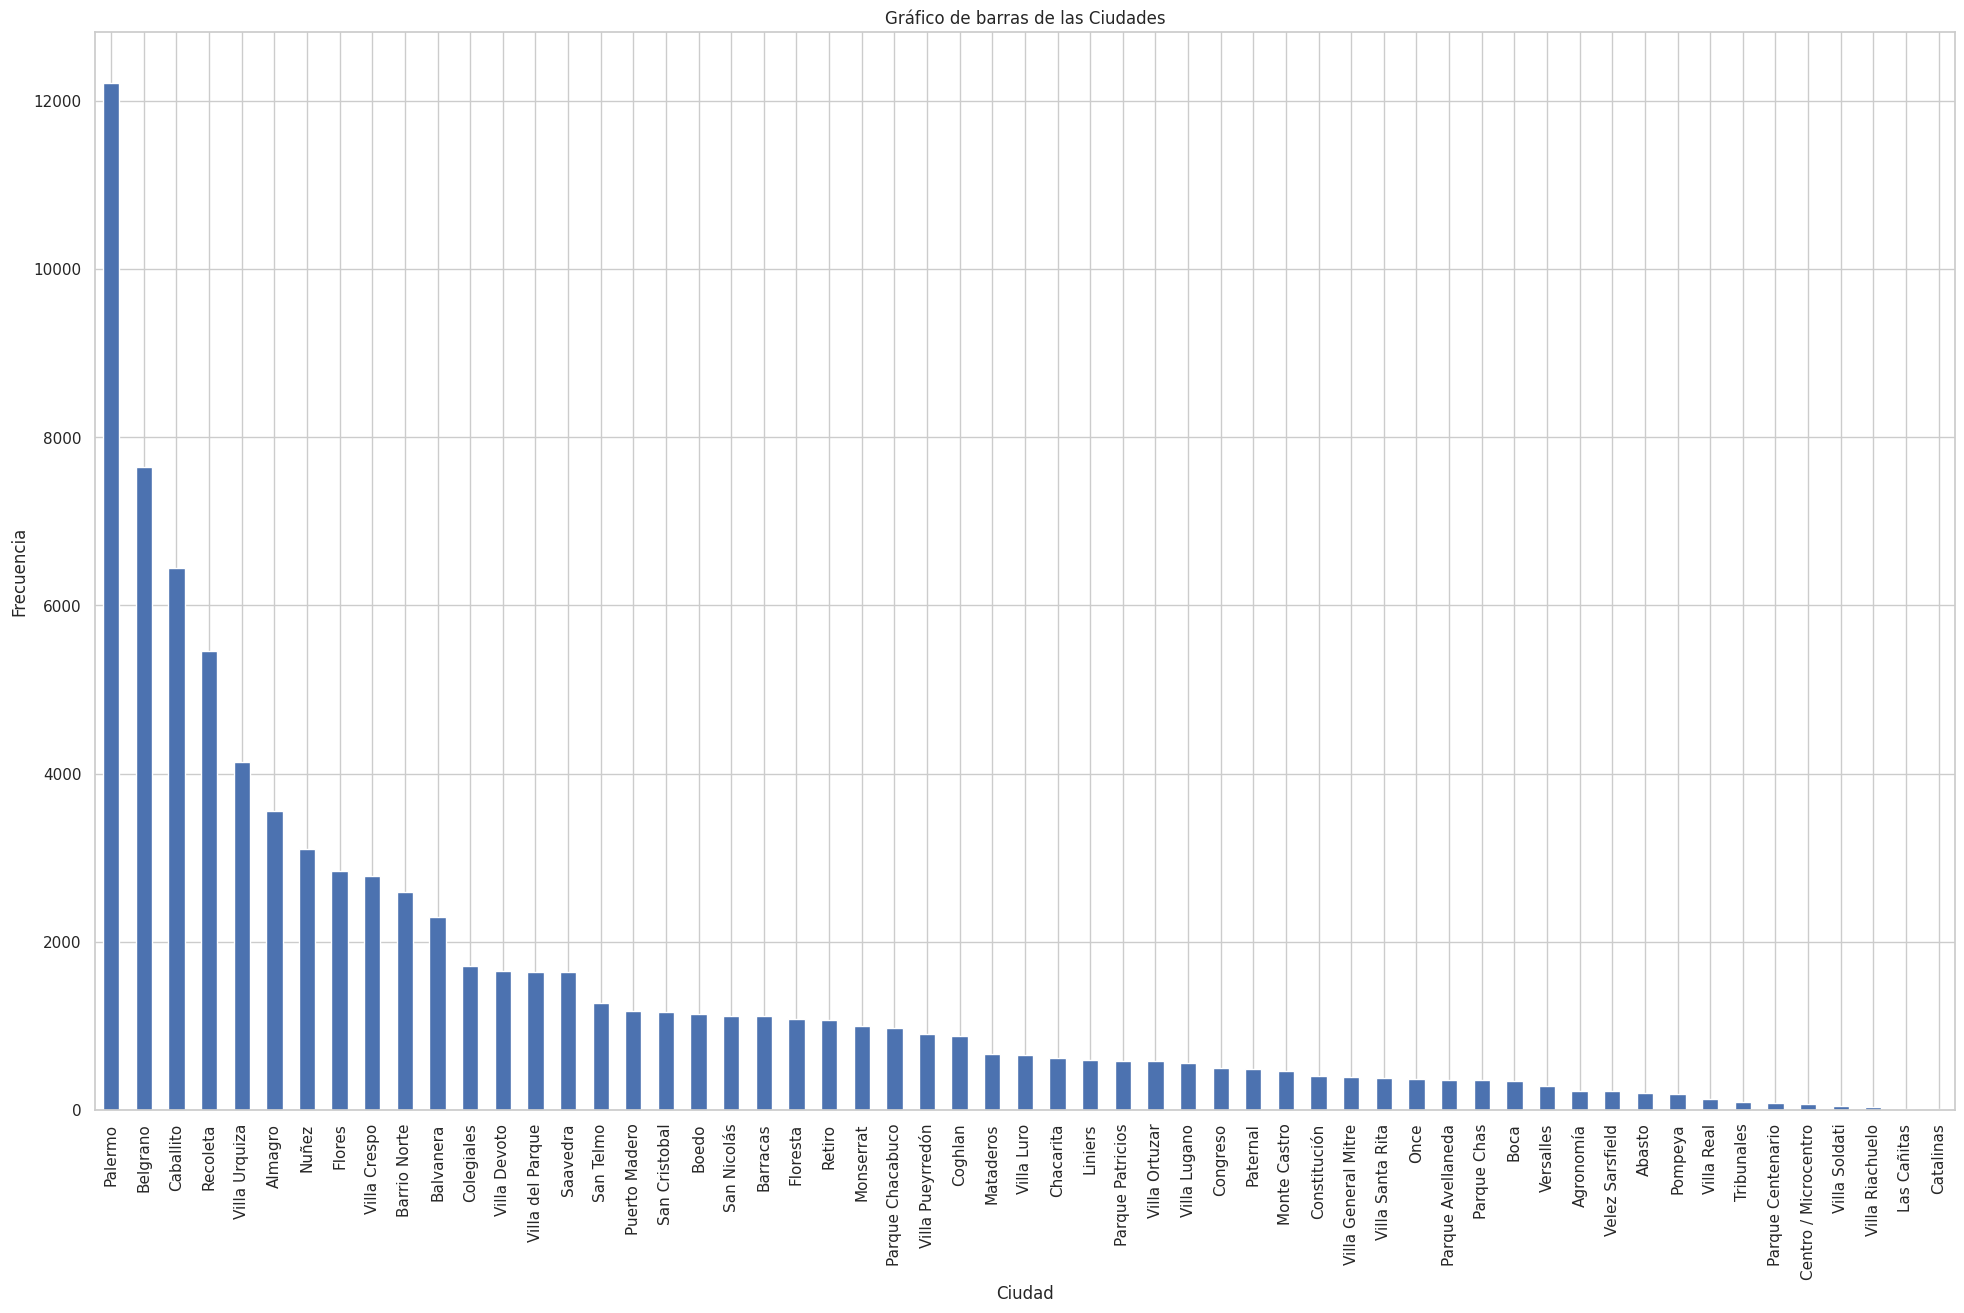

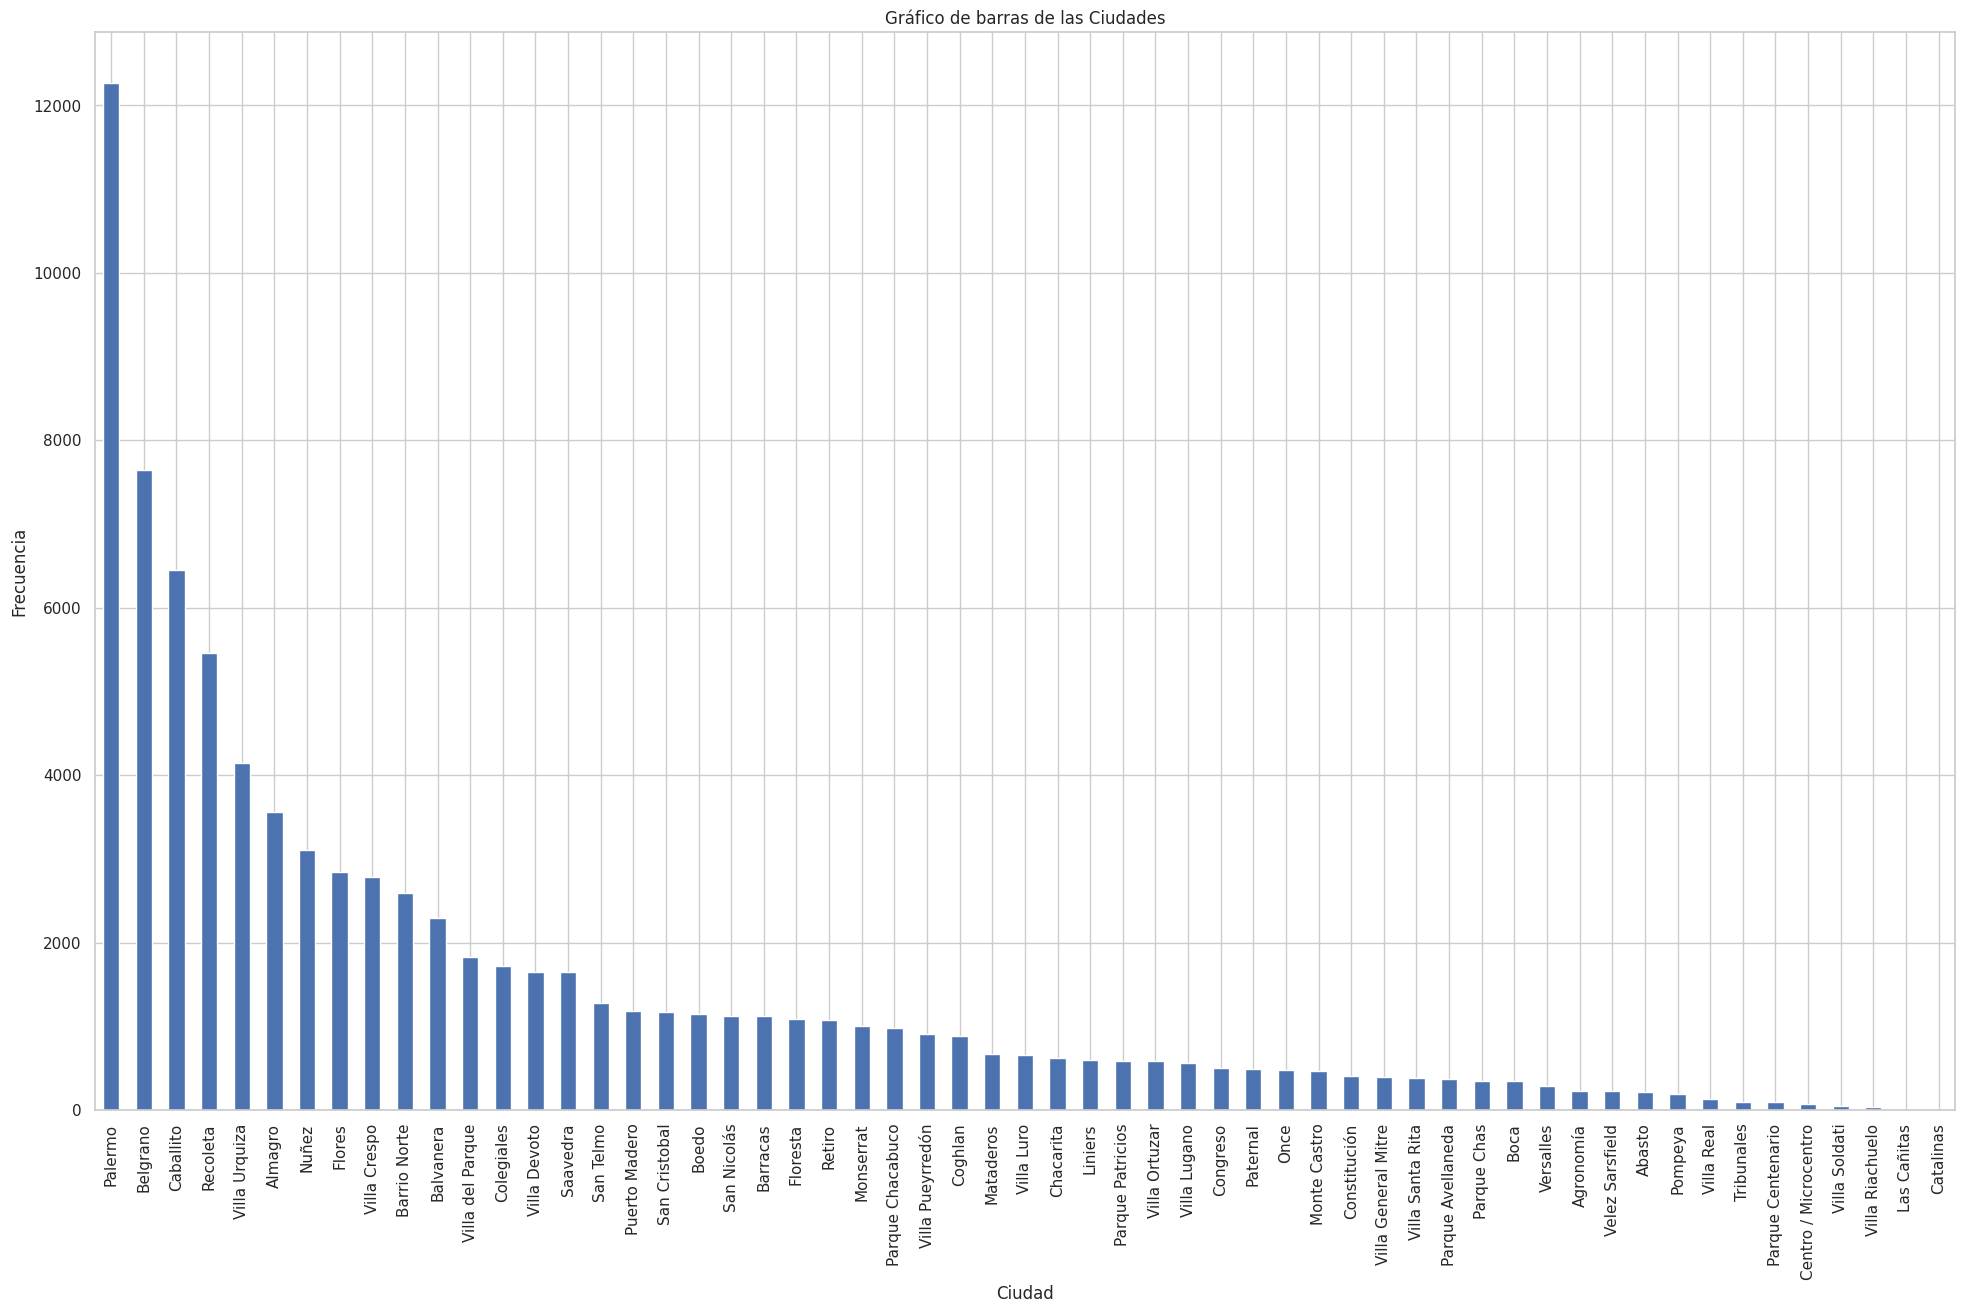

In [60]:
sns.set(style="whitegrid")

fig = df_previo_eliminar['place_l3'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras de las Ciudades" , xlabel="Ciudad" , ylabel="Frecuencia") 
plt.show()

fig = df_filtrado['place_l3'].value_counts().plot.bar(alpha=1 , title="Gráfico de barras de las Ciudades" , xlabel="Ciudad" , ylabel="Frecuencia") 
plt.show()

## Ejercicio 1c: Valores atípicos : analizar la existencia de valores atípicos

### Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.

Inicialmente se graficarán los boxplots de las variables numéricas: propery_rooms, propery_beedrooms, property_surface_total, property_surface_covered y property_price

<AxesSubplot:ylabel='property_rooms'>

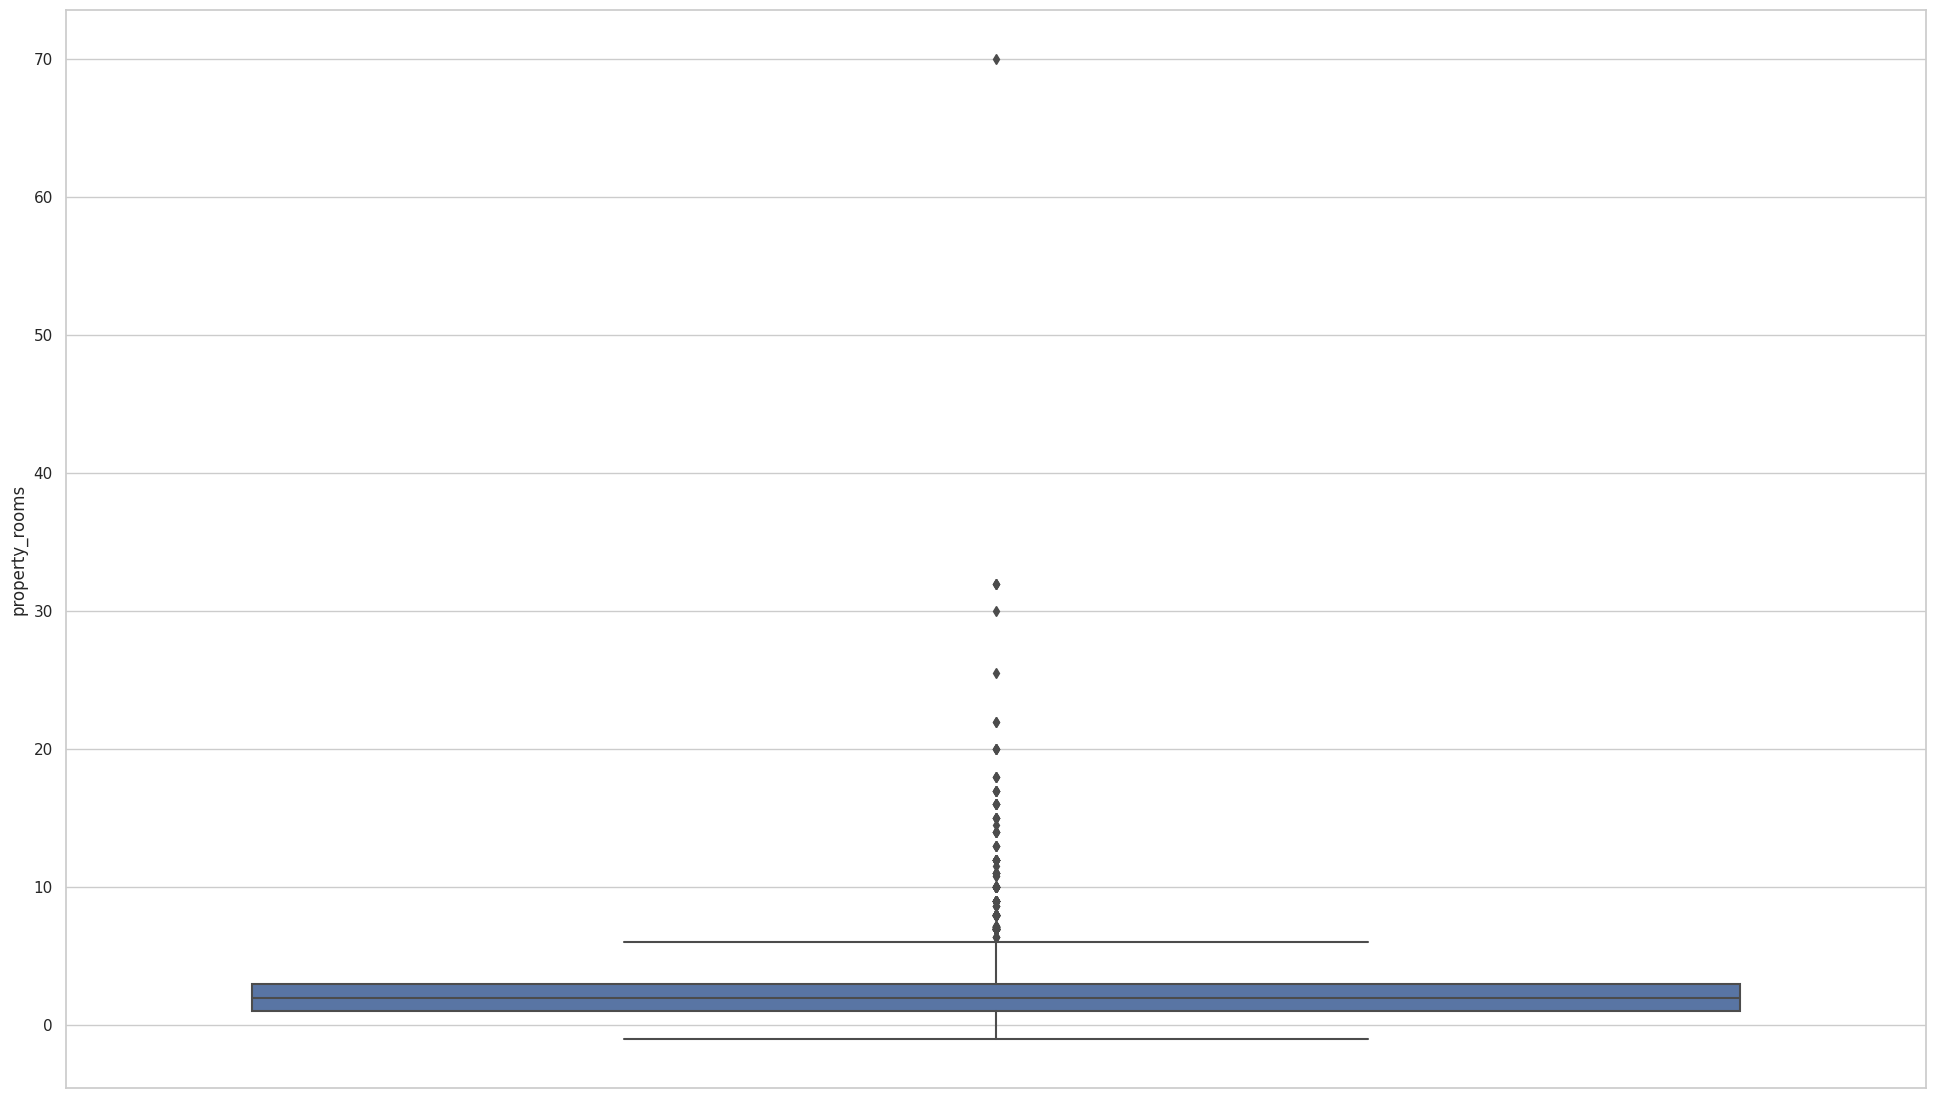

In [61]:
sns.boxplot(y=df_filtrado.property_rooms)

<AxesSubplot:ylabel='property_bedrooms'>

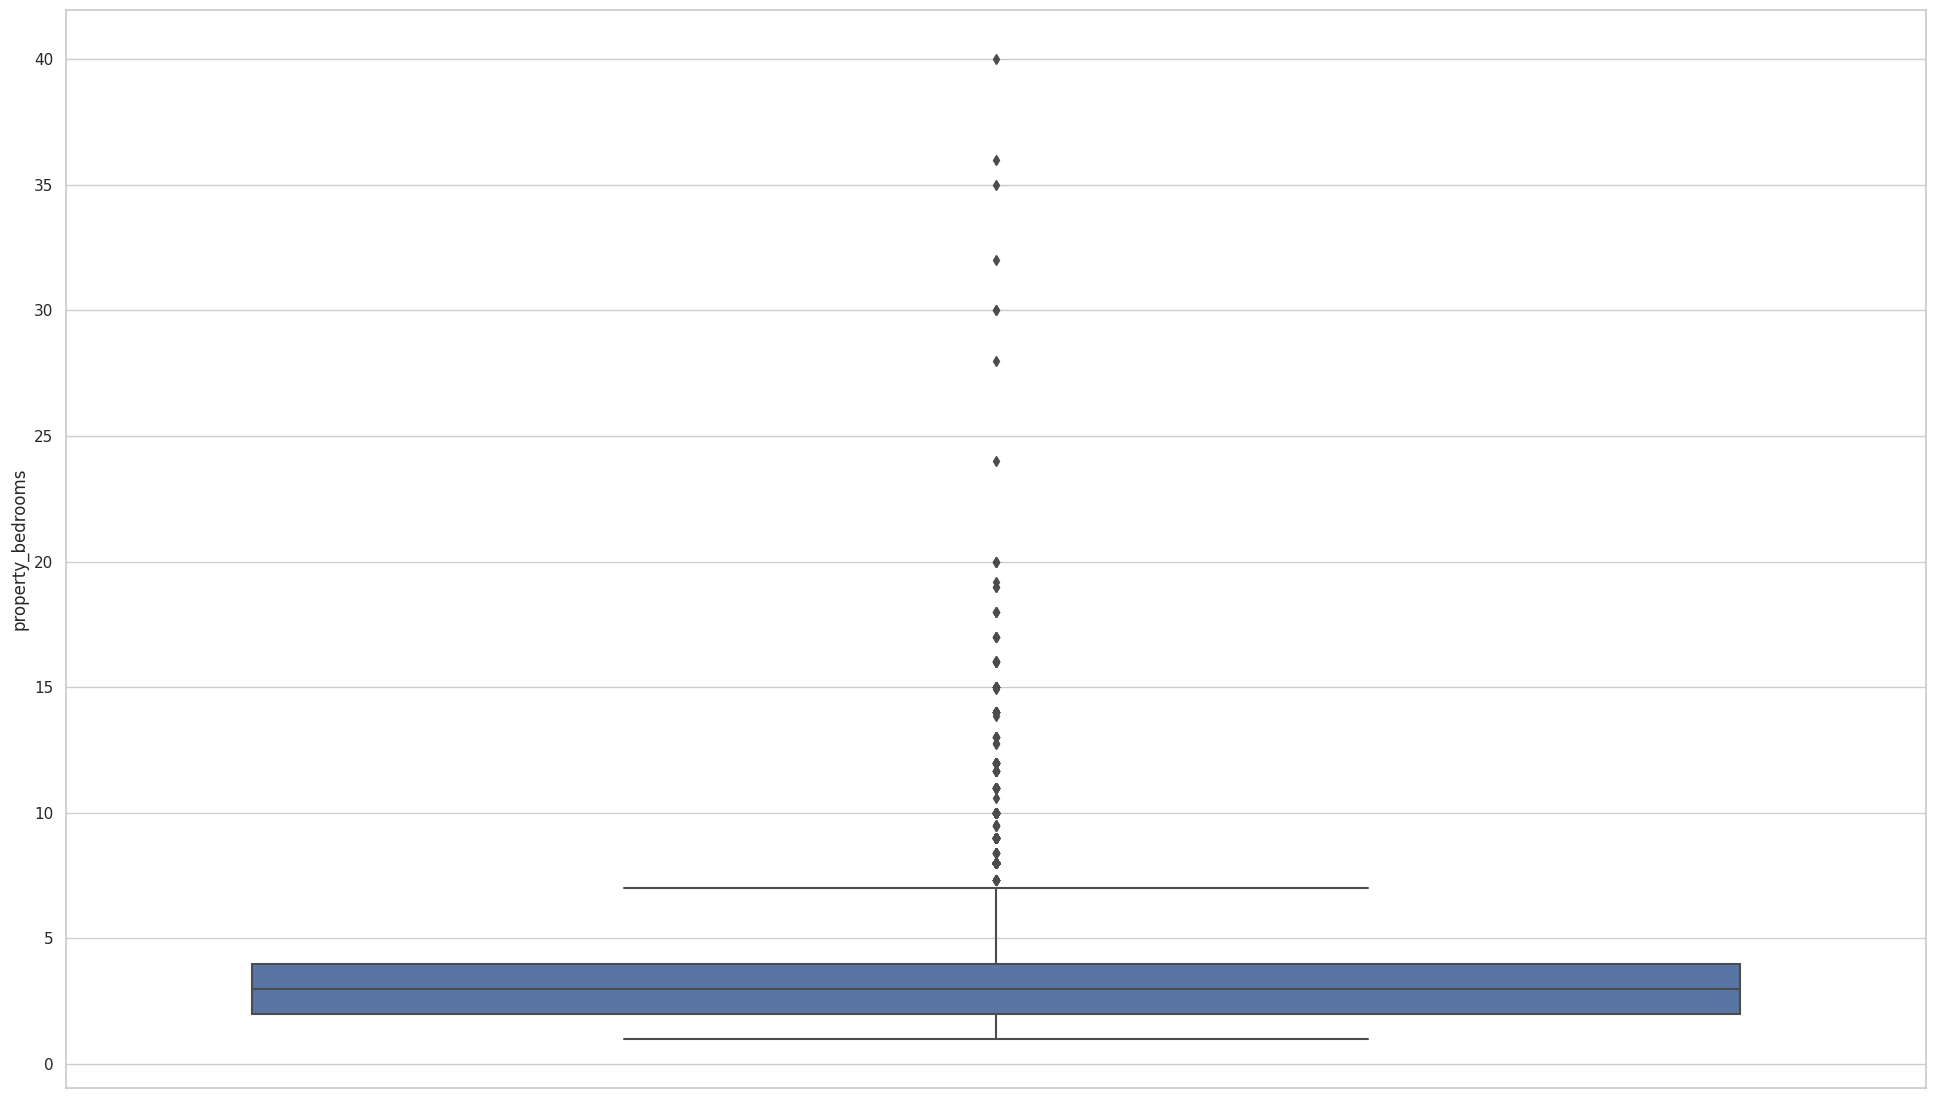

In [62]:
sns.boxplot(y=df_filtrado.property_bedrooms)

<AxesSubplot:ylabel='property_surface_total'>

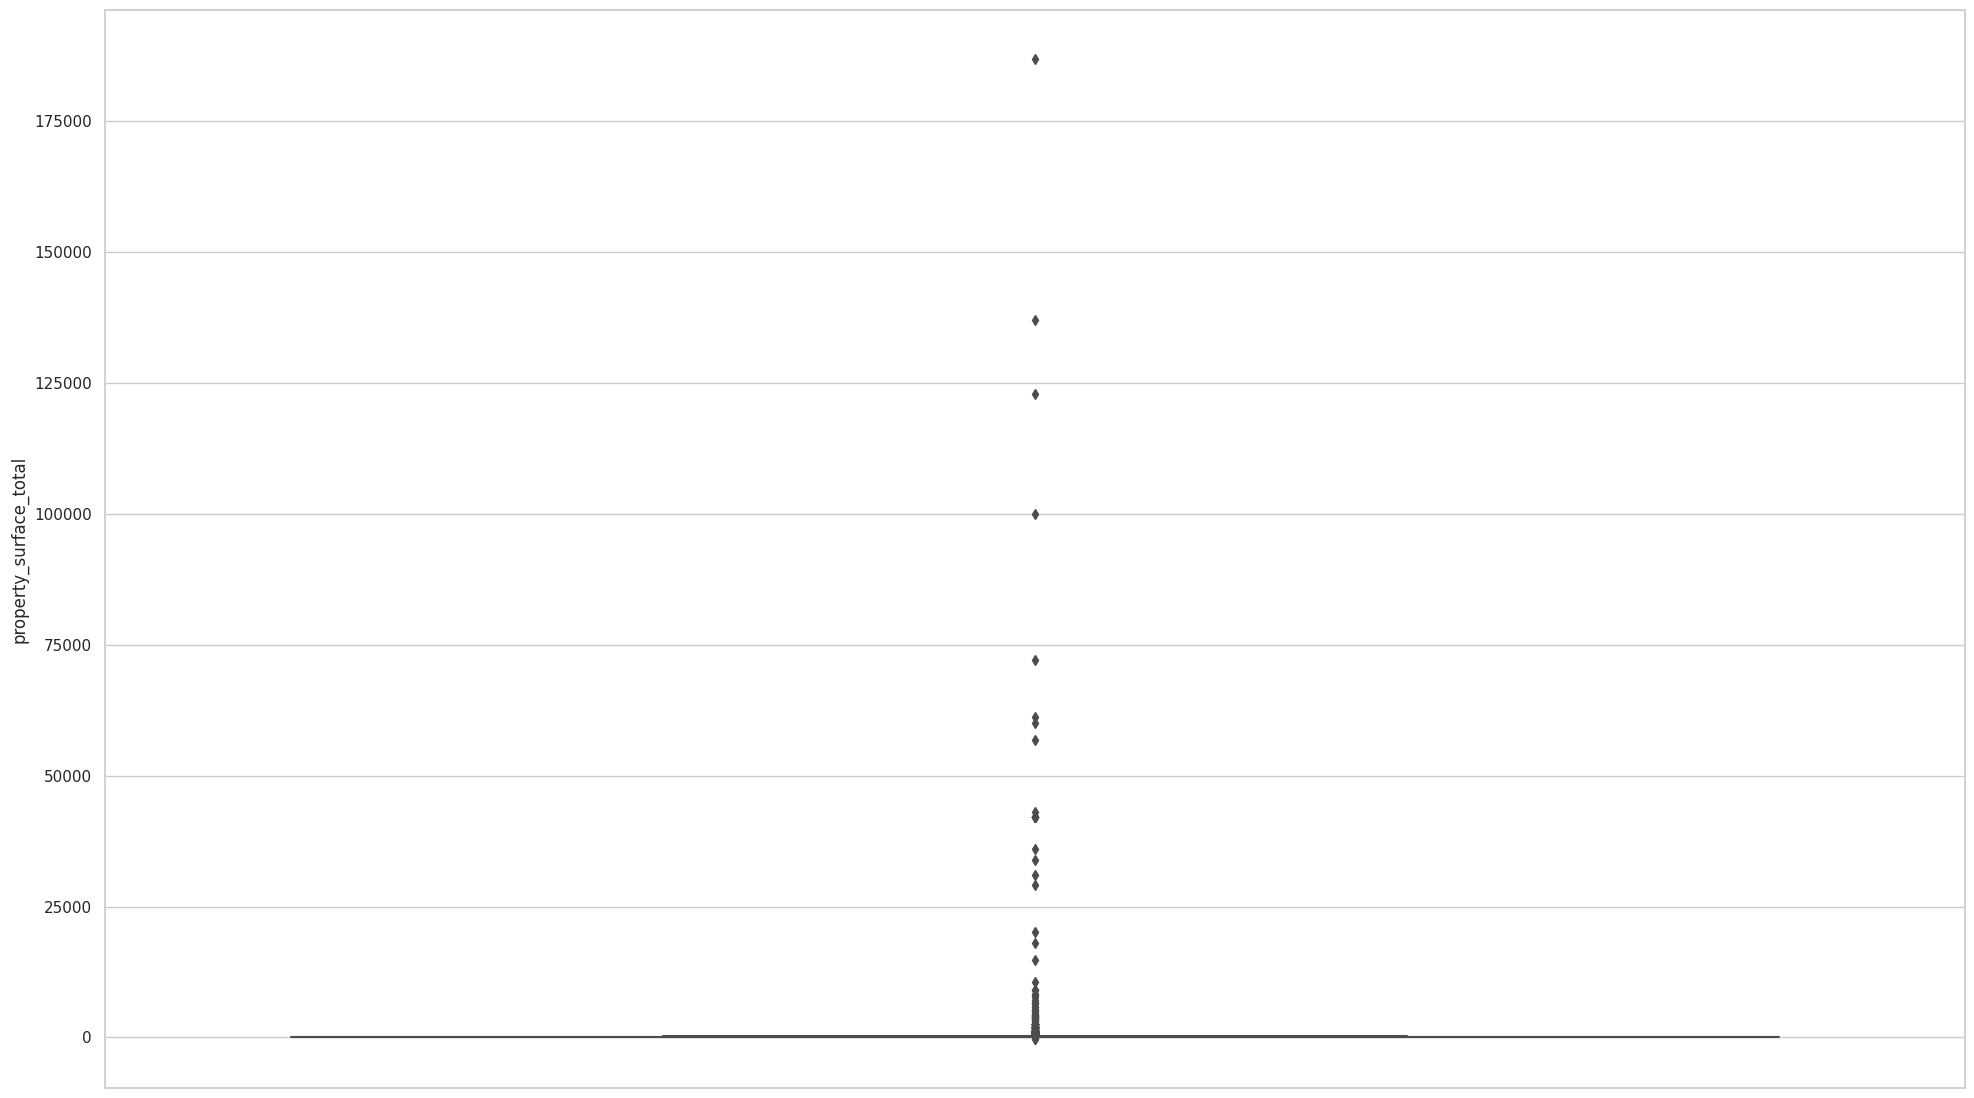

In [63]:
sns.boxplot(y=df_filtrado.property_surface_total)

<AxesSubplot:ylabel='property_surface_covered'>

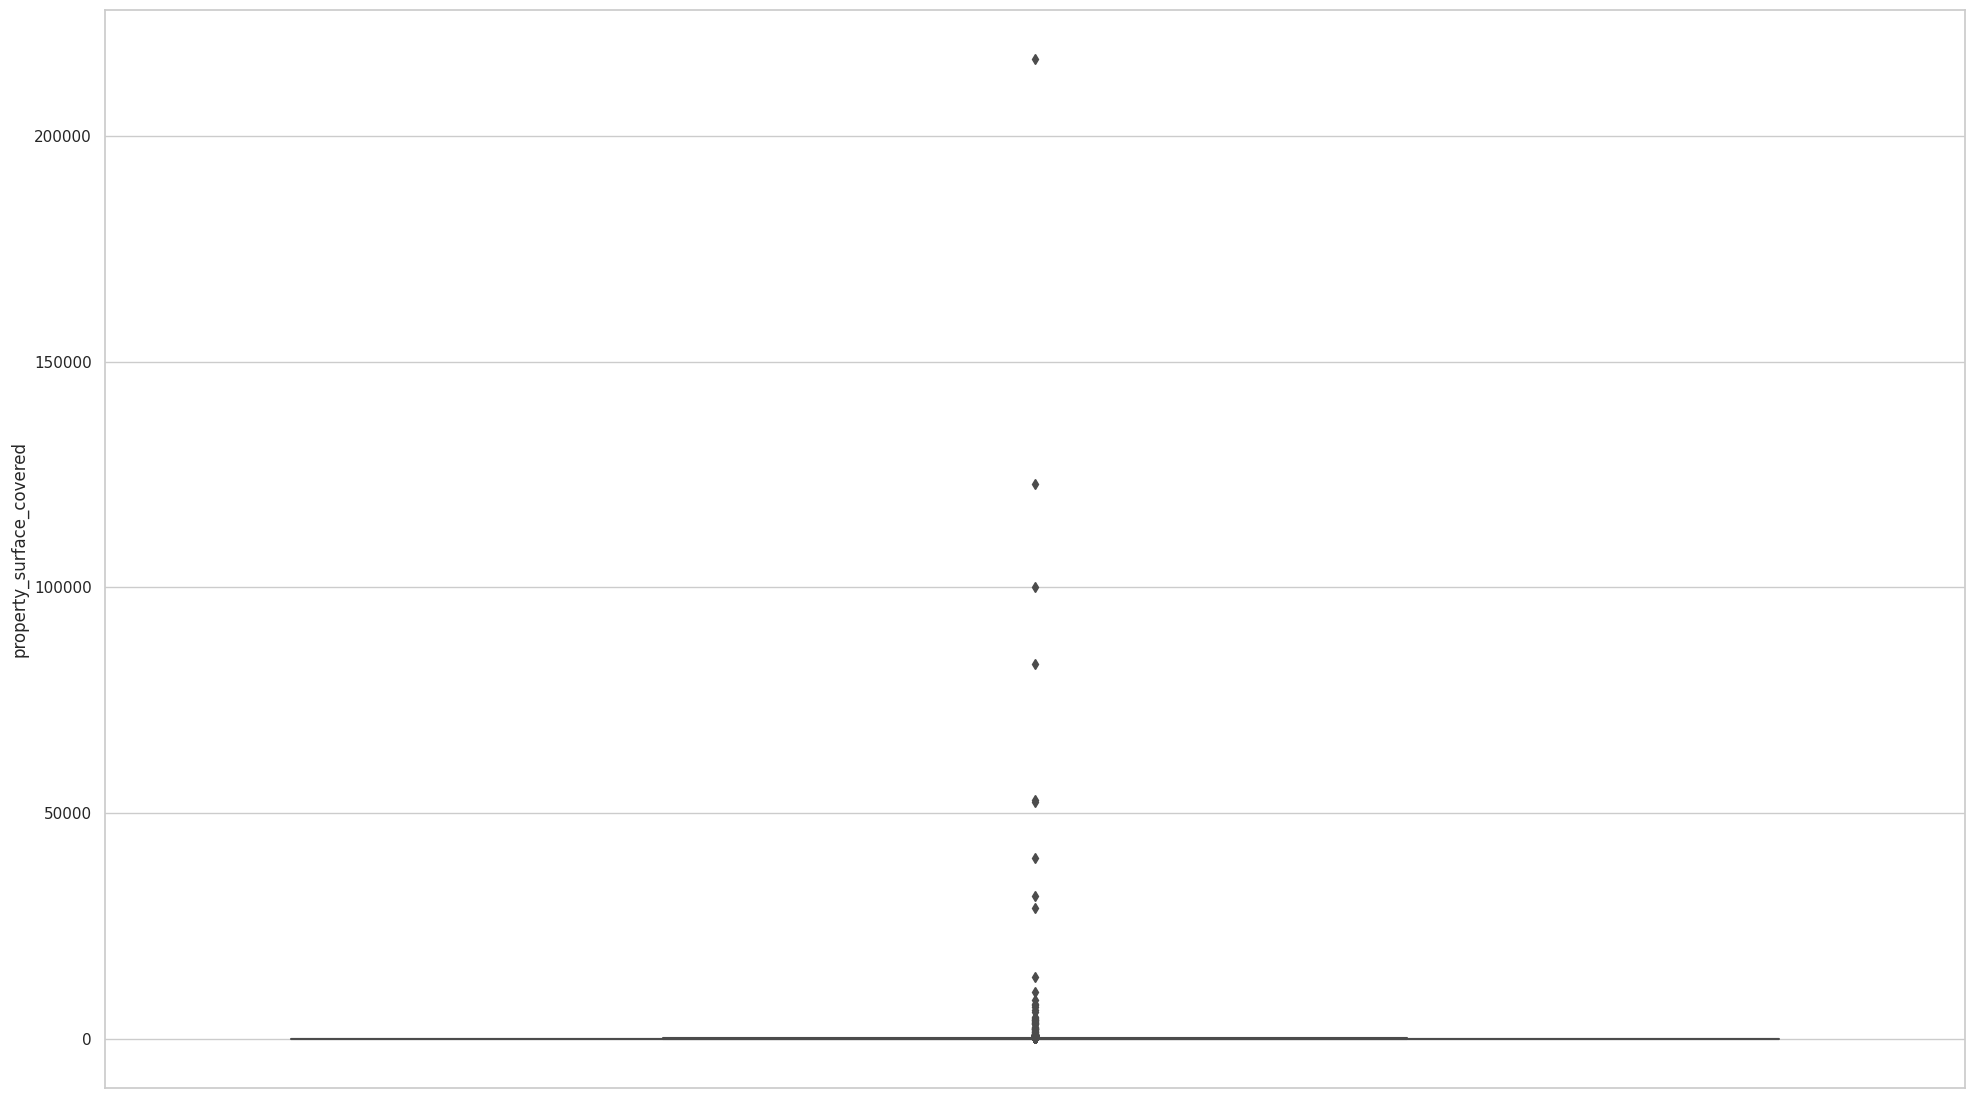

In [64]:
sns.boxplot(y=df_filtrado.property_surface_covered)

<AxesSubplot:ylabel='property_price'>

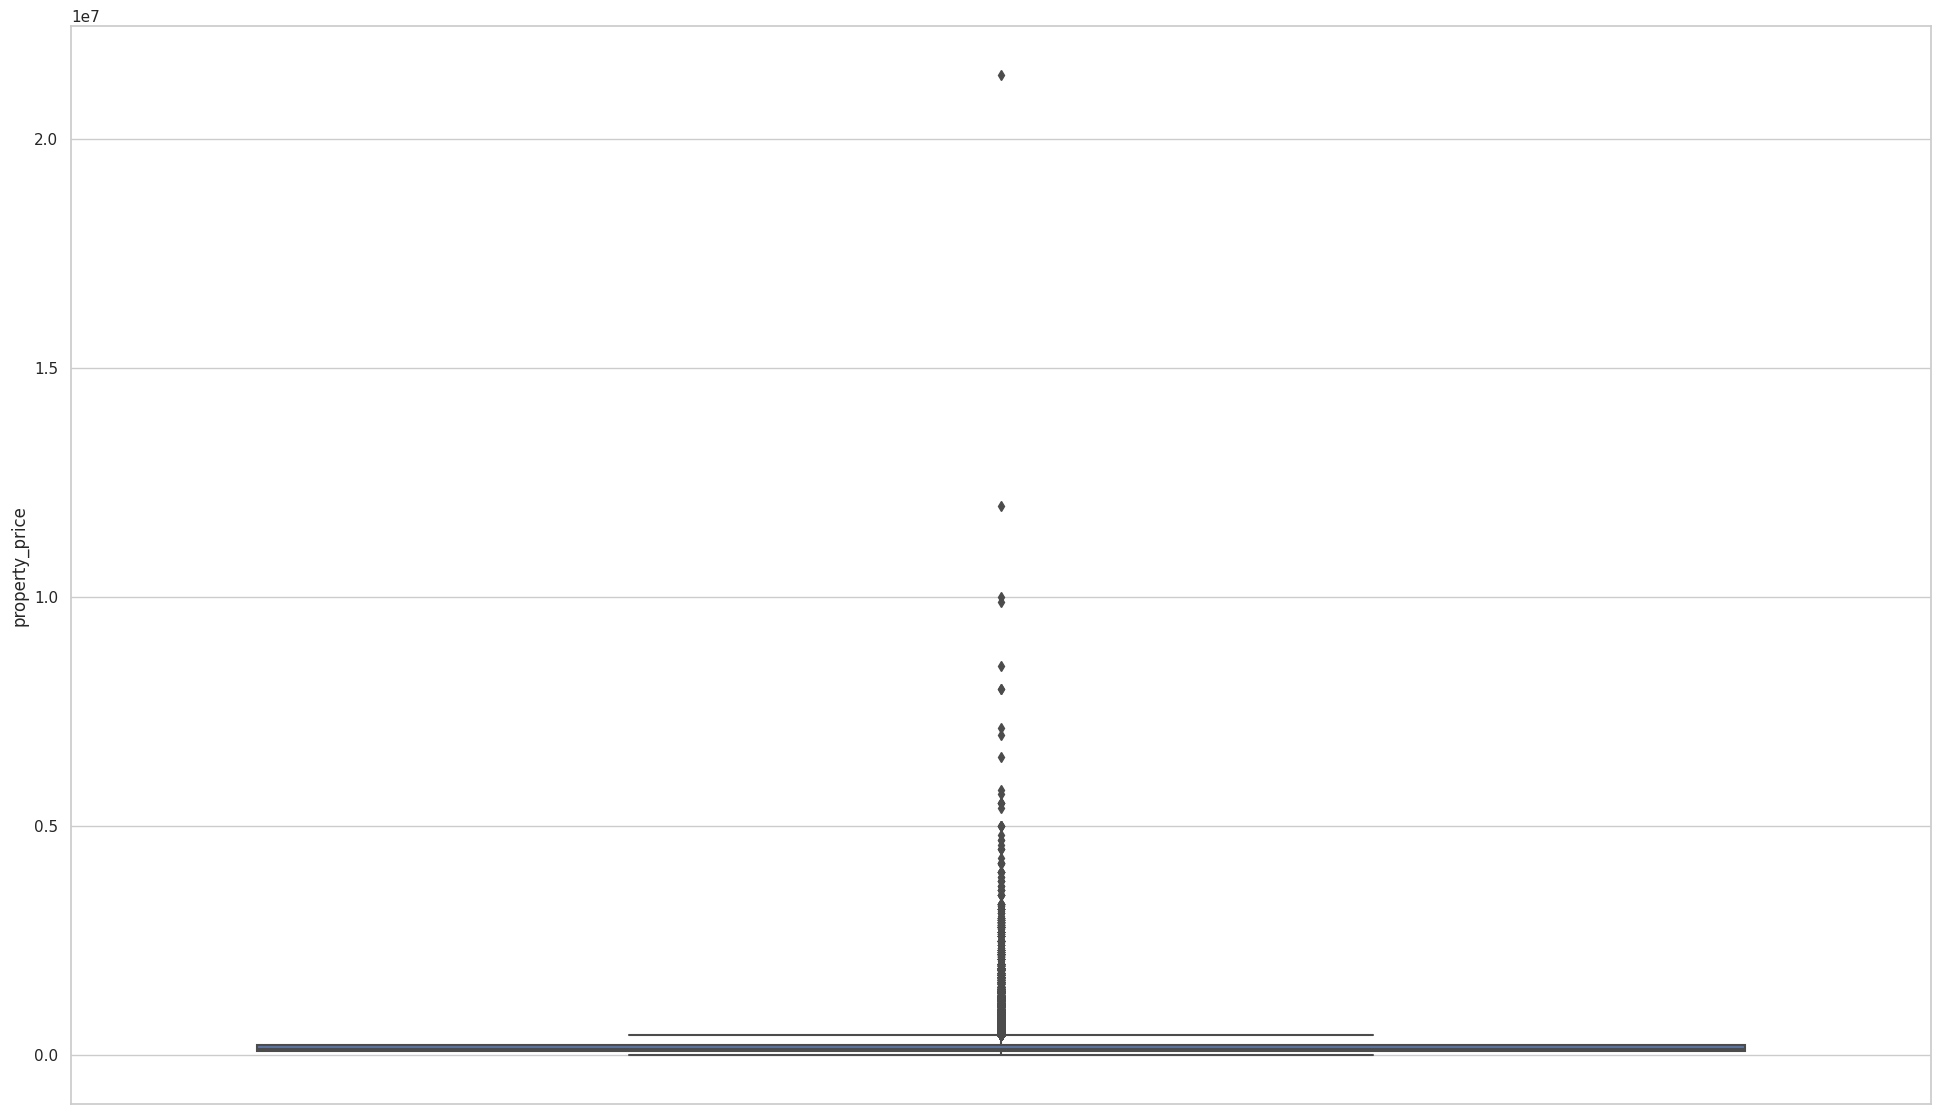

In [65]:
sns.boxplot(y=df_filtrado.property_price)
#(df[['property_price']] <= 0).any().to_frame('Precio menor a 0?')
#df[df['property_price'] <= 0].head()

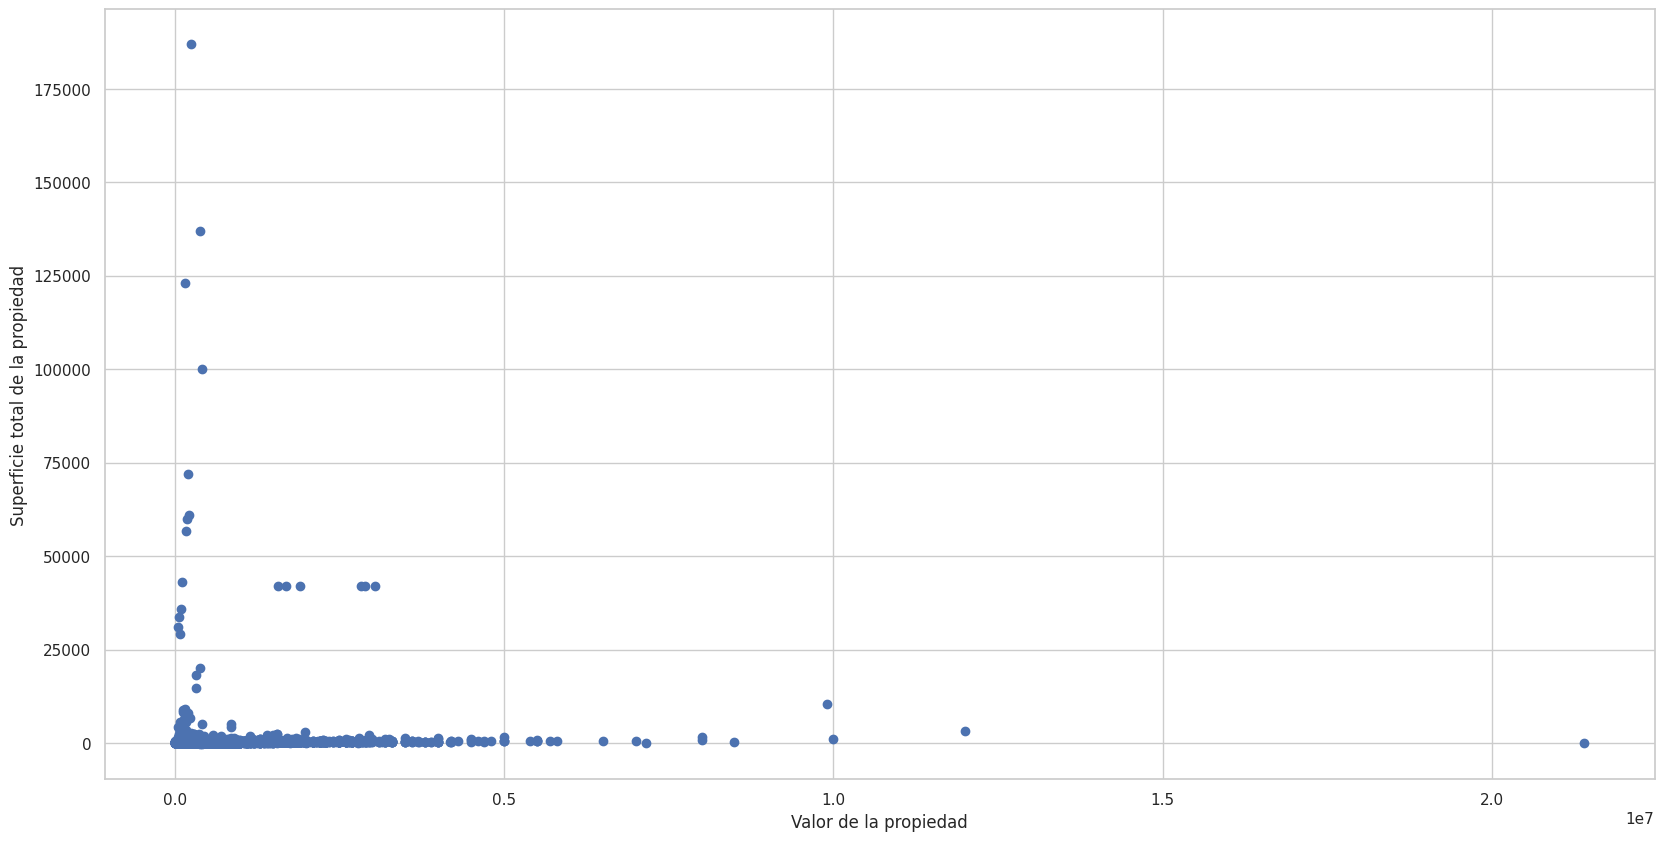

In [66]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(x=df_filtrado.property_price, y=df_filtrado.property_surface_total)

ax.set_xlabel('Valor de la propiedad')
ax.set_ylabel('Superficie total de la propiedad')
plt.show()

En base a los boxplots mostrados, se observan que las 5 variables numéricas, tienen candidatos a datos anómalas. A su vez, en el scatterplot se muestra el valor de la propiedad con la superficie, observando que en varios casos tiene datos que son anormales

Para un mejor análisis, se aplicarán las técnicas de Z-Score y Z-Score modificado:

In [67]:
zscore = pd.DataFrame()
zscore['z_rooms']=st.zscore(df_filtrado.property_rooms)
zscore['z_bedrooms']=st.zscore(df_filtrado.property_bedrooms)
zscore['z_surface_total'] = st.zscore(df_filtrado.property_surface_total)
zscore['z_surface_covered'] = st.zscore(df_filtrado.property_surface_covered)
zscore['z_price'] = st.zscore(df_filtrado.property_price)
zscore


,z_rooms,z_bedrooms,z_surface_total,z_surface_covered,z_price
0,0.972590,0.826713,0.052282,0.043970,-0.015927
1,0.119708,0.124628,-0.044208,-0.031260,-0.460336
2,0.972590,0.826713,-0.033961,-0.016793,-0.404042
3,0.119708,0.826713,0.021809,0.016000,-0.239705
4,0.119708,0.826713,-0.002877,-0.013899,0.123934
...,...,...,...,...,...
82974,0.972590,0.826713,0.017272,0.012142,0.019038
82975,0.119708,0.124628,-0.035669,-0.026438,-0.187257
82976,-0.733175,-1.279542,-0.050185,-0.055373,-0.486211
82977,-0.733175,-1.279542,-0.062140,-0.054408,-0.489707


Analisis individual de cada uno:

In [68]:
df_filtrado[df_filtrado.property_rooms < 1]

,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
37,-34.563673,-58.480740,Coghlan,NaN,Departamento,0.521117,1.0,22.0,22.0,54000.0,Departamento - Coghlan
39,-34.557920,-58.478867,Coghlan,NaN,Departamento,0.521133,1.0,39.0,36.0,79900.0,Monoambiente con COCHERA y BALCÓN - Oportunidad
50,-34.580855,-58.426926,Palermo,NaN,Departamento,0.516960,1.0,35.0,35.0,80000.0,Divino Monoambiente en Palermo
56,-34.589197,-58.422700,Palermo,NaN,Departamento,0.517012,1.0,32.0,28.0,99000.0,MODERNO MONOAMBIENTE CON BALCÓN EN PALERMO
61,-34.584511,-58.426418,Palermo,Palermo Hollywood,Departamento,0.516993,1.0,34.0,34.0,89500.0,Venta Monoambiente a Estrenar en Palermo Holly...
...,...,...,...,...,...,...,...,...,...,...,...
82907,-34.586885,-58.451932,Chacarita,NaN,Departamento,0.521999,1.0,36.0,28.0,74562.0,1 AMB CON BALCON AL CONTRAFRENTE - EN CONSTRUC...
82933,-34.594158,-58.443106,Villa Crespo,NaN,Departamento,0.511261,1.0,38.0,33.0,105000.0,Excelente Dpto. con balcón a estrenar- Villa C...
82945,-34.620094,-58.388173,Constitución,NaN,Departamento,0.520576,1.0,41.0,36.0,82000.0,RETASADO!!! - U$S 82.000 - 1 amb Divisible - C...
82967,-34.571806,-58.479139,Villa Urquiza,NaN,Departamento,0.507513,1.0,38.0,32.0,85000.0,Departamento monoambiente a estrenar con ampli...


In [69]:
df_filtrado[df_filtrado.property_bedrooms < 1]

,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


In [70]:
df_filtrado[df_filtrado.property_bedrooms > df_filtrado.property_rooms]

,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.589971,-58.459118,Palermo,NaN,Casa,3.000000,4.0,171.000000,133.0,210000.0,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
1,-34.637319,-58.361124,Boca,NaN,Departamento,2.000000,3.0,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO
2,-34.628647,-58.361871,Boca,NaN,Departamento,3.000000,4.0,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur
3,-34.610027,-58.401934,Once,NaN,Departamento,2.000000,4.0,135.313113,104.0,146000.0,Venta departamento 4 ambientes Once
4,-34.631621,-58.416825,Boedo,NaN,PH,2.000000,4.0,106.403032,73.0,250000.0,PH - Boedo
...,...,...,...,...,...,...,...,...,...,...,...
82972,-34.636285,-58.400321,Parque Patricios,NaN,Departamento,2.000000,3.0,66.000000,64.0,130000.0,Atractivo depto en el edificio histórico del P...
82973,-34.627761,-58.391272,Parque Patricios,NaN,Departamento,0.515747,1.0,39.000000,35.0,76000.0,Departamento - Parque Patricios
82974,-34.603245,-58.489810,Villa del Parque,NaN,Departamento,3.000000,4.0,130.000000,100.0,220000.0,Espectacular 4 amb130m2 con Balcon Terraza!!!
82975,-34.614063,-58.482814,Villa del Parque,NaN,Departamento,2.000000,3.0,68.000000,60.0,161000.0,3 ambientes con cochera listo para habitar!


In [71]:
df_filtrado[df_filtrado.property_surface_total <= 0]

,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
2139,-41.163826,-71.438923,Villa del Parque,NaN,Casa,3.0,4.110922,-259.820478,100.0,410000.0,BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...
30077,-41.164123,-71.415420,Villa del Parque,NaN,Casa,2.0,3.000000,-305.228283,70.0,380000.0,"HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C..."


In [72]:
df_filtrado[df_filtrado.property_surface_covered <= 0]

,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
92,-34.557302,-58.468573,Belgrano,NaN,Departamento,1.0,1.0,25.0,-1.237632,100000.0,Loft monoambiente de diseño y balcon a estrenar!!
2146,-34.601931,-58.411260,Abasto,NaN,Departamento,1.0,1.0,18.0,-1.689634,38000.0,Departamento - Abasto
34352,-34.543864,-58.461433,Nuñez,NaN,Departamento,2.0,1.0,34.0,-2.056642,80735.0,Departamento - Nuñez


In [73]:
df_filtrado[df_filtrado.property_surface_total <= 0]

,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
2139,-41.163826,-71.438923,Villa del Parque,NaN,Casa,3.0,4.110922,-259.820478,100.0,410000.0,BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...
30077,-41.164123,-71.415420,Villa del Parque,NaN,Casa,2.0,3.000000,-305.228283,70.0,380000.0,"HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C..."


In [74]:
df_filtrado[df_filtrado.property_price <= 0]

,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title


## Ejercicio 1d: Datos Faltantes : analizar la presencia de datos faltantes en el dataset

### Reducción de la dimensionalidad: en este punto se pide crear un nuevo dataset que resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al finalizar el prepocesamiento.

In [75]:
df_filtrado.dtypes

latitud                     float64
longitud                    float64
place_l3                     object
place_l4                     object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_title               object
dtype: object

PCA

In [76]:
columnas_elegidas = ['latitud', 'longitud', 'property_rooms', 
                    'property_bedrooms', 'property_surface_total', 
                    'property_surface_covered', 'property_price'] # ELIMINAR COMENTARIO: SOLO AGARRO VARIABLES CUANTITATIVAS?
x = df_filtrado.loc[:, columnas_elegidas].values 
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3) # n_components cantidad de columnas a las que se va a reducir
x_transformado = pca.fit_transform(x)
pca_df_aux = pd.DataFrame(data = x_transformado, 
                          columns= ['cp_1', 'cp_2','cp_3'])

pca.explained_variance_ratio_

array([0.32653895, 0.24327082, 0.17640853])

Nos queda el 74,7%

In [77]:
pca.get_covariance()

array([[ 8.38917665e-01, -3.95503457e-01,  1.03533252e-02,
         1.14421341e-02,  1.92475120e-02,  6.75209636e-03,
        -3.34154529e-03],
       [-3.95503457e-01,  8.40413974e-01, -7.39894714e-03,
        -8.42342052e-03, -1.24961933e-02,  6.24376175e-06,
         5.60837388e-03],
       [ 1.03533252e-02, -7.39894714e-03,  1.13511925e+00,
         7.01248103e-01,  7.86615470e-02,  7.28899359e-02,
         5.11088686e-01],
       [ 1.14421341e-02, -8.42342052e-03,  7.01248103e-01,
         1.15578570e+00,  8.21175064e-02,  7.62336458e-02,
         5.18666676e-01],
       [ 1.92475120e-02, -1.24961933e-02,  7.86615470e-02,
         8.21175064e-02,  1.10386759e+00,  6.59326180e-01,
         6.37900322e-02],
       [ 6.75209636e-03,  6.24376175e-06,  7.28899359e-02,
         7.62336458e-02,  6.59326180e-01,  1.10347082e+00,
         5.98745629e-02],
       [-3.34154529e-03,  5.60837388e-03,  5.11088686e-01,
         5.18666676e-01,  6.37900322e-02,  5.98745629e-02,
         8.2250936

In [78]:
target=pd.DataFrame((np.column_stack(df_filtrado['target'])).tolist()).T # ELIMINAR COMENTARIO: DE DONDE SACO 'target'?
df_iris_pca = pd.concat([pca_df_aux, target], axis = 1)
df_iris_pca.columns= ['cp_1', 'cp_2','cp_3','target']

df_filtrado_pca.head(5)

KeyError: 'target'

In [ ]:
targets = [] # AGREGAR TARGETS
fig = plt.figure(figsize = (5,5))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x=df_filtrado_pca['cp_1'],y=df_filtrado_pca['cp_2'],c=df_filtrado_pca['target'])
ax.set_xlabel('Componente Principal  1', fontsize = 10)
ax.set_ylabel('Componente Principal  2', fontsize = 10)
ax.grid()

plt.show()

In [ ]:
varianza_explicada=pca.explained_variance_ratio_
print(varianza_explicada)

In [ ]:
varianza_explicada.cumsum()

In [ ]:
pca.get_covariance()

In [ ]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

t-SNE

MDS y PCoA

ISOMAP

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0cf69c3d-aa8c-478a-9384-e5da0f7d7007' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>